# PRCP - 1004 FIFA-20 Data analysis and Model building

## Dataset link : https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1004-Fifa20.zip

## Data Collection

In [1]:
# importin the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# using pandas read the csv file
df = pd.read_csv("players_20.csv")
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...  68+2  66+2   
1        187         83    Portugal             Juventus  ...  65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [3]:
df.shape

(18278, 104)

## Analysis : There are 18278 rows with 104 different features to showcase the football players.

In [4]:
# show the list of 104 columns
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [6]:
# statistical distribution of numerical column in the dataset
df.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot  ...  mentality_penalties  mentality_composure  \
count  18278.000000  ...         18278.000000         18278.000000   
mean       2.944250  ...            48.383357            58.528778   
std        0.664656  ...            15.708099            11.880840   
min        1.000000  ...             7.000000            12.000000   
25%        3.000000  ...            39.000000            51.000000   
50%        3.000000  ...            49.000000            60.000000   
75%        3.000000  ...            60.000000            67.000000   
max        5.000000  ...            92.000000            96.000000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count       18278.000000               18278.000000              18278.000000   
mean           46.848889                  47.640333                 45.606631   
std            20.091287                  21.585641                 21.217734   
min             1.000000                   5.000000                  3.000000   
25%            29.000000                  27.000000                 24.000000   
50%            52.000000                  55.000000                 52.000000   
75%            64.000000                  66.000000                 64.000000   
max            94.000000                  92.000000                 90.000000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count        18278.000000          18278.000000         18278.000000   
mean            16.572765             16.354853            16.212934   
std             17.738069             16.996925            16.613665   
min              1.000000              1.000000             1.000000   
25%              8.000000              8.000000             8.000000   
50%             11.000000             11.000000            11.000000   
75%             14.000000             14.000000            14.000000   
max             90.000000             92.000000            93.000000   

       goalkeeping_positioning  goalkeeping_reflexes  
count             18278.000000          18278.000000  
mean                 16.368038             16.709924  
std                  17.136497             18.038125  
min                   1.000000              1.000000  
25%                   8.000000              8.000000  
50%                  11.000000             11.000000  
75%                  14.000000             14.000000  
max                  91.000000             92.000000  

[8 rows x 61 columns]

In [7]:
df = df.drop(['sofifa_id','player_url','long_name','dob','nation_jersey_number','loaned_from'], axis = 1)
df.shape

(18278, 98)

## Dropped out some of the columns which are not useful for analysis

#### Numerical columns

In [8]:
import pandas as pd
df1 = df.select_dtypes(include=['number'])
df1

age  height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0       32        170         72       94         94   95500000    565000   
1       34        187         83       93         93   58500000    405000   
2       27        175         68       92         92  105500000    290000   
3       26        188         87       91         93   77500000    125000   
4       28        175         74       91         91   90000000    470000   
...    ...        ...        ...      ...        ...        ...       ...   
18273   22        186         79       48         56      40000      2000   
18274   22        177         66       48         56      40000      2000   
18275   19        186         75       48         56      40000      1000   
18276   18        185         74       48         54      40000      1000   
18277   26        182         78       48         51      40000      2000   

       international_reputation  weak_foot  skill_moves  ...  \
0                             5          4            4  ...   
1                             5          4            5  ...   
2                             5          5            5  ...   
3                             3          3            1  ...   
4                             4          4            4  ...   
...                         ...        ...          ...  ...   
18273                         1          3            2  ...   
18274                         1          2            2  ...   
18275                         1          2            2  ...   
18276                         1          2            2  ...   
18277                         1          3            2  ...   

       mentality_penalties  mentality_composure  defending_marking  \
0                       75                   96                 33   
1                       85                   95                 28   
2                       90                   94                 27   
3                       11                   68                 27   
4                       88                   91                 34   
...                    ...                  ...                ...   
18273                   39                   41                 45   
18274                   37                   35                 42   
18275                   36                   39                 46   
18276                   36                   40                 39   
18277                   38                   42                 52   

       defending_standing_tackle  defending_sliding_tackle  \
0                             37                        26   
1                             32                        24   
2                             26                        29   
3                             12                        18   
4                             27                        22   
...                          ...                       ...   
18273                         50                        52   
18274                         53                        57   
18275                         52                        46   
18276                         44                        54   
18277                         42                        48   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                       7                    11                   15   
2                       9                     9                   15   
3                      87                    92                   78   
4                      11                    12                    6   
...                   ...                   ...                  ...   
18273                   5                     5                   13   
18274                  13                     6                   14   
18275                   7                     8                   10   
18276  

## Analysis : There are 59 feature columns of numerical data, those columns are shown in the below code

In [9]:
list(df1.columns)

['age',
 'height_cm',
 'weight_kg',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'release_clause_eur',
 'team_jersey_number',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',

#### Categorical columns

In [10]:
# Separate categorical data
df2 = df.select_dtypes(include=['object', 'category'])
df2
# Now, df1 contains only numerical columns and df2 contains only categorical columns

short_name nationality                           club  \
0               L. Messi   Argentina                   FC Barcelona   
1      Cristiano Ronaldo    Portugal                       Juventus   
2              Neymar Jr      Brazil            Paris Saint-Germain   
3               J. Oblak    Slovenia                Atlético Madrid   
4              E. Hazard     Belgium                    Real Madrid   
...                  ...         ...                            ...   
18273         Shao Shuai    China PR               Beijing Renhe FC   
18274       Xiao Mingjie    China PR               Shanghai SIPG FC   
18275          Zhang Wei    China PR         Hebei China Fortune FC   
18276       Wang Haijian    China PR  Shanghai Greenland Shenhua FC   
18277         Pan Ximing    China PR         Hebei China Fortune FC   

      player_positions preferred_foot      work_rate   body_type real_face  \
0           RW, CF, ST           Left     Medium/Low       Messi       Yes   
1               ST, LW          Right       High/Low  C. Ronaldo       Yes   
2              LW, CAM          Right    High/Medium      Neymar       Yes   
3                   GK          Right  Medium/Medium      Normal       Yes   
4               LW, CF          Right    High/Medium      Normal       Yes   
...                ...            ...            ...         ...       ...   
18273               CB          Right    Medium/High      Normal        No   
18274               CB          Right  Medium/Medium      Normal        No   
18275               CM          Right     Low/Medium        Lean        No   
18276               CM          Right        Low/Low        Lean        No   
18277               CM          Right  Medium/Medium      Normal        No   

                                             player_tags team_position  ...  \
0      #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW  ...   
1      #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW  ...   
2      #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM  ...   
3                                                    NaN            GK  ...   
4                        #Speedster, #Dribbler, #Acrobat            LW  ...   
...                                                  ...           ...  ...   
18273                                                NaN           RES  ...   
18274                                                NaN           SUB  ...   
18275                                                NaN           SUB  ...   
18276                                                NaN           SUB  ...   
18277                                                NaN           SUB  ...   

        lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0      68+2  66+2  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1      65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2      66+3  61+3  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4      66+3  63+3  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
18273  43+2  42+2  42+2  42+2  43+2  45+2  46+2  46+2  46+2  45+2  
18274  44+2  43+2  43+2  43+2  44+2  46+2  47+2  47+2  47+2  46+2  
18275  47+2  49+2  49+2  49+2  47+2  47+2  49+2  49+2  49+2  47+2  
18276  48+2  48+2  48+2  48+2  48+2  48+2  49+2  49+2  49+2  48+2  
18277  48+2  49+2  49+2  49+2  48+2  48+2  50+2  50+2  50+2  48+2  

[18278 rows x 39 columns]

## Analysis : There are 39 feature columns of categorical data, those columns are shown in the below code

In [11]:
list(df2.columns)

['short_name',
 'nationality',
 'club',
 'player_positions',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face',
 'player_tags',
 'team_position',
 'joined',
 'nation_position',
 'player_traits',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb']

## EDA - fetching out oldest and youngest players 

In [12]:
# fetching out number of players corresponding to their ages
age_distribution = df1['age'].value_counts()

print("Number of players by age:")
for age, count in age_distribution.items():
    print(f"Age {age}: {count} players")

Number of players by age:
Age 22: 1446 players
Age 21: 1375 players
Age 23: 1358 players
Age 27: 1324 players
Age 25: 1319 players
Age 24: 1296 players
Age 26: 1270 players
Age 20: 1247 players
Age 28: 1086 players
Age 19: 1011 players
Age 29: 999 players
Age 30: 883 players
Age 31: 807 players
Age 18: 640 players
Age 32: 597 players
Age 33: 475 players
Age 35: 310 players
Age 34: 301 players
Age 17: 229 players
Age 36: 131 players
Age 37: 81 players
Age 38: 42 players
Age 39: 20 players
Age 40: 13 players
Age 16: 12 players
Age 41: 4 players
Age 42: 2 players


In [13]:
# Count the number of players by age in dataframe
age_distribution = df1['age'].value_counts().reset_index()
age_distribution.columns = ['age', 'count']
age_distribution.head()

age  count
0   22   1446
1   21   1375
2   23   1358
3   27   1324
4   25   1319

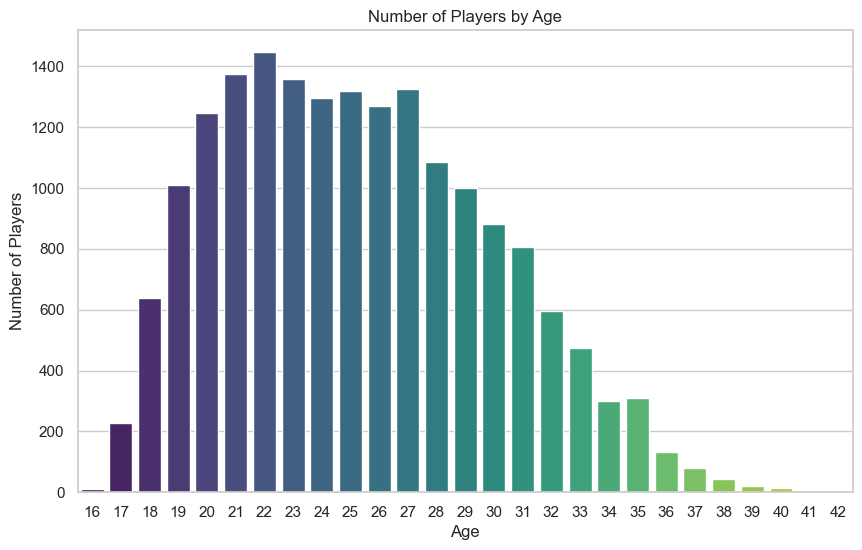

In [14]:
# Graphical distribution of age wrt counts
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='count', data=age_distribution, palette='viridis')

# Adding titles and labels
plt.title('Number of Players by Age')
plt.xlabel('Age')
plt.ylabel('Number of Players')

# Show the plot
plt.show()

In [15]:
# Find the minimum and maximum ages
min_age = df['age'].min()
max_age = df['age'].max()
print("Players who are youngest::",min_age)
print("Players who are oldest::",max_age)

Players who are youngest:: 16
Players who are oldest:: 42


In [ ]:
## Analysis : From the above graph, the youngest player in fifa 20 is 16, whereas the oldest player is 42

In [16]:
# Fetching out oldest and youngest players
oldest_player = df[df['age']== max_age]
youngest_player = df[df['age']== min_age]
print("OLDEST PLAYER LIST:::::")
display(oldest_player)

print("\nYOUNGEST PLAYER LIST::::")
display(youngest_player)

OLDEST PLAYER LIST:::::


short_name  age  height_cm  weight_kg   nationality  \
11832      C. Muñoz   42        177         73     Argentina   
13003  H. Sulaimani   42        173         70  Saudi Arabia   

                               club  overall  potential  value_eur  wage_eur  \
11832  CD Universidad de Concepción       64         64      50000      1000   
13003                       Al Ahli       63         63          0      5000   

       ...   lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
11832  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
13003  ...  62+2  66+2  66+2  66+2  62+2  62+2  66+2  66+2  66+2  62+2  

[2 rows x 98 columns]


YOUNGEST PLAYER LIST::::


short_name  age  height_cm  weight_kg       nationality  \
4764       A. Hložek   16        185         80    Czech Republic   
6630     Fábio Silva   16        185         75          Portugal   
12158      E. Millot   16        175         65            France   
12160    S. Esposito   16        186         75             Italy   
14626     A. Velasco   16        167         63         Argentina   
17614    D. Obbekjær   16        193         86           Denmark   
17782    S. Anderson   16        175         64     United States   
17827       D. Burns   16        176         62  Northern Ireland   
18031  O. Stefánsson   16        190         75           Iceland   
18171    J. Starbuck   16        174         69           England   
18242     R. Wikberg   16        186         72            Sweden   
18243   E. Sartorius   16        174         69           England   

                         club  overall  potential  value_eur  wage_eur  ...  \
4764             Sparta Praha       70         86    3500000      1000  ...   
6630                 FC Porto       68         85    1800000      1000  ...   
12158               AS Monaco       63         86     800000      1000  ...   
12160                   Inter       63         85     825000      2000  ...   
14626           Independiente       60         83     450000      1000  ...   
17614         Odense Boldklub       53         71     110000      1000  ...   
17782         Colorado Rapids       52         75     100000      1000  ...   
17827  St. Patrick's Athletic       52         69     100000      1000  ...   
18031          IFK Norrköping       51         64      60000      1000  ...   
18171            Grimsby Town       49         72      60000      1000  ...   
18242           Östersunds FK       48         67      50000      1000  ...   
18243            Lincoln City       48         67      60000      1000  ...   

        lwb   ldm   cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
4764   52+2  50+2  50+2  50+2  52+2  49+2  46+2  46+2  46+2  49+2  
6630   43+2  40+2  40+2  40+2  43+2  41+2  38+2  38+2  38+2  41+2  
12158  58+2  56+2  56+2  56+2  58+2  56+2  51+2  51+2  51+2  56+2  
12160  41+2  40+2  40+2  40+2  41+2  39+2  37+2  37+2  37+2  39+2  
14626  55+2  54+2  54+2  54+2  55+2  55+2  50+2  50+2  50+2  55+2  
17614  44+2  48+2  48+2  48+2  44+2  46+2  51+2  51+2  51+2  46+2  
17782  50+2  48+2  48+2  48+2  50+2  50+2  48+2  48+2  48+2  50+2  
17827  43+2  39+2  39+2  39+2  43+2  42+2  36+2  36+2  36+2  42+2  
18031  43+2  45+2  45+2  45+2  43+2  46+2  50+2  50+2  50+2  46+2  
18171  44+2  43+2  43+2  43+2  44+2  43+2  40+2  40+2  40+2  43+2  
18242  39+2  41+2  41+2  41+2  39+2  42+2  47+2  47+2  47+2  42+2  
18243  33+2  30+2  30+2  30+2  33+2  32+2  27+2  27+2  27+2  32+2  

[12 rows x 98 columns]

## Analysis : There are only two players in the list of oldest age group - 42 & 12 players in the list of youngest age group

## Preprocessing - Seperating the players based on Key features

In [17]:
df['cm'].unique()

array(['87+2', '81+3', '82+3', nan, '83+3', '87+3', '74+3', '78+3',
       '65+3', '79+3', '62+3', '77+3', '79+5', '80+3', '84+3', '85+3',
       '76+3', '75+3', '67+3', '74+2', '82+2', '66+2', '72+3', '83+2',
       '70+3', '71+3', '69+3', '62+2', '81+2', '78+2', '58+2', '72+2',
       '84+2', '55+3', '74+4', '75+2', '80+2', '73+2', '68+3', '64+3',
       '60+3', '73+3', '79+2', '77+2', '65+2', '69+2', '64+2', '70+2',
       '71+2', '63+2', '76+2', '66+3', '60+2', '67+2', '61+3', '61+2',
       '57+2', '59+2', '68+2', '53+3', '63+3', '57+3', '54+2', '56+2',
       '53+2', '52+2', '55+2', '51+2', '58+3', '50+2', '47+2', '49+2',
       '48+2', '45+2', '43+2', '44+2', '46+2', '41+2', '42+2', '40+2',
       '39+2', '37+2', '38+2', '35+2', '36+2', '34+2', '33+2', '31+2',
       '32+2'], dtype=object)

In [18]:
position_cols = ['lw', 'rw', 'ls', 'st', 'rs', 'lf', 'cf', 'rf', 'lam', 'cam', 'ram', 'lcm', 'cm', 'rcm', 'lm', 'rm', 'ldm', 'cdm', 'rdm', 'lwb', 'rwb', 'lb', 'rb', 'lcb', 'cb', 'rcb']

def convert_position_rating(rating):
    if pd.isna(rating):
        return None
    else:
        parts = rating.split('+')
        return int(parts[0]) + int(parts[1])
    
for col in position_cols:
    df[col] = df[col].apply(convert_position_rating)

# Combine positions into broader categories
df['right_wing'] = df[[ 'rw']].mean(axis=1)
df['left_wing'] = df[['lw']].mean(axis=1)
df['striker'] = df[['ls','rs','st']].mean(axis=1)
df['forward'] = df[['lf', 'cf', 'rf']].mean(axis=1)
df['attacking_midfield'] = df[['lam', 'cam', 'ram']].mean(axis=1)
df['midfield'] = df[['lcm', 'cm', 'rcm']].mean(axis=1)
df['wide_midfield'] = df[['lm', 'rm']].mean(axis=1)
df['defensive_midfield'] = df[['ldm', 'cdm', 'rdm']].mean(axis=1)
df['full_back'] = df[['lwb', 'rwb', 'lb', 'rb']].mean(axis=1)
df['defense'] = df[['lcb', 'cb', 'rcb']].mean(axis=1)

df.drop(columns=position_cols, inplace=True)


## Analysis: Seperating the players features into categories like forward, right winger, midfielder, defence etc.. Finally, 98 features are converted into 82 features.

In [19]:
df

short_name  age  height_cm  weight_kg nationality  \
0               L. Messi   32        170         72   Argentina   
1      Cristiano Ronaldo   34        187         83    Portugal   
2              Neymar Jr   27        175         68      Brazil   
3               J. Oblak   26        188         87    Slovenia   
4              E. Hazard   28        175         74     Belgium   
...                  ...  ...        ...        ...         ...   
18273         Shao Shuai   22        186         79    China PR   
18274       Xiao Mingjie   22        177         66    China PR   
18275          Zhang Wei   19        186         75    China PR   
18276       Wang Haijian   18        185         74    China PR   
18277         Pan Ximing   26        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
0                       FC Barcelona       94         94   95500000    565000   
1                           Juventus       93         93   58500000    405000   
2                Paris Saint-Germain       92         92  105500000    290000   
3                    Atlético Madrid       91         93   77500000    125000   
4                        Real Madrid       91         91   90000000    470000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

       ... right_wing left_wing  striker  forward  attacking_midfield  \
0      ...       95.0      95.0     91.0     95.0                95.0   
1      ...       92.0      92.0     94.0     93.0                91.0   
2      ...       93.0      93.0     87.0     92.0                93.0   
3      ...        NaN       NaN      NaN      NaN                 NaN   
4      ...       92.0      92.0     86.0     91.0                92.0   
...    ...        ...       ...      ...      ...                 ...   
18273  ...       33.0      33.0     34.0     33.0                33.0   
18274  ...       35.0      35.0     35.0     34.0                35.0   
18275  ...       45.0      45.0     45.0     45.0                46.0   
18276  ...       47.0      47.0     45.0     46.0                48.0   
18277  ...       46.0      46.0     44.0     45.0                48.0   

      midfield wide_midfield defensive_midfield  full_back defense  
0         89.0          94.0               68.0       67.5    54.0  
1         84.0          91.0               64.0       66.0    56.0  
2         85.0          92.0               64.0       66.5    49.0  
3          NaN           NaN                NaN        NaN     NaN  
4         86.0          92.0               66.0       66.5    52.0  
...        ...           ...                ...        ...     ...  
18273     35.0          35.0               44.0       46.0    48.0  
18274     38.0          37.0               45.0       47.0    49.0  
18275     48.0          47.0               51.0       49.0    51.0  
18276     48.0          48.0               50.0       50.0    51.0  
18277     48.0          48.0               51.0       50.0    52.0  

[18278 rows x 82 columns]

In [20]:
df.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'joined', 'contract_valid_until',
       'nation_position', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_sh

In [21]:
gk = df[df['player_positions']=='GK']
gk

short_name  age  height_cm  weight_kg          nationality  \
3                J. Oblak   26        188         87             Slovenia   
6           M. ter Stegen   27        187         85              Germany   
13                Alisson   26        191         91               Brazil   
14                 De Gea   28        192         82                Spain   
25                Ederson   25        188         86               Brazil   
...                   ...  ...        ...        ...                  ...   
18231         P. Królczyk   25        188         81               Poland   
18239          V. Storsve   17        185         65               Norway   
18251  G. Sykes-Kenworthy   19        182         78              England   
18259          H. Sveijer   17        185         71               Sweden   
18272           P. Martin   20        188         84  Republic of Ireland   

                    club  overall  potential  value_eur  wage_eur  ...  \
3        Atlético Madrid       91         93   77500000    125000  ...   
6           FC Barcelona       90         93   67500000    250000  ...   
13             Liverpool       89         91   58000000    155000  ...   
14     Manchester United       89         90   56000000    205000  ...   
25       Manchester City       88         91   54500000    185000  ...   
...                  ...      ...        ...        ...       ...  ...   
18231      Piast Gliwice       49         54      30000      1000  ...   
18239      Lillestrøm SK       48         70      50000      1000  ...   
18251      Bradford City       48         65      50000      1000  ...   
18259          IK Sirius       48         63      50000      1000  ...   
18272       Waterford FC       48         58      40000      1000  ...   

      right_wing left_wing  striker  forward  attacking_midfield midfield  \
3            NaN       NaN      NaN      NaN                 NaN      NaN   
6            NaN       NaN      NaN      NaN                 NaN      NaN   
13           NaN       NaN      NaN      NaN                 NaN      NaN   
14           NaN       NaN      NaN      NaN                 NaN      NaN   
25           NaN       NaN      NaN      NaN                 NaN      NaN   
...          ...       ...      ...      ...                 ...      ...   
18231        NaN       NaN      NaN      NaN                 NaN      NaN   
18239        NaN       NaN      NaN      NaN                 NaN      NaN   
18251        NaN       NaN      NaN      NaN                 NaN      NaN   
18259        NaN       NaN      NaN      NaN                 NaN      NaN   
18272        NaN       NaN      NaN      NaN                 NaN      NaN   

      wide_midfield defensive_midfield  full_back defense  
3               NaN                NaN        NaN     NaN  
6               NaN                NaN        NaN     NaN  
13              NaN                NaN        NaN     NaN  
14              NaN                NaN        NaN     NaN  
25              NaN                NaN        NaN     NaN  
...             ...                ...        ...     ...  
18231           NaN                NaN        NaN     NaN  
18239           NaN                NaN        NaN     NaN  
18251           NaN                NaN        NaN     NaN  
18259           NaN                NaN        NaN     NaN  
18272           NaN                NaN        NaN     NaN  

[2036 rows x 82 columns]

## Analysis: Fetching out Goal keepers(GK) from the dataset where 2036 players are from GK categories, meanwhile GK doesnot have corresponding rating like forward, left_wing, midfield from other players

In [22]:
relevant_features_gk = [
    # Basic Player Information
    'age', 'height_cm', 'weight_kg', 'short_name', 'club', 'nationality','player_positions',
    
    # performance
    'overall','potential','value_eur','wage_eur',
    
    #skill rating
    'goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes'
]

df3 = gk[relevant_features_gk]
df3

age  height_cm  weight_kg          short_name               club  \
3       26        188         87            J. Oblak    Atlético Madrid   
6       27        187         85       M. ter Stegen       FC Barcelona   
13      26        191         91             Alisson          Liverpool   
14      28        192         82              De Gea  Manchester United   
25      25        188         86             Ederson    Manchester City   
...    ...        ...        ...                 ...                ...   
18231   25        188         81         P. Królczyk      Piast Gliwice   
18239   17        185         65          V. Storsve      Lillestrøm SK   
18251   19        182         78  G. Sykes-Kenworthy      Bradford City   
18259   17        185         71          H. Sveijer          IK Sirius   
18272   20        188         84           P. Martin       Waterford FC   

               nationality player_positions  overall  potential  value_eur  \
3                 Slovenia               GK       91         93   77500000   
6                  Germany               GK       90         93   67500000   
13                  Brazil               GK       89         91   58000000   
14                   Spain               GK       89         90   56000000   
25                  Brazil               GK       88         91   54500000   
...                    ...              ...      ...        ...        ...   
18231               Poland               GK       49         54      30000   
18239               Norway               GK       48         70      50000   
18251              England               GK       48         65      50000   
18259               Sweden               GK       48         63      50000   
18272  Republic of Ireland               GK       48         58      40000   

       wage_eur  goalkeeping_diving  goalkeeping_handling  \
3        125000                  87                    92   
6        250000                  88                    85   
13       155000                  85                    84   
14       205000                  90                    84   
25       185000                  86                    82   
...         ...                 ...                   ...   
18231      1000                  53                    47   
18239      1000                  50                    50   
18251      1000                  44                    46   
18259      1000                  50                    49   
18272      1000                  54                    51   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  
3                       78                       90                    89  
6                       88                       88                    90  
13                      85                       90                    89  
14                      81                       85                    92  
25                      93                       86                    88  
...                    ...                      ...                   ...  
18231                   55                       48                    53  
18239                   48                       49                    51  
18251                   45                       48                    51  
18259                   48                       47                    51  
18272                   46                       43                    45  

[2036 rows x 16 columns]

In [23]:
df3.to_csv("update_fifa20_gk.csv")

## Analysis : Goal keepers have special features apart from other players like goalkeeping_diving ,goalkeeping_handling, goalkeeping_kicking etc.. The above code will  fetch out and save it as .csv file for futher analysis

In [24]:
relevant_features = [
    # Basic Player Information
    'age', 'height_cm', 'weight_kg', 'short_name', 'club', 'nationality','player_positions',
    
    # performance
    'overall','potential','value_eur','wage_eur',
    
    # Skill Ratings
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
    'work_rate','goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes',

    # Combined Position Ratings
    'striker','right_wing','left_wing','forward', 'attacking_midfield', 'midfield', 'wide_midfield', 'defensive_midfield', 'full_back', 'defense'
]

df1 = df[relevant_features]
df1

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       26        188         87           J. Oblak   
4       28        175         74          E. Hazard   
...    ...        ...        ...                ...   
18273   22        186         79         Shao Shuai   
18274   22        177         66       Xiao Mingjie   
18275   19        186         75          Zhang Wei   
18276   18        185         74       Wang Haijian   
18277   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                    Atlético Madrid    Slovenia               GK       91   
4                        Real Madrid     Belgium           LW, CF       91   
...                              ...         ...              ...      ...   
18273               Beijing Renhe FC    China PR               CB       48   
18274               Shanghai SIPG FC    China PR               CB       48   
18275         Hebei China Fortune FC    China PR               CM       48   
18276  Shanghai Greenland Shenhua FC    China PR               CM       48   
18277         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  striker  right_wing  left_wing  forward  \
0             94   95500000  ...     91.0        95.0       95.0     95.0   
1             93   58500000  ...     94.0        92.0       92.0     93.0   
2             92  105500000  ...     87.0        93.0       93.0     92.0   
3             93   77500000  ...      NaN         NaN        NaN      NaN   
4             91   90000000  ...     86.0        92.0       92.0     91.0   
...          ...        ...  ...      ...         ...        ...      ...   
18273         56      40000  ...     34.0        33.0       33.0     33.0   
18274         56      40000  ...     35.0        35.0       35.0     34.0   
18275         56      40000  ...     45.0        45.0       45.0     45.0   
18276         54      40000  ...     45.0        47.0       47.0     46.0   
18277         51      40000  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                     NaN       NaN            NaN                 NaN   
4                    92.0      86.0           92.0                66.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3            NaN      NaN  
4           66.5     52.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[18278 rows x 62 columns]

In [25]:
df1.columns

Index(['age', 'height_cm', 'weight_kg', 'short_name', 'club', 'nationality',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'work_rate', 'goalkeeping_diving',
       'goalkee

In [26]:
df1.to_csv("update_fifa20_all_players.csv")

## Analysis : Likely, Players have unique features, the above code will fetch out some of the most important features of all the players and dropping out unwanted features which are not prenominant, and the features will be saved in .csv format for further analysis.

In [27]:
relevant_features = [
    # Basic Player Information
    'age', 'height_cm', 'weight_kg', 'short_name', 'club', 'nationality','player_positions',
    
    # performance
    'overall','potential','value_eur','wage_eur',
    
    # Skill Ratings
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
    'attacking_short_passing', 'attacking_volleys', 
    'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
    'mentality_penalties', 'mentality_composure', 
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
    'work_rate',

    # Combined Position Ratings
    'striker','right_wing','left_wing','forward', 'attacking_midfield', 'midfield', 'wide_midfield', 'defensive_midfield', 'full_back', 'defense'
]

df2 = df[relevant_features]
df2

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       26        188         87           J. Oblak   
4       28        175         74          E. Hazard   
...    ...        ...        ...                ...   
18273   22        186         79         Shao Shuai   
18274   22        177         66       Xiao Mingjie   
18275   19        186         75          Zhang Wei   
18276   18        185         74       Wang Haijian   
18277   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                    Atlético Madrid    Slovenia               GK       91   
4                        Real Madrid     Belgium           LW, CF       91   
...                              ...         ...              ...      ...   
18273               Beijing Renhe FC    China PR               CB       48   
18274               Shanghai SIPG FC    China PR               CB       48   
18275         Hebei China Fortune FC    China PR               CM       48   
18276  Shanghai Greenland Shenhua FC    China PR               CM       48   
18277         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  striker  right_wing  left_wing  forward  \
0             94   95500000  ...     91.0        95.0       95.0     95.0   
1             93   58500000  ...     94.0        92.0       92.0     93.0   
2             92  105500000  ...     87.0        93.0       93.0     92.0   
3             93   77500000  ...      NaN         NaN        NaN      NaN   
4             91   90000000  ...     86.0        92.0       92.0     91.0   
...          ...        ...  ...      ...         ...        ...      ...   
18273         56      40000  ...     34.0        33.0       33.0     33.0   
18274         56      40000  ...     35.0        35.0       35.0     34.0   
18275         56      40000  ...     45.0        45.0       45.0     45.0   
18276         54      40000  ...     45.0        47.0       47.0     46.0   
18277         51      40000  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                     NaN       NaN            NaN                 NaN   
4                    92.0      86.0           92.0                66.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3            NaN      NaN  
4           66.5     52.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[18278 rows x 57 columns]

In [28]:
df2.to_csv("update_fifa20_only_players.csv")

## Analysis: The above code fetching out only the relavent features of offensive player, defensive player which includes their basis information, skill rating, performance rating and position rating. This will be helpful for building the model to predict the overall rating, value of the players, wages etc..,

In [29]:
df2.nationality.nunique()

162

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   short_name                  18278 non-null  object 
 4   club                        18278 non-null  object 
 5   nationality                 18278 non-null  object 
 6   player_positions            18278 non-null  object 
 7   overall                     18278 non-null  int64  
 8   potential                   18278 non-null  int64  
 9   value_eur                   18278 non-null  int64  
 10  wage_eur                    18278 non-null  int64  
 11  pace                        16242 non-null  float64
 12  shooting                    16242 non-null  float64
 13  passing                     162

In [31]:
# checking out null values
df2.isnull().sum()

age                              0
height_cm                        0
weight_kg                        0
short_name                       0
club                             0
nationality                      0
player_positions                 0
overall                          0
potential                        0
value_eur                        0
wage_eur                         0
pace                          2036
shooting                      2036
passing                       2036
dribbling                     2036
defending                     2036
physic                        2036
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_spee

In [32]:
# Fetch rows with any null values
null_rows = df2[df2.isnull().any(axis=1)]

null_rows

age  height_cm  weight_kg          short_name               club  \
3       26        188         87            J. Oblak    Atlético Madrid   
6       27        187         85       M. ter Stegen       FC Barcelona   
13      26        191         91             Alisson          Liverpool   
14      28        192         82              De Gea  Manchester United   
25      25        188         86             Ederson    Manchester City   
...    ...        ...        ...                 ...                ...   
18231   25        188         81         P. Królczyk      Piast Gliwice   
18239   17        185         65          V. Storsve      Lillestrøm SK   
18251   19        182         78  G. Sykes-Kenworthy      Bradford City   
18259   17        185         71          H. Sveijer          IK Sirius   
18272   20        188         84           P. Martin       Waterford FC   

               nationality player_positions  overall  potential  value_eur  \
3                 Slovenia               GK       91         93   77500000   
6                  Germany               GK       90         93   67500000   
13                  Brazil               GK       89         91   58000000   
14                   Spain               GK       89         90   56000000   
25                  Brazil               GK       88         91   54500000   
...                    ...              ...      ...        ...        ...   
18231               Poland               GK       49         54      30000   
18239               Norway               GK       48         70      50000   
18251              England               GK       48         65      50000   
18259               Sweden               GK       48         63      50000   
18272  Republic of Ireland               GK       48         58      40000   

       ...  striker  right_wing  left_wing  forward  attacking_midfield  \
3      ...      NaN         NaN        NaN      NaN                 NaN   
6      ...      NaN         NaN        NaN      NaN                 NaN   
13     ...      NaN         NaN        NaN      NaN                 NaN   
14     ...      NaN         NaN        NaN      NaN                 NaN   
25     ...      NaN         NaN        NaN      NaN                 NaN   
...    ...      ...         ...        ...      ...                 ...   
18231  ...      NaN         NaN        NaN      NaN                 NaN   
18239  ...      NaN         NaN        NaN      NaN                 NaN   
18251  ...      NaN         NaN        NaN      NaN                 NaN   
18259  ...      NaN         NaN        NaN      NaN                 NaN   
18272  ...      NaN         NaN        NaN      NaN                 NaN   

       midfield  wide_midfield  defensive_midfield  full_back  defense  
3           NaN            NaN                 NaN        NaN      NaN  
6           NaN            NaN                 NaN        NaN      NaN  
13          NaN            NaN                 NaN        NaN      NaN  
14          NaN            NaN                 NaN        NaN      NaN  
25          NaN            NaN                 NaN        NaN      NaN  
...         ...            ...                 ...        ...      ...  
18231       NaN            NaN                 NaN        NaN      NaN  
18239       NaN            NaN                 NaN        NaN      NaN  
18251       NaN            NaN                 NaN        NaN      NaN  
18259       NaN            NaN                 NaN        NaN      NaN  
18272       NaN            NaN                 NaN        NaN      NaN  

[2036 rows x 57 columns]

In [33]:
null_rows.to_csv("gk.csv")

## Analysis: All the rows which have NULL values are corresponding to Goal Keeepers(GK)

In [34]:
# dropping out null values
df2=df2.dropna()
df2

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
4       28        175         74          E. Hazard   
5       28        181         70       K. De Bruyne   
...    ...        ...        ...                ...   
18273   22        186         79         Shao Shuai   
18274   22        177         66       Xiao Mingjie   
18275   19        186         75          Zhang Wei   
18276   18        185         74       Wang Haijian   
18277   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
4                        Real Madrid     Belgium           LW, CF       91   
5                    Manchester City     Belgium          CAM, CM       91   
...                              ...         ...              ...      ...   
18273               Beijing Renhe FC    China PR               CB       48   
18274               Shanghai SIPG FC    China PR               CB       48   
18275         Hebei China Fortune FC    China PR               CM       48   
18276  Shanghai Greenland Shenhua FC    China PR               CM       48   
18277         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  striker  right_wing  left_wing  forward  \
0             94   95500000  ...     91.0        95.0       95.0     95.0   
1             93   58500000  ...     94.0        92.0       92.0     93.0   
2             92  105500000  ...     87.0        93.0       93.0     92.0   
4             91   90000000  ...     86.0        92.0       92.0     91.0   
5             91   90000000  ...     85.0        90.0       90.0     90.0   
...          ...        ...  ...      ...         ...        ...      ...   
18273         56      40000  ...     34.0        33.0       33.0     33.0   
18274         56      40000  ...     35.0        35.0       35.0     34.0   
18275         56      40000  ...     45.0        45.0       45.0     45.0   
18276         54      40000  ...     45.0        47.0       47.0     46.0   
18277         51      40000  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
4                    92.0      86.0           92.0                66.0   
5                    91.0      90.0           91.0                80.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
4           66.5     52.0  
5           78.0     69.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[16242 rows x 57 columns]

In [35]:
# reset the index after dropping out the null values
df2.reset_index(inplace=True,drop=True)
df2

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       28        175         74          E. Hazard   
4       28        181         70       K. De Bruyne   
...    ...        ...        ...                ...   
16237   22        186         79         Shao Shuai   
16238   22        177         66       Xiao Mingjie   
16239   19        186         75          Zhang Wei   
16240   18        185         74       Wang Haijian   
16241   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                        Real Madrid     Belgium           LW, CF       91   
4                    Manchester City     Belgium          CAM, CM       91   
...                              ...         ...              ...      ...   
16237               Beijing Renhe FC    China PR               CB       48   
16238               Shanghai SIPG FC    China PR               CB       48   
16239         Hebei China Fortune FC    China PR               CM       48   
16240  Shanghai Greenland Shenhua FC    China PR               CM       48   
16241         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  striker  right_wing  left_wing  forward  \
0             94   95500000  ...     91.0        95.0       95.0     95.0   
1             93   58500000  ...     94.0        92.0       92.0     93.0   
2             92  105500000  ...     87.0        93.0       93.0     92.0   
3             91   90000000  ...     86.0        92.0       92.0     91.0   
4             91   90000000  ...     85.0        90.0       90.0     90.0   
...          ...        ...  ...      ...         ...        ...      ...   
16237         56      40000  ...     34.0        33.0       33.0     33.0   
16238         56      40000  ...     35.0        35.0       35.0     34.0   
16239         56      40000  ...     45.0        45.0       45.0     45.0   
16240         54      40000  ...     45.0        47.0       47.0     46.0   
16241         51      40000  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                    92.0      86.0           92.0                66.0   
4                    91.0      90.0           91.0                80.0   
...                   ...       ...            ...                 ...   
16237                33.0      35.0           35.0                44.0   
16238                35.0      38.0           37.0                45.0   
16239                46.0      48.0           47.0                51.0   
16240                48.0      48.0           48.0                50.0   
16241                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3           66.5     52.0  
4           78.0     69.0  
...          ...      ...  
16237       46.0     48.0  
16238       47.0     49.0  
16239       49.0     51.0  
16240       50.0     51.0  
16241       50.0     52.0  

[16242 rows x 57 columns]

In [36]:
# statistical distribution 
df2.describe()

age     height_cm     weight_kg       overall     potential  \
count  16242.000000  16242.000000  16242.000000  16242.000000  16242.000000   
mean      25.160017    180.475249     74.438493     66.426548     71.729528   
std        4.544366      6.454725      6.692058      6.842286      6.081446   
min       16.000000    156.000000     50.000000     48.000000     49.000000   
25%       21.000000    176.000000     70.000000     62.000000     67.000000   
50%       25.000000    180.000000     74.000000     66.000000     71.000000   
75%       28.000000    185.000000     79.000000     71.000000     76.000000   
max       42.000000    203.000000    110.000000     94.000000     95.000000   

          value_eur       wage_eur          pace      shooting       passing  \
count  1.624200e+04   16242.000000  16242.000000  16242.000000  16242.000000   
mean   2.578808e+06    9806.550917     67.700899     52.298301     57.233777   
std    5.650534e+06   21828.924637     11.297656     14.029418     10.407844   
min    0.000000e+00       0.000000     24.000000     15.000000     24.000000   
25%    3.500000e+05    1000.000000     61.000000     42.000000     50.000000   
50%    7.500000e+05    3000.000000     69.000000     54.000000     58.000000   
75%    2.300000e+06    9000.000000     75.000000     63.000000     64.000000   
max    1.055000e+08  565000.000000     96.000000     93.000000     92.000000   

       ...       striker    right_wing     left_wing       forward  \
count  ...  16242.000000  16242.000000  16242.000000  16242.000000   
mean   ...     59.859869     61.105036     61.105036     60.795469   
std    ...      9.199093      9.882466      9.882466      9.861945   
min    ...     32.000000     27.000000     27.000000     28.000000   
25%    ...     54.000000     55.000000     55.000000     55.000000   
50%    ...     60.000000     62.000000     62.000000     62.000000   
75%    ...     66.000000     68.000000     68.000000     68.000000   
max    ...     94.000000     95.000000     95.000000     95.000000   

       attacking_midfield      midfield  wide_midfield  defensive_midfield  \
count        16242.000000  16242.000000   16242.000000        16242.000000   
mean            61.069388     60.261852      61.784694           58.752555   
std              9.765853      8.833362       9.253605           10.180389   
min             29.000000     33.000000      29.000000           30.000000   
25%             55.000000     54.000000      56.000000           51.000000   
50%             62.000000     61.000000      63.000000           60.000000   
75%             68.000000     66.000000      68.000000           66.000000   
max             95.000000     90.000000      94.000000           90.000000   

          full_back       defense  
count  16242.000000  16242.000000  
mean      59.053442     57.494767  
std        9.292749     11.793411  
min       32.000000     28.000000  
25%       52.500000     48.000000  
50%       59.500000     59.000000  
75%       66.000000     67.000000  
max       87.500000     90.000000  

[8 rows x 52 columns]

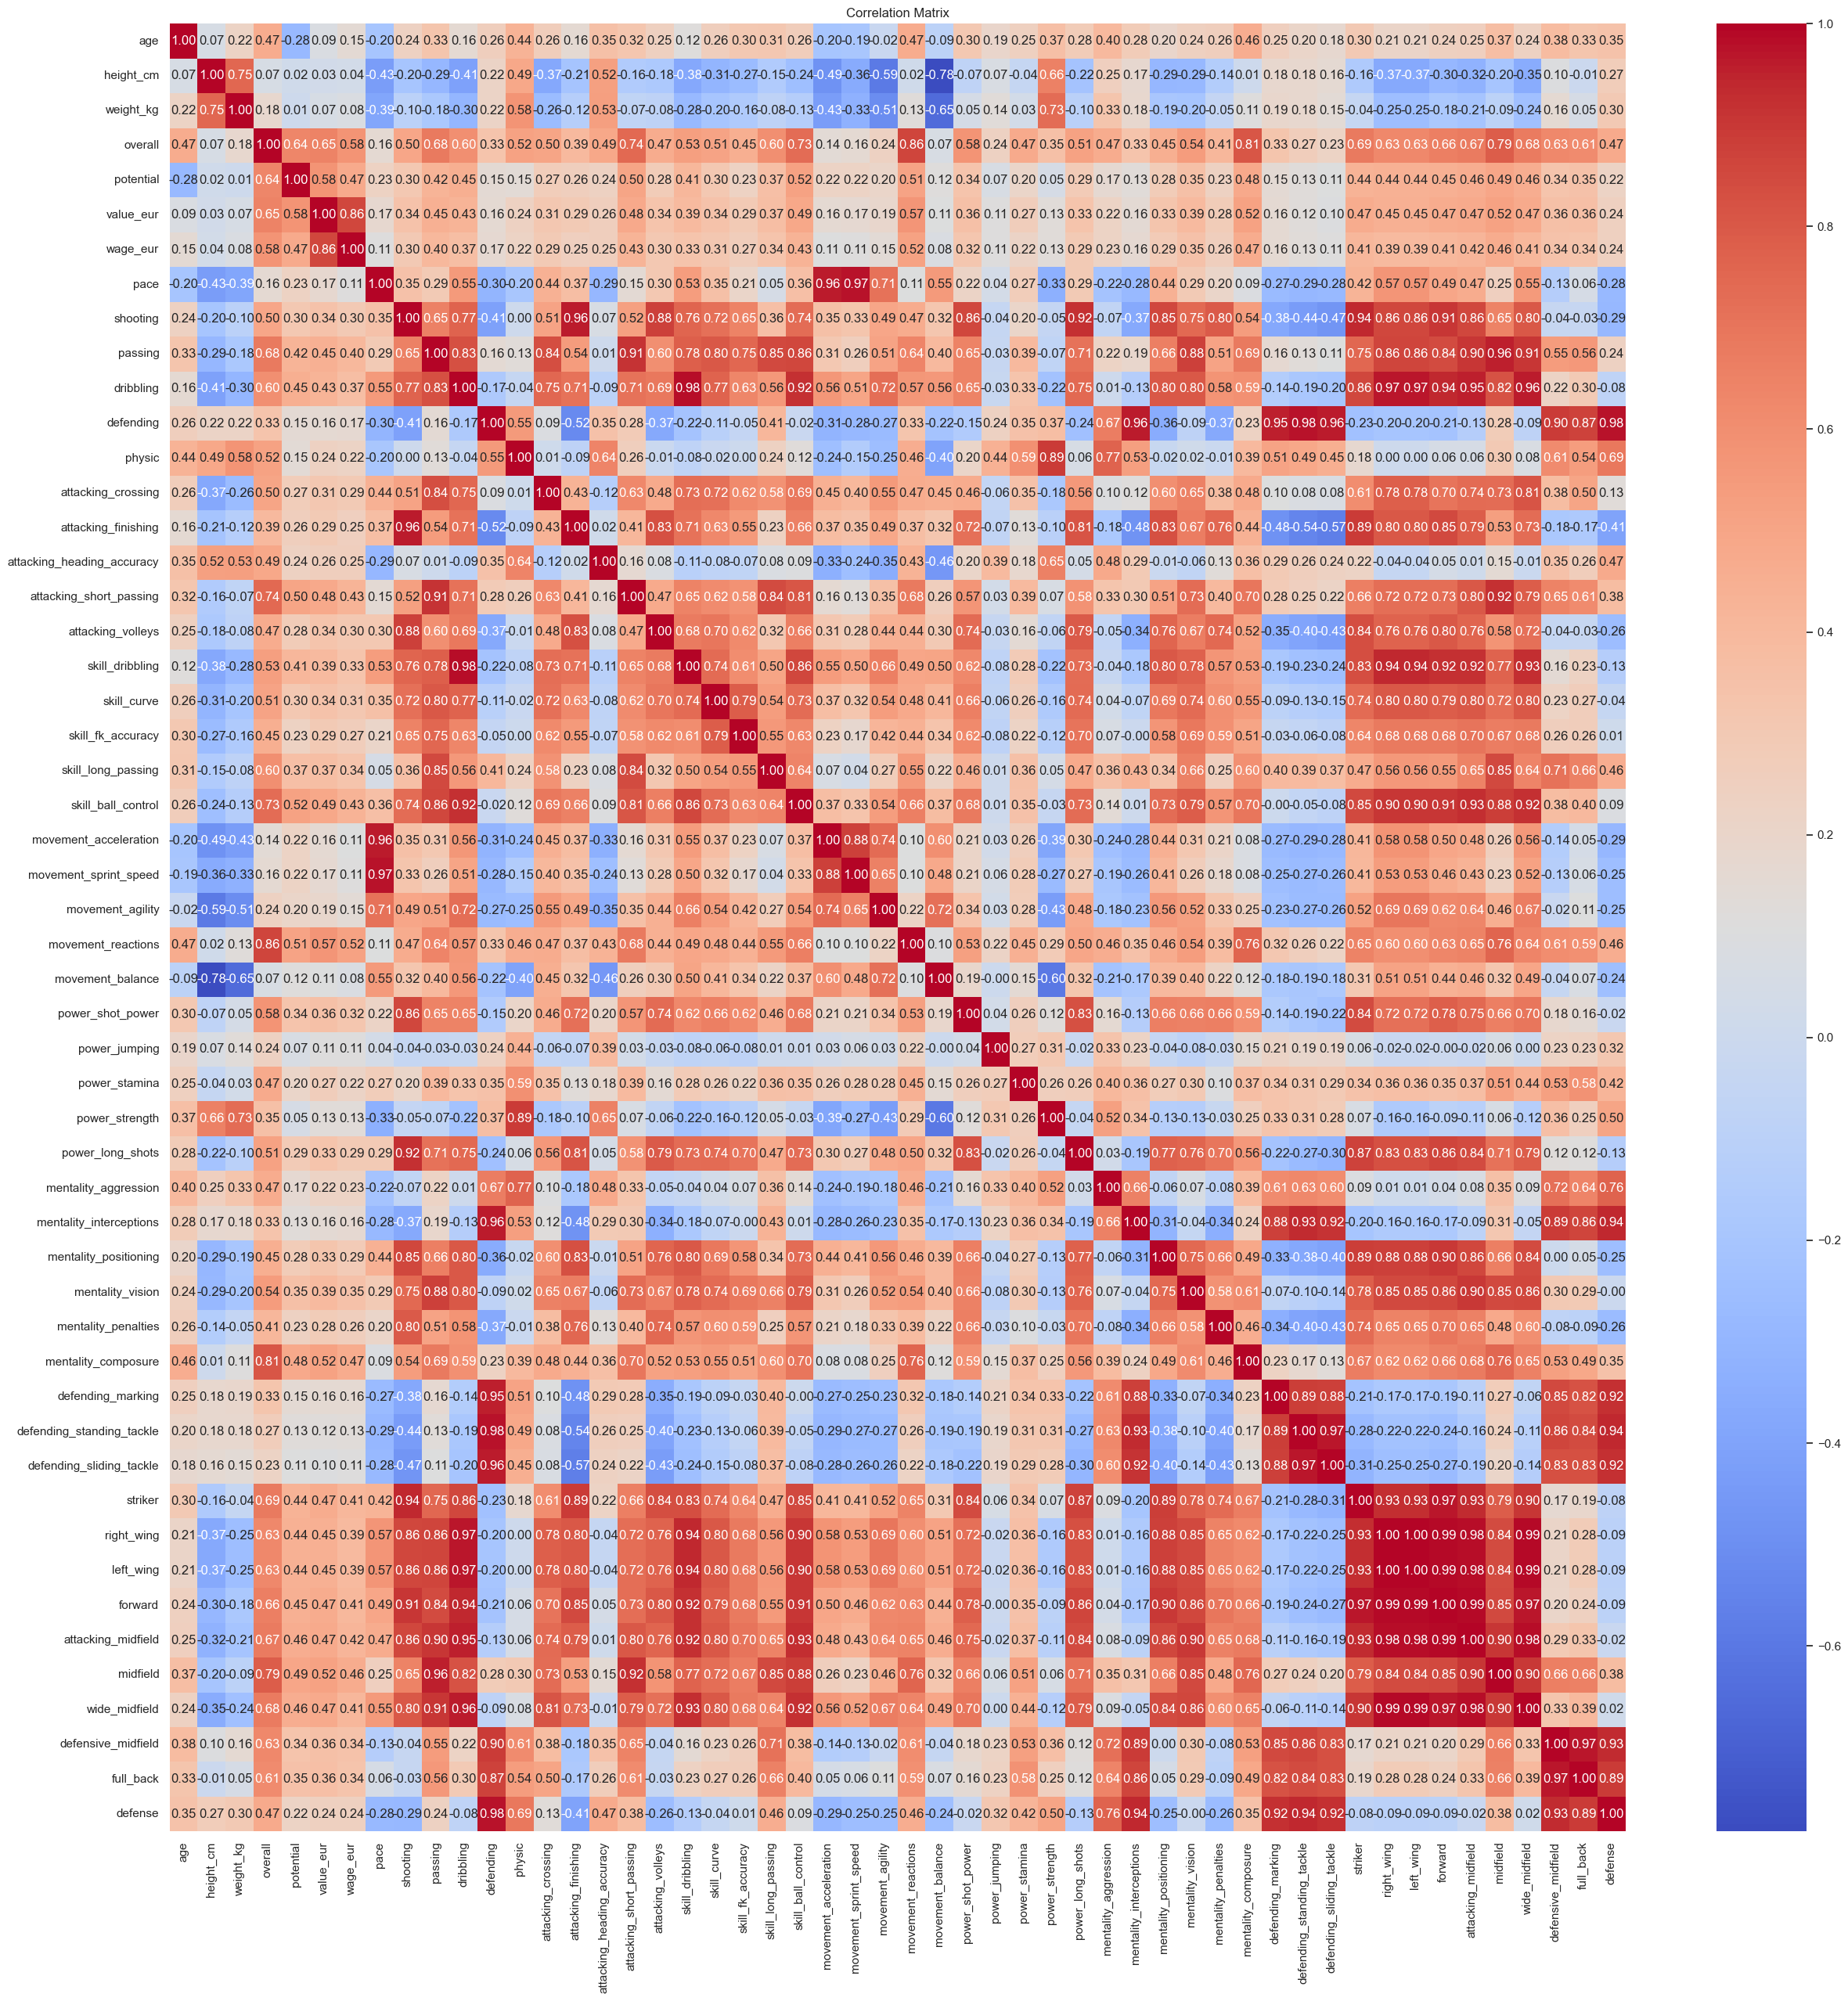

In [37]:
plt.figure(figsize=(30, 30))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Analysis : Checking out the correlation matrix to know how the independent features are relavent to other independent features, the color which are red show that it is closely relavent to one another. Eventhough some of the features are relavant, dropping out the features is not a feasible because all the skills with small variation have highly responsible for predicting overall ratings.

## Fetching out similarity between the players using KNN and K-means

In [38]:
from sklearn.preprocessing import StandardScaler

# fetching out only numerical features for analysis, scaling done using StandardScaler
numerical_features = df2.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
outfield_players_standardized = scaler.fit_transform(df2[numerical_features])

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keeping 95% of the variance
principal_components = pca.fit_transform(outfield_players_standardized)

pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i) for i in range(1, pca.n_components_ + 1)])

original_shape = outfield_players_standardized.shape
transformed_shape = pca_df.shape

(original_shape, transformed_shape)

((16242, 52), (16242, 18))

## Analysis: Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify a dataset while preserving as much variability (or information) as possible. From the above code, 52 features are converted into 18 features without losing their dimensionality information.

In [40]:
pca_df

PC1       PC2       PC3       PC4        PC5        PC6  \
0      21.130182  2.799916  2.573387  6.282099  17.201111  11.066225   
1      17.824490  2.761967  5.579196  7.341067  10.161857   7.233562   
2      18.672700  0.378810  1.318871  5.285172  13.580635   7.282138   
3      18.665707  1.610581  1.886468  6.380882  15.248927   8.653570   
4      17.835012  6.239191  1.845528  4.043779  12.946354   6.704971   
...          ...       ...       ...       ...        ...        ...   
16237 -12.969893 -2.544747 -0.706468 -0.103802  -0.029334   1.631742   
16238 -12.049393 -2.834255 -2.201994 -0.998558   0.109295   2.432847   
16239  -8.176326 -1.825222 -0.283445 -1.888447   0.637802  -0.094498   
16240  -7.567219 -2.088627 -0.683466 -1.692665   0.395948  -0.218127   
16241  -7.629161 -1.576017 -0.726971 -2.036629  -0.595049   0.525000   

             PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0      14.306663  3.270544  5.077723  3.672930 -3.246453 -2.274837 -1.110524   
1       8.828984  1.871526  2.314379  3.050818 -2.395213 -0.861393 -1.114428   
2       9.769800  2.298442  3.431292  1.819264 -0.899563 -0.439702 -1.056134   
3      12.694418  2.794708  5.089769  2.457777 -2.066728 -1.785290 -0.896674   
4      10.282176  3.745517  4.982722  2.103070 -2.399010 -1.391051 -0.706088   
...          ...       ...       ...       ...       ...       ...       ...   
16237   1.431187  1.540591  0.400296  0.286738 -0.118795  0.099535 -0.377731   
16238   0.868804  1.489419  0.295904  0.365508 -0.348064 -0.148647 -1.100413   
16239   0.561031  0.417458  0.460234  0.818259 -1.152671 -0.698177 -0.801352   
16240   0.873397  0.469915 -0.082889  1.178473 -1.127016 -1.098249 -0.081142   
16241   1.732372 -0.285265 -0.174398  1.744717 -0.807860 -1.578325 -0.427554   

           PC14      PC15      PC16      PC17      PC18  
0      1.114310  0.764940  1.144491  0.895240  0.293274  
1      0.873948  0.018936  0.378052  0.916011  0.242086  
2      1.127607  0.061436 -0.376059  0.590229 -0.337760  
3      1.177062  1.551868  0.112401  1.035584  0.107280  
4      1.190050 -0.079720  0.156938 -0.412607  0.038233  
...         ...       ...       ...       ...       ...  
16237 -0.998689  0.243116 -0.765754  0.067629  0.763778  
16238  0.296921 -0.054307 -0.139821 -0.198467  0.288047  
16239  0.134823 -0.357880 -0.475403  0.765124 -0.069530  
16240  0.503326 -0.475064 -0.811966  0.477034 -0.174618  
16241  0.461977  0.537728 -0.446799 -0.002957  0.494554  

[16242 rows x 18 columns]

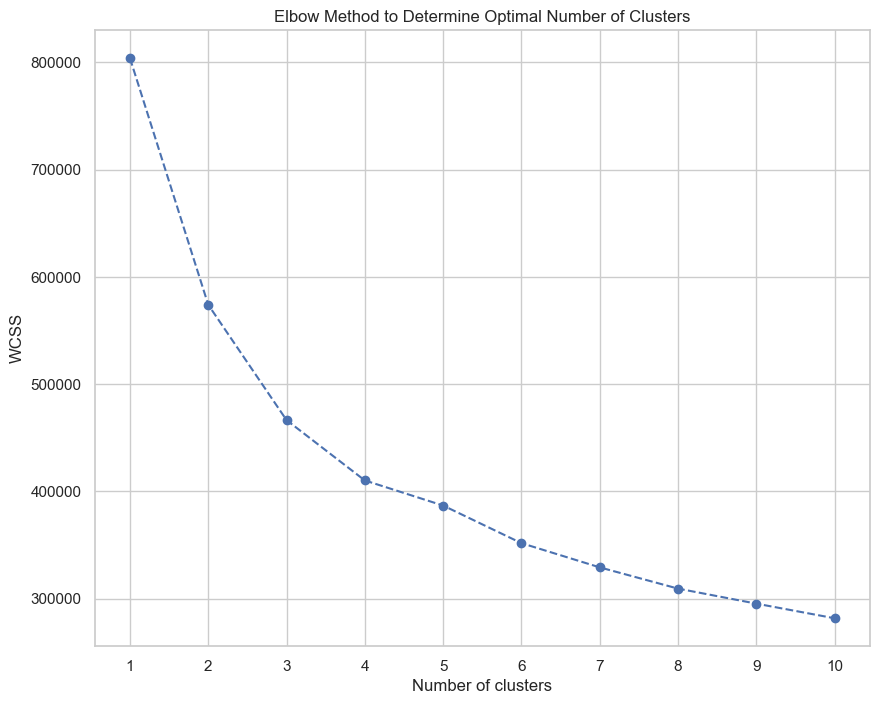

In [41]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):  # Let's test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(range(1, 11))
plt.show()

## Analysis: Using kmeans technique, clustering of PCA component using Elbow technique. At cluster = 4, PCA works well to group up the features.

In [42]:
kmeans_optimal = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_clusters_optimal = kmeans_optimal.fit_predict(pca_df)

# Adding the optimal cluster labels to the PCA DataFrame
pca_df['Optimal_KMeans_Cluster'] = kmeans_clusters_optimal

In [43]:
player_name = 'L. Messi'
player_index = df2[df2['short_name'] == player_name].index[0]
target_player_cluster = pca_df.loc[player_index, 'Optimal_KMeans_Cluster']

similar_player_indices = pca_df[pca_df['Optimal_KMeans_Cluster'] == target_player_cluster].index
similar_players = df2.iloc[similar_player_indices]
similar_players = similar_players[similar_players['short_name'] != player_name]

print(f"Players similar to {player_name} based on KMeans clustering:")
similar_players[['short_name', 'age', 'club']]

Players similar to L. Messi based on KMeans clustering:


short_name  age                   club
1      Cristiano Ronaldo   34               Juventus
2              Neymar Jr   27    Paris Saint-Germain
3              E. Hazard   28            Real Madrid
4           K. De Bruyne   28        Manchester City
5            V. van Dijk   27              Liverpool
...                  ...  ...                    ...
10711           A. Askar   33        Sarpsborg 08 FF
10850          E. Sağlik   27  Sporting de Charleroi
10923          A. Stølås   30           FK Haugesund
10928          S. Zúñiga   29        Unión La Calera
11725    T. Christiansen   29           Mjøndalen IF

[3492 rows x 3 columns]

## Analysis : Similar players of L.Messi based on kmeans algorithm are shown above

In [44]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn_model.fit(pca_df.values)

NearestNeighbors(algorithm='ball_tree', n_neighbors=10)

In [45]:
# Finding players like Messi
player_name = 'L. Messi'
player_index = df2.loc[df2['short_name'] == player_name].index[0]
player_pca = pca_df.iloc[player_index].values.reshape(1, -1)

distances, indices = nn_model.kneighbors(player_pca)
similar_player_indices = indices.flatten()
similar_players = df2.iloc[similar_player_indices]

print(f"Players similar to {player_name} based on NearestNeighbors:")
similar_players[['short_name', 'age', 'club']]


Players similar to L. Messi based on NearestNeighbors:


short_name  age                 club
0            L. Messi   32         FC Barcelona
3           E. Hazard   28          Real Madrid
2           Neymar Jr   27  Paris Saint-Germain
4        K. De Bruyne   28      Manchester City
18       A. Griezmann   28         FC Barcelona
1   Cristiano Ronaldo   34             Juventus
7            M. Salah   27            Liverpool
15          L. Suárez   32         FC Barcelona
13          S. Agüero   31      Manchester City
21        R. Sterling   24      Manchester City

## Analysis : Similar players of L.Messi based on K-Nearest Neighbor algorithm are shown above. E.Hazard from Real Madrid and Neymar Jr from PSG are the most relavent players of L.Messi.

## Task : 2 Clustering football players based on players skills

In [46]:
df.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'nationality', 'club',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'joined', 'contract_valid_until',
       'nation_position', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_sh

In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df is your dataset containing player attributes

# Select relevant attributes for clustering
skills_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
                     'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                     'attacking_short_passing', 'attacking_volleys', 
                     'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                     'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                     'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                     'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                     'mentality_penalties', 'mentality_composure', 
                     'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']


# Drop rows with missing values (if necessary)
df3 = df.dropna(subset = skills_attributes)
df3[skills_attributes]

pace  shooting  passing  dribbling  defending  physic  \
0      87.0      92.0     92.0       96.0       39.0    66.0   
1      90.0      93.0     82.0       89.0       35.0    78.0   
2      91.0      85.0     87.0       95.0       32.0    58.0   
4      91.0      83.0     86.0       94.0       35.0    66.0   
5      76.0      86.0     92.0       86.0       61.0    78.0   
...     ...       ...      ...        ...        ...     ...   
18273  57.0      23.0     28.0       33.0       47.0    51.0   
18274  58.0      24.0     33.0       35.0       48.0    48.0   
18275  54.0      35.0     44.0       45.0       48.0    51.0   
18276  59.0      35.0     47.0       47.0       45.0    52.0   
18277  60.0      32.0     51.0       45.0       47.0    55.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                      88                   95                          70   
1                      84                   94                          89   
2                      87                   87                          62   
4                      81                   84                          61   
5                      93                   82                          55   
...                   ...                  ...                         ...   
18273                  21                   17                          40   
18274                  24                   20                          42   
18275                  32                   33                          49   
18276                  39                   34                          47   
18277                  44                   30                          48   

       attacking_short_passing  ...  power_long_shots  mentality_aggression  \
0                           92  ...                94                    48   
1                           83  ...                93                    63   
2                           87  ...                84                    51   
4                           89  ...                80                    54   
5                           92  ...                90                    76   
...                        ...  ...               ...                   ...   
18273                       35  ...                16                    46   
18274                       43  ...                20                    42   
18275                       53  ...                26                    50   
18276                       54  ...                28                    57   
18277                       58  ...                30                    54   

       mentality_interceptions  mentality_positioning  mentality_vision  \
0                           40                     94                94   
1                           29                     95                82   
2                           36                     87                90   
4                           41                     87                89   
5                           61                     88                94   
...                        ...                    ...               ...   
18273                       48                     28                25   
18274                       49                     23                25   
18275                       45                     38                38   
18276                       49                     31                48   
18277                       47                     29                52   

       mentality_penalties  mentality_composure  defending_marking  \
0                       75                   96                 33   
1                       85                   95                 28   
2                       90                   94                 27   
4                       88                   91                 34   
5                       79                   91                 68   
...                    ...     

## Analysis : Fetching out most relavant features for grouping up the players with their skills

In [48]:
# Standardize the data using standardscaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3[skills_attributes])

# Create a DataFrame with scaled data
df_scaled = pd.DataFrame(scaled_data, columns=skills_attributes)
df_scaled

pace  shooting   passing  dribbling  defending    physic  \
0      1.708292  2.829976  3.340490   3.254216  -0.764571  0.115096   
1      1.973842  2.901257  2.379646   2.573589  -1.008191  1.344622   
2      2.062359  2.331009  2.860068   3.156983  -1.190905 -0.704588   
3      2.062359  2.188448  2.763983   3.059751  -1.008191  0.115096   
4      0.734609  2.402290  3.340490   2.281891   0.575339  1.344622   
...         ...       ...       ...        ...        ...       ...   
16237 -0.947208 -2.088412 -2.808908  -2.871428  -0.277331 -1.421811   
16238 -0.858691 -2.017131 -2.328486  -2.676963  -0.216426 -1.729192   
16239 -1.212758 -1.233040 -1.271559  -1.704639  -0.216426 -1.421811   
16240 -0.770175 -1.233040 -0.983306  -1.510174  -0.399141 -1.319350   
16241 -0.681658 -1.446883 -0.598968  -1.704639  -0.277331 -1.011969   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                2.408119             2.763080                    1.117436   
1                2.123297             2.701881                    2.750032   
2                2.336914             2.273485                    0.430027   
3                1.909680             2.089887                    0.344101   
4                2.764147             1.967488                   -0.171455   
...                   ...                  ...                         ...   
16237           -2.362657            -2.010473                   -1.460347   
16238           -2.149040            -1.826875                   -1.288495   
16239           -1.579395            -1.031283                   -0.687012   
16240           -1.080956            -0.970083                   -0.858864   
16241           -0.724928            -1.214881                   -0.772938   

       attacking_short_passing  ...  power_long_shots  mentality_aggression  \
0                     3.043141  ...          2.715355             -0.801041   
1                     2.107477  ...          2.651990              0.245981   
2                     2.523328  ...          2.081708             -0.591636   
3                     2.731253  ...          1.828250             -0.382232   
4                     3.043141  ...          2.461896              1.153400   
...                        ...  ...               ...                   ...   
16237                -2.882736  ...         -2.227086             -0.940644   
16238                -2.051034  ...         -1.973627             -1.219849   
16239                -1.011406  ...         -1.593440             -0.661438   
16240                -0.907443  ...         -1.466710             -0.172828   
16241                -0.491592  ...         -1.339981             -0.382232   

       mentality_interceptions  mentality_positioning  mentality_vision  \
0                    -0.536778               2.675210          2.998737   
1                    -1.120161               2.743787          2.062643   
2                    -0.748917               2.195170          2.686706   
3                    -0.483743               2.195170          2.608698   
4                     0.576954               2.263747          2.998737   
...                        ...                    ...               ...   
16237                -0.112499              -1.850882         -2.383800   
16238                -0.059464              -2.193768         -2.383800   
16239                -0.271604              -1.165111         -1.369699   
16240                -0.059464              -1.645151         -0.589621   
16241                -0.165534              -1.782305         -0.277590   

       mentality_penalties  mentality_composure  defending_marking  \
0                 1.849489             3.480207          -1.025042   
1                 2.653557             3.382281          -1.311693   
2                 3.055591             3.284356          -1.369024   
3                 2.894777             2.990578          -0.967711   
4                 2.1

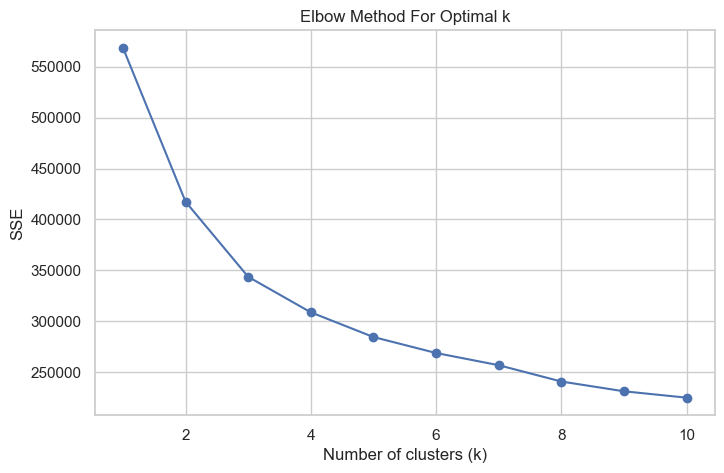

short_name  cluster
0               L. Messi        2
1      Cristiano Ronaldo        2
2              Neymar Jr        2
4              E. Hazard        2
5           K. De Bruyne        2
...                  ...      ...
18273         Shao Shuai        1
18274       Xiao Mingjie        1
18275          Zhang Wei        1
18276       Wang Haijian        1
18277         Pan Ximing        1

[16242 rows x 2 columns]

In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

# Choose the number of clusters (e.g., k=3 based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df3['cluster'] = kmeans.fit_predict(df_scaled)

# View the clusters assigned to each player
df3[['short_name', 'cluster']]


### Analysis: with the N=3 clusters, players are grouped into 3 different category based on their individual skill set, this will seperate the players into most Elite, professional and Amateur.

In [50]:
# fetching out number of players in three different category
df3['cluster'].value_counts()

2    5929
0    5224
1    5089
Name: cluster, dtype: int64

In [51]:
# Mapping
cluster_rename_map = {
    0: 'Level 1', # Elite group
    1: 'Level 2', # Professional group
    2: 'Level 3'  # Amateur group
}

# Apply the mapping to rename clusters
df3['cluster'] = df3['cluster'].replace(cluster_rename_map)

print(df3['cluster'].value_counts())

Level 3    5929
Level 1    5224
Level 2    5089
Name: cluster, dtype: int64


In [52]:
# Show the players grouped by cluster
for cluster_label, cluster_data in df3.groupby('cluster'):
    print(f"Cluster {cluster_label}:")
    display(cluster_data)
    print("\n")

Cluster Level 1:


short_name  age  height_cm  weight_kg          nationality  \
410       S. Mandíquez   30        188         84              Ecuador   
421          K. Piątek   24        183         77               Poland   
754            I. Sarr   21        185         76              Senegal   
769          J. Mateta   22        192         88               France   
860          M. Diagne   27        191         86              Senegal   
...                ...  ...        ...        ...                  ...   
18250        R. Roache   19        178         74  Republic of Ireland   
18254  E. Jääskeläinen   18        183         66              Finland   
18257     Song Min Kyu   19        179         72       Korea Republic   
18258       L. Collins   18        178         67                Wales   
18261        H. Shirai   19        170         60                Japan   

                  club  overall  potential  value_eur  wage_eur  ...  \
410            Ecuador       81         81          0         0  ...   
421              Milan       80         86   20500000     44000  ...   
754            Watford       78         88   17000000     47000  ...   
769    1. FSV Mainz 05       78         85   15000000     29000  ...   
860     Galatasaray SK       78         79   12000000     69000  ...   
...                ...      ...        ...        ...       ...  ...   
18250        Blackpool       48         65      60000      1000  ...   
18254        Blackpool       48         65      60000      1000  ...   
18257  Pohang Steelers       48         64      60000      1000  ...   
18258   Newport County       48         63      60000      1000  ...   
18261      Gamba Osaka       48         62      60000      1000  ...   

      left_wing striker  forward  attacking_midfield  midfield wide_midfield  \
410        74.0    82.0     77.0                72.0      63.0          71.0   
421        74.0    80.0     76.0                71.0      63.0          71.0   
754        80.0    77.0     80.0                78.0      68.0          78.0   
769        72.0    79.0     76.0                72.0      63.0          70.0   
860        69.0    78.0     73.0                69.0      63.0          68.0   
...         ...     ...      ...                 ...       ...           ...   
18250      47.0    48.0     48.0                46.0      41.0          45.0   
18254      49.0    49.0     50.0                48.0      43.0          48.0   
18257      49.0    49.0     49.0                47.0      41.0          48.0   
18258      51.0    47.0     51.0                51.0      48.0          51.0   
18261      48.0    49.0     48.0                47.0      42.0          46.0   

      defensive_midfield full_back  defense  cluster  
410                 51.0      51.0     50.0  Level 1  
421                 52.0      55.0     52.0  Level 1  
754                 50.0      54.0     40.0  Level 1  
769                 52.0      51.5     52.0  Level 1  
860                 50.0      51.5     49.0  Level 1  
...                  ...       ...      ...      ...  
18250               31.0      33.0     29.0  Level 1  
18254               34.0      36.0     30.0  Level 1  
18257               33.0      37.0     31.0  Level 1  
18258               45.0      46.5     42.0  Level 1  
18261               32.0      35.5     30.0  Level 1  

[5224 rows x 83 columns]



Cluster Level 2:


short_name  age  height_cm  weight_kg nationality  \
11     K. Koulibaly   28        187         89     Senegal   
57      M. Škriniar   24        187         80    Slovakia   
77          N. Süle   23        195         97     Germany   
83       J. Giménez   24        185         80     Uruguay   
90       K. Manolas   28        189         83      Greece   
...             ...  ...        ...        ...         ...   
18273    Shao Shuai   22        186         79    China PR   
18274  Xiao Mingjie   22        177         66    China PR   
18275     Zhang Wei   19        186         75    China PR   
18276  Wang Haijian   18        185         74    China PR   
18277    Pan Ximing   26        182         78    China PR   

                                club  overall  potential  value_eur  wage_eur  \
11                            Napoli       89         91   67500000    150000   
57                             Inter       86         90   52000000     89000   
77                 FC Bayern München       85         90   46500000    115000   
83                   Atlético Madrid       85         89   45000000     69000   
90                            Napoli       85         86   37500000    105000   
...                              ...      ...        ...        ...       ...   
18273               Beijing Renhe FC       48         56      40000      2000   
18274               Shanghai SIPG FC       48         56      40000      2000   
18275         Hebei China Fortune FC       48         56      40000      1000   
18276  Shanghai Greenland Shenhua FC       48         54      40000      1000   
18277         Hebei China Fortune FC       48         51      40000      2000   

       ... left_wing striker  forward  attacking_midfield  midfield  \
11     ...      58.0    59.0     60.0                61.0      68.0   
57     ...      60.0    60.0     61.0                62.0      68.0   
77     ...      52.0    59.0     55.0                56.0      64.0   
83     ...      54.0    58.0     54.0                53.0      60.0   
90     ...      53.0    54.0     53.0                53.0      58.0   
...    ...       ...     ...      ...                 ...       ...   
18273  ...      33.0    34.0     33.0                33.0      35.0   
18274  ...      35.0    35.0     34.0                35.0      38.0   
18275  ...      45.0    45.0     45.0                46.0      48.0   
18276  ...      47.0    45.0     46.0                48.0      48.0   
18277  ...      46.0    44.0     45.0                48.0      48.0   

      wide_midfield defensive_midfield full_back  defense  cluster  
11             63.0               82.0      78.5     89.0  Level 2  
57             64.0               81.0      77.0     86.0  Level 2  
77             56.0               79.0      75.0     85.0  Level 2  
83             56.0               76.0      74.5     85.0  Level 2  
90             56.0               77.0      76.0     86.0  Level 2  
...             ...                ...       ...      ...      ...  
18273          35.0               44.0      46.0     48.0  Level 2  
18274          37.0               45.0      47.0     49.0  Level 2  
18275          47.0               51.0      49.0     51.0  Level 2  
18276          48.0               50.0      50.0     51.0  Level 2  
18277          48.0               51.0      50.0     52.0  Level 2  

[5089 rows x 83 columns]



Cluster Level 3:


short_name  age  height_cm  weight_kg          nationality  \
0               L. Messi   32        170         72            Argentina   
1      Cristiano Ronaldo   34        187         83             Portugal   
2              Neymar Jr   27        175         68               Brazil   
4              E. Hazard   28        175         74              Belgium   
5           K. De Bruyne   28        181         70              Belgium   
...                  ...  ...        ...        ...                  ...   
15826          S. Duggan   30        171         70  Republic of Ireland   
15829      Ahn Seong Nam   35        176         68       Korea Republic   
15831        Ha Sung Min   32        184         78       Korea Republic   
15848           A. Ablet   32        178         68             China PR   
16314         K. Ellison   40        180         76              England   

                      club  overall  potential  value_eur  wage_eur  ...  \
0             FC Barcelona       94         94   95500000    565000  ...   
1                 Juventus       93         93   58500000    405000  ...   
2      Paris Saint-Germain       92         92  105500000    290000  ...   
4              Real Madrid       91         91   90000000    470000  ...   
5          Manchester City       91         91   90000000    370000  ...   
...                    ...      ...        ...        ...       ...  ...   
15826         Waterford FC       59         59     140000      1000  ...   
15829         Gyeongnam FC       59         59      50000      1000  ...   
15831         Gyeongnam FC       59         59     120000      1000  ...   
15848      Henan Jianye FC       59         59     100000      2000  ...   
16314            Morecambe       58         58          0      1000  ...   

      left_wing striker  forward  attacking_midfield  midfield wide_midfield  \
0          95.0    91.0     95.0                95.0      89.0          94.0   
1          92.0    94.0     93.0                91.0      84.0          91.0   
2          93.0    87.0     92.0                93.0      85.0          92.0   
4          92.0    86.0     91.0                92.0      86.0          92.0   
5          90.0    85.0     90.0                91.0      90.0          91.0   
...         ...     ...      ...                 ...       ...           ...   
15826      56.0    55.0     55.0                57.0      59.0          57.0   
15829      63.0    62.0     62.0                63.0      60.0          62.0   
15831      59.0    58.0     58.0                59.0      59.0          59.0   
15848      62.0    59.0     61.0                61.0      59.0          62.0   
16314      60.0    63.0     61.0                60.0      58.0          59.0   

      defensive_midfield full_back  defense  cluster  
0                   68.0      67.5     54.0  Level 3  
1                   64.0      66.0     56.0  Level 3  
2                   64.0      66.5     49.0  Level 3  
4                   66.0      66.5     52.0  Level 3  
5                   80.0      78.0     69.0  Level 3  
...                  ...       ...      ...      ...  
15826               59.0      57.0     55.0  Level 3  
15829               59.0      58.5     60.0  Level 3  
15831               62.0      61.0     62.0  Level 3  
15848               59.0      59.5     58.0  Level 3  
16314               54.0      51.0     54.0  Level 3  

[5929 rows x 83 columns]

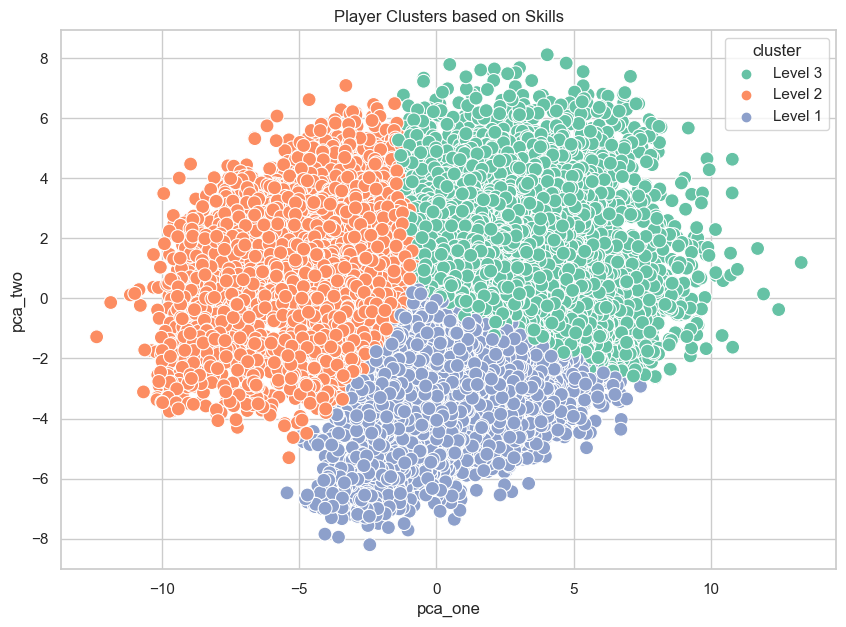

In [53]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df3['pca_one'] = pca_result[:, 0]
df3['pca_two'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=df3, palette='Set2', s=100)
plt.title('Player Clusters based on Skills')
plt.show()

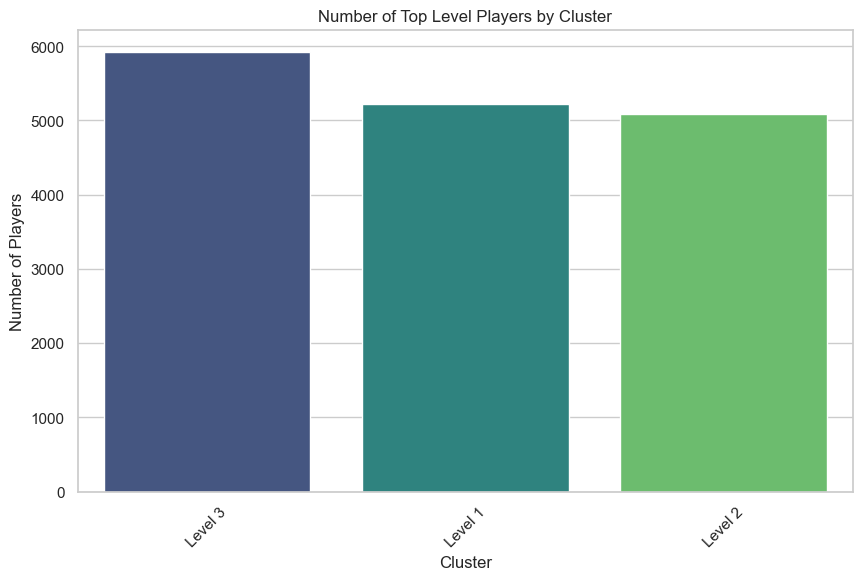

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players in each cluster
cluster_counts = df3['cluster'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.title('Number of Top Level Players by Cluster')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary for readability
plt.show()

## Analysis: From the result, in the overall list of players, Amateur players are nearly 6000 players which is highest among the groups.

## Seperating offender, midfielder and defender

In [55]:
df2

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       28        175         74          E. Hazard   
4       28        181         70       K. De Bruyne   
...    ...        ...        ...                ...   
16237   22        186         79         Shao Shuai   
16238   22        177         66       Xiao Mingjie   
16239   19        186         75          Zhang Wei   
16240   18        185         74       Wang Haijian   
16241   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                        Real Madrid     Belgium           LW, CF       91   
4                    Manchester City     Belgium          CAM, CM       91   
...                              ...         ...              ...      ...   
16237               Beijing Renhe FC    China PR               CB       48   
16238               Shanghai SIPG FC    China PR               CB       48   
16239         Hebei China Fortune FC    China PR               CM       48   
16240  Shanghai Greenland Shenhua FC    China PR               CM       48   
16241         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  striker  right_wing  left_wing  forward  \
0             94   95500000  ...     91.0        95.0       95.0     95.0   
1             93   58500000  ...     94.0        92.0       92.0     93.0   
2             92  105500000  ...     87.0        93.0       93.0     92.0   
3             91   90000000  ...     86.0        92.0       92.0     91.0   
4             91   90000000  ...     85.0        90.0       90.0     90.0   
...          ...        ...  ...      ...         ...        ...      ...   
16237         56      40000  ...     34.0        33.0       33.0     33.0   
16238         56      40000  ...     35.0        35.0       35.0     34.0   
16239         56      40000  ...     45.0        45.0       45.0     45.0   
16240         54      40000  ...     45.0        47.0       47.0     46.0   
16241         51      40000  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                    92.0      86.0           92.0                66.0   
4                    91.0      90.0           91.0                80.0   
...                   ...       ...            ...                 ...   
16237                33.0      35.0           35.0                44.0   
16238                35.0      38.0           37.0                45.0   
16239                46.0      48.0           47.0                51.0   
16240                48.0      48.0           48.0                50.0   
16241                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3           66.5     52.0  
4           78.0     69.0  
...          ...      ...  
16237       46.0     48.0  
16238       47.0     49.0  
16239       49.0     51.0  
16240       50.0     51.0  
16241       50.0     52.0  

[16242 rows x 57 columns]

In [56]:
df2.player_positions.value_counts()

CB              2322
ST              1809
CM               786
CDM, CM          731
CM, CDM          682
                ... 
LM, LWB, CM        1
CAM, CDM, CB       1
RM, LB             1
LB, CDM, LWB       1
RM, ST, CM         1
Name: player_positions, Length: 642, dtype: int64

In [57]:
df2.columns

Index(['age', 'height_cm', 'weight_kg', 'short_name', 'club', 'nationality',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'work_rate', 'striker', 'right_wing',
       'left

In [58]:
# Check the unique values in the player_positions column
unique_positions = df2['player_positions'].unique()

# Display the unique positions
print(unique_positions)


['RW, CF, ST' 'ST, LW' 'LW, CAM' 'LW, CF' 'CAM, CM' 'CB' 'CM' 'RW, ST'
 'ST, RW' 'ST' 'CDM, CM' 'CF, ST, LW' 'CAM, RW' 'CM, CDM' 'RW, LW'
 'CAM, LM, ST' 'ST, LM' 'LW, LM' 'CB, LB' 'RW, CAM, CM' 'CDM' 'CF, LM'
 'CF, ST' 'LB' 'CM, CAM, CDM' 'CF, LW, ST' 'LW' 'CB, CDM' 'RB, CM, CDM'
 'CAM, CM, LW' 'CF, ST, CAM' 'LW, CM' 'CAM, RM, RW' 'CM, CAM' 'CM, LM, RM'
 'LB, CB' 'RB' 'CAM, CF, ST' 'RW, LW, ST' 'LB, LM' 'RM, LM, CM'
 'CAM, CM, RM' 'RM, LM' 'CAM, RM' 'CF, LW, CAM' 'CAM, LM, RM' 'LM, RM, LW'
 'RM, LM, LW' 'CAM' 'CAM, CM, CF' 'LM' 'CDM, CB' 'RB, CB' 'RM, RW'
 'LM, RW, LW' 'RM, CM' 'CAM, LW, ST' 'RW, RM' 'CM, CDM, CAM' 'CM, CAM, CF'
 'LW, ST, LM' 'LM, ST' 'RM, RW, ST' 'LM, CAM, RM' 'LW, RW' 'CF, LM, LW'
 'RM, CAM' 'CF, RM, LM' 'RW, LW, CAM' 'CDM, CM, CAM' 'CDM, CB, LB'
 'ST, CAM, LW' 'ST, CF' 'RW, CAM' 'LW, LM, RW' 'RW, CAM, LW' 'RM, ST'
 'CM, CDM, RM' 'RW, CF' 'RB, RM' 'CAM, LW' 'CF, CAM, CM' 'RB, RM, CM'
 'LWB, LM, LB' 'ST, RW, LW' 'CB, LB, RB' 'RM, LM, CF' 'CAM, LM' 'LM, LWB'
 'LM, RM' 

In [59]:
# Split the 'player_positions' column into individual positions
# First, split the values by ', ' and explode into individual rows
df_exploded = df2['player_positions'].str.split(', ', expand=True).stack()

# Check unique individual positions
unique_individual_positions = df_exploded.unique()
print(unique_individual_positions)

['RW' 'CF' 'ST' 'LW' 'CAM' 'CM' 'CB' 'CDM' 'LM' 'LB' 'RB' 'RM' 'LWB' 'RWB']


## Analysis: Fetching out the unique position in the feature column player_positions. This will be useful to seperate the player groups into 4 category like Forward, Midfielder, Defender, Goalkeeper

In [60]:
import pandas as pd

# Define a mapping of positions to broader categories
position_map = {
    'ST': 'Forward',
    'CF': 'Forward',
    'RW': 'Forward',
    'LW': 'Forward',
    'CAM': 'Midfielder',
    'CM': 'Midfielder',
    'CDM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'CB': 'Defender',
    'LB': 'Defender',
    'RB': 'Defender',
    'LWB': 'Defender',
    'RWB': 'Defender',
    'GK': 'Goalkeeper'
}

# Function to map player positions to broader categories (Forward, Midfielder, etc.)
def map_positions_to_group(positions):
    # Split the positions into a list
    pos_list = positions.split(', ')
    
    # Map each position to its broader category
    mapped_positions = set([position_map.get(pos, 'Other') for pos in pos_list])
    
    if 'Forward' in mapped_positions:
        return 'Forward'
    elif 'Midfielder' in mapped_positions:
        return 'Midfielder'
    elif 'Defender' in mapped_positions:
        return 'Defender'
    elif 'Goalkeeper' in mapped_positions:
        return 'Goalkeeper'
    else:
        return 'Other'

# Apply the mapping function 
df2['position_group'] = df2['player_positions'].apply(map_positions_to_group)

# result
print(df2[['short_name', 'player_positions', 'position_group']])


              short_name player_positions position_group
0               L. Messi       RW, CF, ST        Forward
1      Cristiano Ronaldo           ST, LW        Forward
2              Neymar Jr          LW, CAM        Forward
3              E. Hazard           LW, CF        Forward
4           K. De Bruyne          CAM, CM     Midfielder
...                  ...              ...            ...
16237         Shao Shuai               CB       Defender
16238       Xiao Mingjie               CB       Defender
16239          Zhang Wei               CM     Midfielder
16240       Wang Haijian               CM     Midfielder
16241         Pan Ximing               CM     Midfielder

[16242 rows x 3 columns]


In [61]:
df2['position_group'].value_counts()

Midfielder    6845
Defender      4910
Forward       4487
Name: position_group, dtype: int64

## Analysis: with this results, the fifa20 list have more number of midfield players (6875) when compared to other groups

In [62]:
df2

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       28        175         74          E. Hazard   
4       28        181         70       K. De Bruyne   
...    ...        ...        ...                ...   
16237   22        186         79         Shao Shuai   
16238   22        177         66       Xiao Mingjie   
16239   19        186         75          Zhang Wei   
16240   18        185         74       Wang Haijian   
16241   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                        Real Madrid     Belgium           LW, CF       91   
4                    Manchester City     Belgium          CAM, CM       91   
...                              ...         ...              ...      ...   
16237               Beijing Renhe FC    China PR               CB       48   
16238               Shanghai SIPG FC    China PR               CB       48   
16239         Hebei China Fortune FC    China PR               CM       48   
16240  Shanghai Greenland Shenhua FC    China PR               CM       48   
16241         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  right_wing  left_wing  forward  \
0             94   95500000  ...        95.0       95.0     95.0   
1             93   58500000  ...        92.0       92.0     93.0   
2             92  105500000  ...        93.0       93.0     92.0   
3             91   90000000  ...        92.0       92.0     91.0   
4             91   90000000  ...        90.0       90.0     90.0   
...          ...        ...  ...         ...        ...      ...   
16237         56      40000  ...        33.0       33.0     33.0   
16238         56      40000  ...        35.0       35.0     34.0   
16239         56      40000  ...        45.0       45.0     45.0   
16240         54      40000  ...        47.0       47.0     46.0   
16241         51      40000  ...        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                    92.0      86.0           92.0                66.0   
4                    91.0      90.0           91.0                80.0   
...                   ...       ...            ...                 ...   
16237                33.0      35.0           35.0                44.0   
16238                35.0      38.0           37.0                45.0   
16239                46.0      48.0           47.0                51.0   
16240                48.0      48.0           48.0                50.0   
16241                48.0      48.0           48.0                51.0   

       full_back  defense  position_group  
0           67.5     54.0         Forward  
1           66.0     56.0         Forward  
2           66.5     49.0         Forward  
3           66.5     52.0         Forward  
4           78.0     69.0      Midfielder  
...          ...      ...             ...  
16237       46.0     48.0        Defender  
16238       47.0     49.0        Defender  
16239       49.0     51.0      Midfielder  
16240       50.0     51.0      Midfielder  
16241       50.0     52.0      Midfielder  

[16242 rows x 58 columns]

## A) Clustering foot ball players based on player skills - offensive players

In [63]:
# Filter players who are playing Forward position
offensive_players = df2[df2['position_group']=='Forward']

In [64]:
offensive_players

age  height_cm  weight_kg         short_name                 club  \
0       32        170         72           L. Messi         FC Barcelona   
1       34        187         83  Cristiano Ronaldo             Juventus   
2       27        175         68          Neymar Jr  Paris Saint-Germain   
3       28        175         74          E. Hazard          Real Madrid   
7       27        175         71           M. Salah            Liverpool   
...    ...        ...        ...                ...                  ...   
16216   20        185         75      Shan Huanhuan     Dalian YiFang FC   
16217   19        178         74          R. Roache            Blackpool   
16220   18        183         66    E. Jääskeläinen            Blackpool   
16223   19        179         72       Song Min Kyu      Pohang Steelers   
16226   19        170         60          H. Shirai          Gamba Osaka   

               nationality player_positions  overall  potential  value_eur  \
0                Argentina       RW, CF, ST       94         94   95500000   
1                 Portugal           ST, LW       93         93   58500000   
2                   Brazil          LW, CAM       92         92  105500000   
3                  Belgium           LW, CF       91         91   90000000   
7                    Egypt           RW, ST       90         90   80500000   
...                    ...              ...      ...        ...        ...   
16216             China PR               ST       48         65      70000   
16217  Republic of Ireland               ST       48         65      60000   
16220              Finland               ST       48         65      60000   
16223       Korea Republic               LW       48         64      60000   
16226                Japan               ST       48         62      60000   

       ...  right_wing  left_wing  forward  attacking_midfield  midfield  \
0      ...        95.0       95.0     95.0                95.0      89.0   
1      ...        92.0       92.0     93.0                91.0      84.0   
2      ...        93.0       93.0     92.0                93.0      85.0   
3      ...        92.0       92.0     91.0                92.0      86.0   
7      ...        91.0       91.0     91.0                90.0      84.0   
...    ...         ...        ...      ...                 ...       ...   
16216  ...        47.0       47.0     48.0                46.0      43.0   
16217  ...        47.0       47.0     48.0                46.0      41.0   
16220  ...        49.0       49.0     50.0                48.0      43.0   
16223  ...        49.0       49.0     49.0                47.0      41.0   
16226  ...        48.0       48.0     48.0                47.0      42.0   

       wide_midfield  defensive_midfield  full_back  defense  position_group  
0               94.0                68.0       67.5     54.0         Forward  
1               91.0                64.0       66.0     56.0         Forward  
2               92.0                64.0       66.5     49.0         Forward  
3               92.0                66.0       66.5     52.0         Forward  
7               90.0                70.0       71.0     60.0         Forward  
...              ...                 ...        ...      ...             ...  
16216           46.0                38.0       39.0     37.0         Forward  
16217           45.0                31.0       33.0     29.0         Forward  
16220           48.0                34.0       36.0     30.0         Forward  
16223           48.0                33.0       37.0     31.0         Forward  
16226           46.0                32.0       35.5     30.0         Forward  

[4487 rows x 58 columns]

In [65]:
offensive_players.columns

Index(['age', 'height_cm', 'weight_kg', 'short_name', 'club', 'nationality',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'work_rate', 'striker', 'right_wing',
       'left

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select relevant attributes for clustering
skills_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
                     'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                     'attacking_short_passing', 'attacking_volleys', 
                     'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                     'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                     'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                     'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                     'mentality_penalties', 'mentality_composure', 
                     'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']


df_offensive_players = offensive_players.dropna(subset = skills_attributes)
df_offensive_players[skills_attributes]

pace  shooting  passing  dribbling  defending  physic  \
0      87.0      92.0     92.0       96.0       39.0    66.0   
1      90.0      93.0     82.0       89.0       35.0    78.0   
2      91.0      85.0     87.0       95.0       32.0    58.0   
3      91.0      83.0     86.0       94.0       35.0    66.0   
7      93.0      86.0     81.0       89.0       45.0    74.0   
...     ...       ...      ...        ...        ...     ...   
16216  58.0      43.0     35.0       49.0       30.0    48.0   
16217  52.0      48.0     36.0       46.0       18.0    43.0   
16220  60.0      49.0     39.0       51.0       19.0    44.0   
16223  62.0      49.0     41.0       49.0       21.0    44.0   
16226  56.0      49.0     37.0       47.0       19.0    40.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                      88                   95                          70   
1                      84                   94                          89   
2                      87                   87                          62   
3                      81                   84                          61   
7                      79                   90                          59   
...                   ...                  ...                         ...   
16216                  26                   44                          46   
16217                  32                   53                          45   
16220                  32                   49                          36   
16223                  45                   48                          32   
16226                  33                   51                          46   

       attacking_short_passing  ...  power_long_shots  mentality_aggression  \
0                           92  ...                94                    48   
1                           83  ...                93                    63   
2                           87  ...                84                    51   
3                           89  ...                80                    54   
7                           84  ...                84                    63   
...                        ...  ...               ...                   ...   
16216                       38  ...                39                    35   
16217                       37  ...                41                    25   
16220                       43  ...                46                    27   
16223                       42  ...                34                    31   
16226                       42  ...                47                    28   

       mentality_interceptions  mentality_positioning  mentality_vision  \
0                           40                     94                94   
1                           29                     95                82   
2                           36                     87                90   
3                           41                     87                89   
7                           55                     92                84   
...                        ...                    ...               ...   
16216                       27                     44                38   
16217                       13                     48                41   
16220                       19                     43                46   
16223                       15                     49                43   
16226                       19                     52                42   

       mentality_penalties  mentality_composure  defending_marking  \
0                       75                   96                 33   
1                       85                   95                 28   
2                       90                   94                 27   
3                       88                   91                 34   
7                       77                   91                 38   
...                    ...     

In [67]:
# Standardize the data using standardscaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_offensive_players[skills_attributes])

# Create a DataFrame with scaled data
df_offensive_players_scaled = pd.DataFrame(scaled_data, columns=skills_attributes)
df_offensive_players_scaled

pace  shooting   passing  dribbling  defending    physic  \
0     1.393005  3.512319  3.551350   3.696067   0.563429  0.353700   
1     1.676788  3.637385  2.544290   2.812670   0.165772  1.537111   
2     1.771382  2.636859  3.047820   3.569867  -0.132471 -0.435240   
3     1.771382  2.386728  2.947114   3.443668   0.165772  0.353700   
4     1.960570  2.761925  2.443585   2.812670   1.159916  1.142641   
...        ...       ...       ...        ...        ...       ...   
4482 -1.350230 -2.615899 -2.188891  -2.235308  -0.331300 -1.421416   
4483 -1.917795 -1.990571 -2.088185  -2.613907  -1.524273 -1.914504   
4484 -1.161041 -1.865505 -1.786067  -1.982910  -1.424858 -1.815886   
4485 -0.971852 -1.865505 -1.584655  -2.235308  -1.226029 -1.815886   
4486 -1.539418 -1.865505 -1.987479  -2.487707  -1.424858 -2.210356   

      attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0               2.519997             3.580997                    0.943723   
1               2.226748             3.460642                    2.499466   
2               2.446684             2.618154                    0.288674   
3               2.006812             2.257087                    0.206792   
4               1.860187             2.979220                    0.043030   
...                  ...                  ...                         ...   
4482           -2.025356            -2.557131                   -1.021426   
4483           -1.585483            -1.473932                   -1.103307   
4484           -1.585483            -1.955354                   -1.840238   
4485           -0.632425            -2.075709                   -2.167762   
4486           -1.512171            -1.714643                   -1.021426   

      attacking_short_passing  ...  power_long_shots  mentality_aggression  \
0                    3.308326  ...          3.498243             -0.268534   
1                    2.338543  ...          3.395399              0.722564   
2                    2.769558  ...          2.469800             -0.070314   
3                    2.985065  ...          2.058423              0.127905   
4                    2.446297  ...          2.469800              0.722564   
...                       ...  ...               ...                   ...   
4482                -2.510368  ...         -2.158196             -1.127485   
4483                -2.618121  ...         -1.952507             -1.788216   
4484                -1.971600  ...         -1.438285             -1.656070   
4485                -2.079354  ...         -2.672417             -1.391777   
4486                -2.079354  ...         -1.335441             -1.589997   

      mentality_interceptions  mentality_positioning  mentality_vision  \
0                    0.789409               3.190116          3.545305   
1                   -0.056066               3.301030          2.340512   
2                    0.481964               2.413722          3.143707   
3                    0.866270               2.413722          3.043308   
4                    1.942329               2.968289          2.541311   
...                       ...                    ...               ...   
4482                -0.209788              -2.355558         -2.077061   
4483                -1.285847              -1.911904         -1.775863   
4484                -0.824679              -2.466472         -1.273866   
4485                -1.132125              -1.800991         -1.575064   
4486                -0.824679              -1.468250         -1.675464   

      mentality_penalties  mentality_composure  defending_marking  \
0                1.463703             3.467720           0.041416   
1                2.533386             3.366894          -0.349482   
2                3.068227             3.266069          -0.427662   
3                2.854291             2.963593           0.119595   
4                1.677640             2.963593           0.432314   
... 

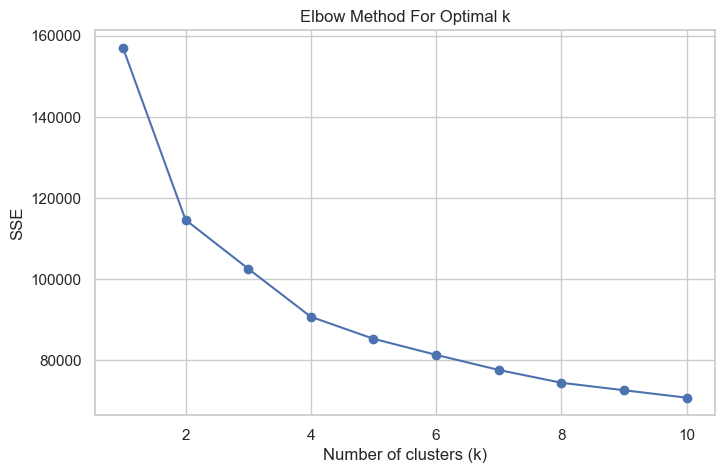

short_name  cluster
0               L. Messi        2
1      Cristiano Ronaldo        2
2              Neymar Jr        2
3              E. Hazard        2
7               M. Salah        2
...                  ...      ...
16216      Shan Huanhuan        1
16217          R. Roache        1
16220    E. Jääskeläinen        1
16223       Song Min Kyu        1
16226          H. Shirai        1

[4487 rows x 2 columns]

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_offensive_players_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
offensive_players['cluster'] = kmeans.fit_predict(df_offensive_players_scaled)

offensive_players[['short_name', 'cluster']]

In [69]:
offensive_players['cluster'].value_counts()

0    1999
1    1340
2    1148
Name: cluster, dtype: int64

In [70]:
# mapping
cluster_rename_map = {
    0: 'Offender - Level 1',
    1: 'Offender - Level 2',
    2: 'Offender - Level 3'
}

# Apply the mapping
offensive_players['cluster'] = offensive_players['cluster'].replace(cluster_rename_map)

print(offensive_players['cluster'].value_counts())

Offender - Level 1    1999
Offender - Level 2    1340
Offender - Level 3    1148
Name: cluster, dtype: int64


In [71]:
# Show the players grouped by cluster
for cluster_label, cluster_data in offensive_players.groupby('cluster'):
    print(f"Cluster {cluster_label}:")
    display(cluster_data)
    print("\n") 

Cluster Offender - Level 1:


age  height_cm  weight_kg       short_name                  club  \
1126    19        182         79          M. Kean               Everton   
1396    27        186         85       R. Inglese                 Parma   
1590    25        197         82       L. Ajorque  RC Strasbourg Alsace   
1592    25        194         86        V. Muriqi         Fenerbahçe SK   
1610    26        190         92      M. Krmenčík        Viktoria Plzeň   
...    ...        ...        ...              ...                   ...   
14645   25        183         77  Wilson Carvalho    Accrington Stanley   
14646   40        180         76       K. Ellison             Morecambe   
14960   32        183         75       D. Fordyce          Sligo Rovers   
14970   32        175         65    Tong Xiaoxing            Wuhan Zall   
15041   20        178         64       A. Bradley          Lincoln City   

            nationality player_positions  overall  potential  value_eur  ...  \
1126              Italy               ST       76         89   14500000  ...   
1396              Italy               ST       76         76    8000000  ...   
1590             France               ST       75         79    8500000  ...   
1592             Kosovo               ST       75         79    8500000  ...   
1610     Czech Republic               ST       75         78    8500000  ...   
...                 ...              ...      ...        ...        ...  ...   
14645          Portugal               RW       58         59     150000  ...   
14646           England           LM, ST       58         58          0  ...   
14960  Northern Ireland      CAM, CM, RW       57         57      80000  ...   
14970          China PR           LW, CM       57         57      80000  ...   
15041           Finland           RW, CM       56         71     200000  ...   

       left_wing  forward  attacking_midfield  midfield  wide_midfield  \
1126        72.0     74.0                70.0      61.0           69.0   
1396        66.0     71.0                66.0      58.0           64.0   
1590        67.0     72.0                69.0      63.0           65.0   
1592        67.0     72.0                69.0      62.0           66.0   
1610        71.0     73.0                70.0      61.0           69.0   
...          ...      ...                 ...       ...            ...   
14645       60.0     59.0                58.0      54.0           60.0   
14646       60.0     61.0                60.0      58.0           59.0   
14960       58.0     58.0                58.0      58.0           57.0   
14970       59.0     58.0                58.0      56.0           59.0   
15041       58.0     58.0                58.0      57.0           58.0   

       defensive_midfield  full_back  defense  position_group  \
1126                 48.0       50.0     46.0         Forward   
1396                 45.0       45.0     46.0         Forward   
1590                 49.0       46.0     47.0         Forward   
1592                 49.0       47.0     46.0         Forward   
1610                 49.0       49.0     47.0         Forward   
...                   ...        ...      ...             ...   
14645                49.0       52.5     47.0         Forward   
14646                54.0       51.0     54.0         Forward   
14960                56.0       54.5     56.0         Forward   
14970                55.0       57.0     55.0         Forward   
15041                55.0       57.0     54.0         Forward   

                  cluster  
1126   Offender - Level 1  
1396   Offender - Level 1  
1590   Offender - Level 1  
1592   Offender - Level 1  
1610   Offender - Level 1  
...                   ...  
14645  Offender - Level 1  
14646  Offender - Level 1  
14960  Offender - Level 1  
14970  Offender - Level 1  
15041  Offender - Level 1  

[1999 rows x 59 columns]



Cluster Offender - Level 2:


age  height_cm  weight_kg         short_name              club  \
3395    33        190         82         D. Ciofani      US Cremonese   
3643    31        193         96  Paulao Junqueiras            Grêmio   
3790    23        195         94        H. Weydandt       Hannover 96   
3815    24        187         92           C. Larin  SV Zulte-Waregem   
4270    28        201         90         H. Veerman      FC St. Pauli   
...    ...        ...        ...                ...               ...   
16216   20        185         75      Shan Huanhuan  Dalian YiFang FC   
16217   19        178         74          R. Roache         Blackpool   
16220   18        183         66    E. Jääskeläinen         Blackpool   
16223   19        179         72       Song Min Kyu   Pohang Steelers   
16226   19        170         60          H. Shirai       Gamba Osaka   

               nationality player_positions  overall  potential  value_eur  \
3395                 Italy               ST       72         72    2000000   
3643                Brazil               ST       72         72    2800000   
3790               Germany               ST       71         77    3300000   
3815                Canada               ST       71         76    3200000   
4270           Netherlands               ST       71         71    2400000   
...                    ...              ...      ...        ...        ...   
16216             China PR               ST       48         65      70000   
16217  Republic of Ireland               ST       48         65      60000   
16220              Finland               ST       48         65      60000   
16223       Korea Republic               LW       48         64      60000   
16226                Japan               ST       48         62      60000   

       ...  left_wing  forward  attacking_midfield  midfield  wide_midfield  \
3395   ...       61.0     67.0                61.0      53.0           58.0   
3643   ...       61.0     67.0                63.0      58.0           58.0   
3790   ...       62.0     66.0                61.0      55.0           60.0   
3815   ...       64.0     67.0                63.0      53.0           61.0   
4270   ...       61.0     66.0                61.0      55.0           60.0   
...    ...        ...      ...                 ...       ...            ...   
16216  ...       47.0     48.0                46.0      43.0           46.0   
16217  ...       47.0     48.0                46.0      41.0           45.0   
16220  ...       49.0     50.0                48.0      43.0           48.0   
16223  ...       49.0     49.0                47.0      41.0           48.0   
16226  ...       48.0     48.0                47.0      42.0           46.0   

       defensive_midfield  full_back  defense  position_group  \
3395                 44.0       42.5     46.0         Forward   
3643                 46.0       41.0     45.0         Forward   
3790                 48.0       48.0     51.0         Forward   
3815                 43.0       44.5     45.0         Forward   
4270                 47.0       45.5     49.0         Forward   
...                   ...        ...      ...             ...   
16216                38.0       39.0     37.0         Forward   
16217                31.0       33.0     29.0         Forward   
16220                34.0       36.0     30.0         Forward   
16223                33.0       37.0     31.0         Forward   
16226                32.0       35.5     30.0         Forward   

                  cluster  
3395   Offender - Level 2  
3643   Offender - Level 2  
3790   Offender - Level 2  
3815   Offender - Level 2  
4270   Offender - Level 2  
...                   ...  
16216  Offender - Level 2  
16217  Offender - Level 2  
16220  Offender - Level 2  
16223  Offender - Level 2  
16226  Offender - Level 2  

[1340 rows x 59 columns]



Cluster Offender - Level 3:


age  height_cm  weight_kg         short_name                 club  \
0      32        170         72           L. Messi         FC Barcelona   
1      34        187         83  Cristiano Ronaldo             Juventus   
2      27        175         68          Neymar Jr  Paris Saint-Germain   
3      28        175         74          E. Hazard          Real Madrid   
7      27        175         71           M. Salah            Liverpool   
...   ...        ...        ...                ...                  ...   
7785   30        182         79           L. Silva  Seattle Sounders FC   
7850   31        170         71          K. Fisker           Brøndby IF   
7919   31        184         77    Venanzio Meirás          Chapecoense   
8608   37        184         94         D. Braaten       Stabæk Fotball   
8778   29        181         77         B. Pranter            WSG Tirol   

        nationality player_positions  overall  potential  value_eur  ...  \
0         Argentina       RW, CF, ST       94         94   95500000  ...   
1          Portugal           ST, LW       93         93   58500000  ...   
2            Brazil          LW, CAM       92         92  105500000  ...   
3           Belgium           LW, CF       91         91   90000000  ...   
7             Egypt           RW, ST       90         90   80500000  ...   
...             ...              ...      ...        ...        ...  ...   
7785  United States          ST, CAM       67         67     725000  ...   
7850        Denmark           CM, RW       67         67     650000  ...   
7919         Brazil          ST, CAM       67         67     675000  ...   
8608         Norway           RM, ST       66         66     220000  ...   
8778        Austria      CAM, RM, ST       66         66     625000  ...   

      left_wing  forward  attacking_midfield  midfield  wide_midfield  \
0          95.0     95.0                95.0      89.0           94.0   
1          92.0     93.0                91.0      84.0           91.0   
2          93.0     92.0                93.0      85.0           92.0   
3          92.0     91.0                92.0      86.0           92.0   
7          91.0     91.0                90.0      84.0           90.0   
...         ...      ...                 ...       ...            ...   
7785       67.0     68.0                67.0      66.0           66.0   
7850       69.0     67.0                69.0      67.0           70.0   
7919       67.0     69.0                69.0      68.0           66.0   
8608       67.0     68.0                68.0      65.0           66.0   
8778       67.0     68.0                67.0      66.0           67.0   

      defensive_midfield  full_back  defense  position_group  \
0                   68.0       67.5     54.0         Forward   
1                   64.0       66.0     56.0         Forward   
2                   64.0       66.5     49.0         Forward   
3                   66.0       66.5     52.0         Forward   
7                   70.0       71.0     60.0         Forward   
...                  ...        ...      ...             ...   
7785                61.0       60.5     59.0         Forward   
7850                61.0       60.0     54.0         Forward   
7919                55.0       52.5     47.0         Forward   
8608                61.0       58.5     61.0         Forward   
8778                60.0       61.0     57.0         Forward   

                 cluster  
0     Offender - Level 3  
1     Offender - Level 3  
2     Offender - Level 3  
3     Offender - Level 3  
7     Offender - Level 3  
...                  ...  
7785  Offender - Level 3  
7850  Offender - Level 3  
7919  Offender - Level 3  
8608  Offender - Level 3  
8778  Offender - Level 3  

[1148 rows x 59 columns]

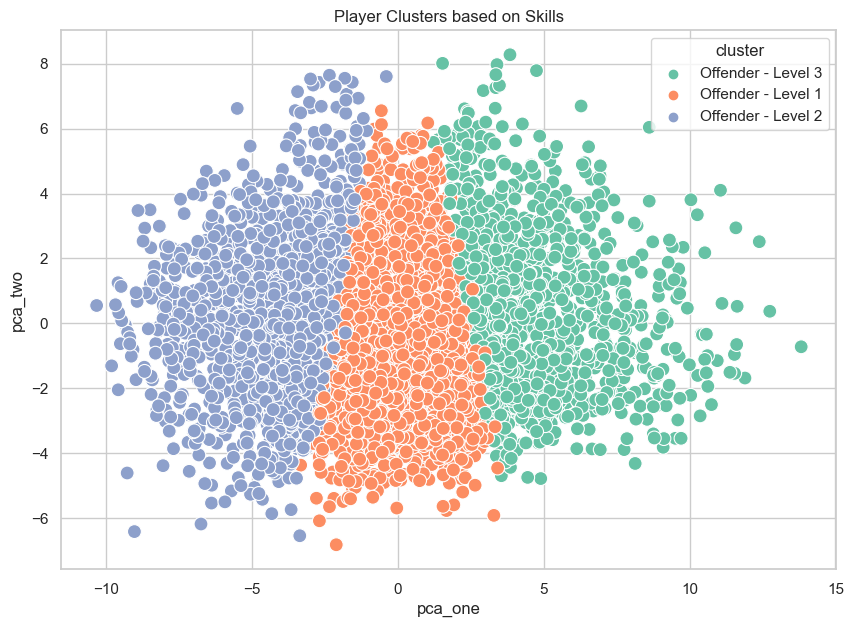

In [72]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_offensive_players_scaled)
offensive_players['pca_one'] = pca_result[:, 0]
offensive_players['pca_two'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=offensive_players, palette='Set2', s=100)
plt.title('Player Clusters based on Skills')
plt.show()

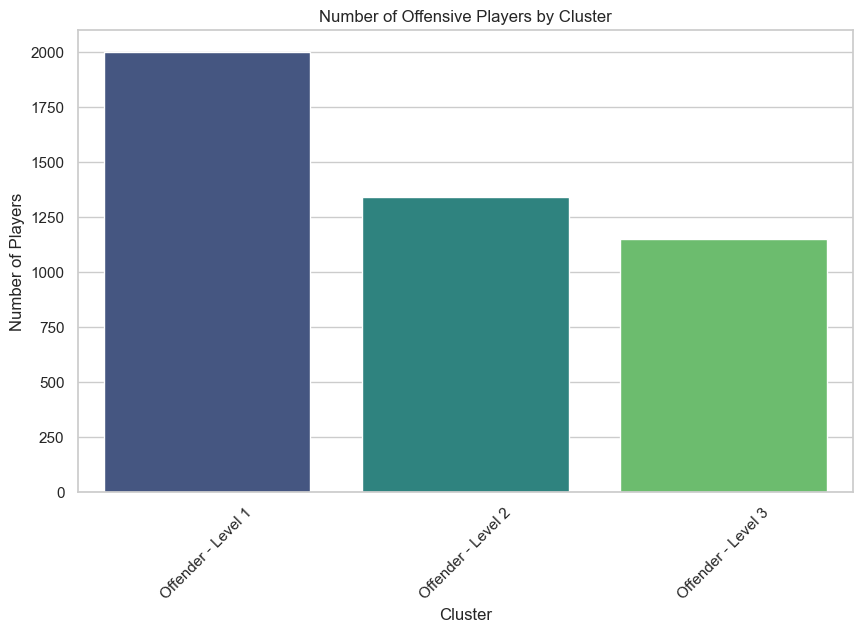

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players in each cluster
cluster_counts = offensive_players['cluster'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.title('Number of Offensive Players by Cluster')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary for readability
plt.show()

## Analysis: From the group of Forward players list, Elite players are large in numbers (1999) when compared to other list of players

## B) Clustering foot ball players based on player skills - midfield players

In [74]:
df2

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       28        175         74          E. Hazard   
4       28        181         70       K. De Bruyne   
...    ...        ...        ...                ...   
16237   22        186         79         Shao Shuai   
16238   22        177         66       Xiao Mingjie   
16239   19        186         75          Zhang Wei   
16240   18        185         74       Wang Haijian   
16241   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                        Real Madrid     Belgium           LW, CF       91   
4                    Manchester City     Belgium          CAM, CM       91   
...                              ...         ...              ...      ...   
16237               Beijing Renhe FC    China PR               CB       48   
16238               Shanghai SIPG FC    China PR               CB       48   
16239         Hebei China Fortune FC    China PR               CM       48   
16240  Shanghai Greenland Shenhua FC    China PR               CM       48   
16241         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  right_wing  left_wing  forward  \
0             94   95500000  ...        95.0       95.0     95.0   
1             93   58500000  ...        92.0       92.0     93.0   
2             92  105500000  ...        93.0       93.0     92.0   
3             91   90000000  ...        92.0       92.0     91.0   
4             91   90000000  ...        90.0       90.0     90.0   
...          ...        ...  ...         ...        ...      ...   
16237         56      40000  ...        33.0       33.0     33.0   
16238         56      40000  ...        35.0       35.0     34.0   
16239         56      40000  ...        45.0       45.0     45.0   
16240         54      40000  ...        47.0       47.0     46.0   
16241         51      40000  ...        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                    92.0      86.0           92.0                66.0   
4                    91.0      90.0           91.0                80.0   
...                   ...       ...            ...                 ...   
16237                33.0      35.0           35.0                44.0   
16238                35.0      38.0           37.0                45.0   
16239                46.0      48.0           47.0                51.0   
16240                48.0      48.0           48.0                50.0   
16241                48.0      48.0           48.0                51.0   

       full_back  defense  position_group  
0           67.5     54.0         Forward  
1           66.0     56.0         Forward  
2           66.5     49.0         Forward  
3           66.5     52.0         Forward  
4           78.0     69.0      Midfielder  
...          ...      ...             ...  
16237       46.0     48.0        Defender  
16238       47.0     49.0        Defender  
16239       49.0     51.0      Midfielder  
16240       50.0     51.0      Midfielder  
16241       50.0     52.0      Midfielder  

[16242 rows x 58 columns]

In [75]:
# Filter players who are Midfielders
midfield_players = df2[df2['position_group']=='Midfielder']

In [76]:
midfield_players

age  height_cm  weight_kg       short_name  \
4       28        181         70     K. De Bruyne   
6       33        172         66        L. Modrić   
11      28        168         72         N. Kanté   
17      30        189         76  Sergio Busquets   
20      26        191         84         P. Pogba   
...    ...        ...        ...              ...   
16235   21        177         70         M. Sagaf   
16236   20        180         72         E. Tweed   
16239   19        186         75        Zhang Wei   
16240   18        185         74     Wang Haijian   
16241   26        182         78       Pan Ximing   

                                club          nationality player_positions  \
4                    Manchester City              Belgium          CAM, CM   
6                        Real Madrid              Croatia               CM   
11                           Chelsea               France          CDM, CM   
17                      FC Barcelona                Spain          CDM, CM   
20                 Manchester United               France          CM, CDM   
...                              ...                  ...              ...   
16235                Carlisle United              England               CM   
16236                     Derry City  Republic of Ireland               CM   
16239         Hebei China Fortune FC             China PR               CM   
16240  Shanghai Greenland Shenhua FC             China PR               CM   
16241         Hebei China Fortune FC             China PR               CM   

       overall  potential  value_eur  ...  right_wing  left_wing  forward  \
4           91         91   90000000  ...        90.0       90.0     90.0   
6           90         90   45000000  ...        87.0       87.0     86.0   
11          89         90   66000000  ...        80.0       80.0     79.0   
17          89         89   55000000  ...        76.0       76.0     78.0   
20          88         91   72500000  ...        85.0       85.0     86.0   
...        ...        ...        ...  ...         ...        ...      ...   
16235       48         60      50000  ...        47.0       47.0     48.0   
16236       48         59      50000  ...        46.0       46.0     46.0   
16239       48         56      40000  ...        45.0       45.0     45.0   
16240       48         54      40000  ...        47.0       47.0     46.0   
16241       48         51      40000  ...        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
4                    91.0      90.0           91.0                80.0   
6                    89.0      90.0           88.0                84.0   
11                   81.0      85.0           82.0                90.0   
17                   81.0      86.0           78.0                89.0   
20                   87.0      87.0           86.0                80.0   
...                   ...       ...            ...                 ...   
16235                48.0      48.0           49.0                47.0   
16236                48.0      48.0           47.0                48.0   
16239                46.0      48.0           47.0                51.0   
16240                48.0      48.0           48.0                50.0   
16241                48.0      48.0           48.0                51.0   

       full_back  defense  position_group  
4           78.0     69.0      Midfielder  
6           83.0     75.0      Midfielder  
11          87.5     86.0      Midfielder  
17          81.0     85.0      Midfielder  
20          78.0     75.0      Midfielder  
...          ...      ...             ...  
16235       47.0     45.0      Midfielder  
16236       48.0     47.0      Midfielder  
16239       49.0     51.0      Midfielder  
16240       50.0     51.0      Midfielder  
16241       50.0     52.0      Midfielder  

[6845 rows x 58 columns]

In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select relevant attributes for clustering
skills_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
                     'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                     'attacking_short_passing', 'attacking_volleys', 
                     'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                     'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                     'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                     'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                     'mentality_penalties', 'mentality_composure', 
                     'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']

df_midfield_players = midfield_players.dropna(subset = skills_attributes)
df_midfield_players[skills_attributes]

pace  shooting  passing  dribbling  defending  physic  \
4      76.0      86.0     92.0       86.0       61.0    78.0   
6      74.0      76.0     89.0       89.0       72.0    66.0   
11     78.0      65.0     77.0       81.0       87.0    83.0   
17     42.0      62.0     80.0       80.0       85.0    80.0   
20     74.0      81.0     86.0       85.0       66.0    86.0   
...     ...       ...      ...        ...        ...     ...   
16235  61.0      36.0     47.0       44.0       38.0    53.0   
16236  52.0      37.0     47.0       46.0       42.0    49.0   
16239  54.0      35.0     44.0       45.0       48.0    51.0   
16240  59.0      35.0     47.0       47.0       45.0    52.0   
16241  60.0      32.0     51.0       45.0       47.0    55.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
4                      93                   82                          55   
6                      86                   72                          55   
11                     68                   65                          54   
17                     62                   67                          68   
20                     80                   75                          75   
...                   ...                  ...                         ...   
16235                  39                   26                          45   
16236                  37                   35                          49   
16239                  32                   33                          49   
16240                  39                   34                          47   
16241                  44                   30                          48   

       attacking_short_passing  ...  power_long_shots  mentality_aggression  \
4                           92  ...                90                    76   
6                           92  ...                82                    62   
11                          86  ...                63                    90   
17                          89  ...                54                    85   
20                          86  ...                82                    78   
...                        ...  ...               ...                   ...   
16235                       54  ...                38                    55   
16236                       55  ...                31                    52   
16239                       53  ...                26                    50   
16240                       54  ...                28                    57   
16241                       58  ...                30                    54   

       mentality_interceptions  mentality_positioning  mentality_vision  \
4                           61                     88                94   
6                           82                     79                91   
11                          92                     72                79   
17                          89                     77                86   
20                          64                     83                88   
...                        ...                    ...               ...   
16235                       37                     53                44   
16236                       45                     37                49   
16239                       45                     38                38   
16240                       49                     31                48   
16241                       47                     29                52   

       mentality_penalties  mentality_composure  defending_marking  \
4                       79                   91                 68   
6                       82                   92                 68   
11                      54                   85                 90   
17                      60                   93                 90   
20                      83                   87                 63   
...                    ...     

In [78]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_midfield_players[skills_attributes])

df_midfield_players_scaled = pd.DataFrame(scaled_data, columns=skills_attributes)
df_midfield_players_scaled

pace  shooting   passing  dribbling  defending    physic  \
0     0.838068  2.949757  3.675698   2.650608   0.501035  1.419021   
1     0.635898  2.013623  3.310400   3.036682   1.301846  0.233955   
2     1.040239  0.983877  1.849207   2.007152   2.393861  1.912799   
3    -2.598825  0.703037  2.214505   1.878460   2.248259  1.616532   
4     0.635898  2.481690  2.945102   2.521917   0.865040  2.209066   
...        ...       ...       ...        ...        ...       ...   
6840 -0.678208 -1.730910 -1.803774  -2.754426  -1.173388 -1.049867   
6841 -1.587974 -1.637296 -1.803774  -2.497043  -0.882184 -1.444890   
6842 -1.385803 -1.824523 -2.169072  -2.625735  -0.445378 -1.247379   
6843 -0.880378 -1.824523 -1.803774  -2.368352  -0.663781 -1.148623   
6844 -0.779293 -2.105363 -1.316710  -2.625735  -0.518179 -0.852356   

      attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0               3.096790             2.498941                    0.208190   
1               2.479814             1.682192                    0.208190   
2               0.893305             1.110468                    0.115557   
3               0.364468             1.273818                    1.412416   
4               1.950978             1.927217                    2.060845   
...                  ...                  ...                         ...   
6840           -1.662738            -2.074852                   -0.718137   
6841           -1.839017            -1.339778                   -0.347606   
6842           -2.279714            -1.503128                   -0.347606   
6843           -1.662738            -1.421453                   -0.532872   
6844           -1.222041            -1.748153                   -0.440239   

      attacking_short_passing  ...  power_long_shots  mentality_aggression  \
0                    3.284161  ...          2.612579              1.139118   
1                    3.284161  ...          2.012346              0.140256   
2                    2.509782  ...          0.586794              2.137980   
3                    2.896971  ...         -0.088467              1.781244   
4                    2.509782  ...          2.012346              1.281812   
...                       ...  ...               ...                   ...   
6840                -1.620237  ...         -1.288932             -0.359176   
6841                -1.491174  ...         -1.814136             -0.573217   
6842                -1.749300  ...         -2.189281             -0.715912   
6843                -1.620237  ...         -2.039223             -0.216481   
6844                -1.103984  ...         -1.889165             -0.430523   

      mentality_interceptions  mentality_positioning  mentality_vision  \
0                    0.448211               2.853629          3.256978   
1                    1.732894               2.015419          2.958787   
2                    2.344648               1.363478          1.766019   
3                    2.161122               1.829150          2.461800   
4                    0.631737               2.387957          2.660595   
...                       ...                    ...               ...   
6840                -1.019998              -0.406077         -1.712886   
6841                -0.530595              -1.896229         -1.215900   
6842                -0.530595              -1.803094         -2.309270   
6843                -0.285893              -2.455035         -1.315297   
6844                -0.408244              -2.641304         -0.917708   

      mentality_penalties  mentality_composure  defending_marking  \
0                2.443091             2.919994           0.977207   
1                2.721796             3.018596           0.977207   
2                0.120548             2.328381           2.474887   
3                0.677958             3.117199           2.474887   
4                2.814697             2.525585           0.636825   
... 

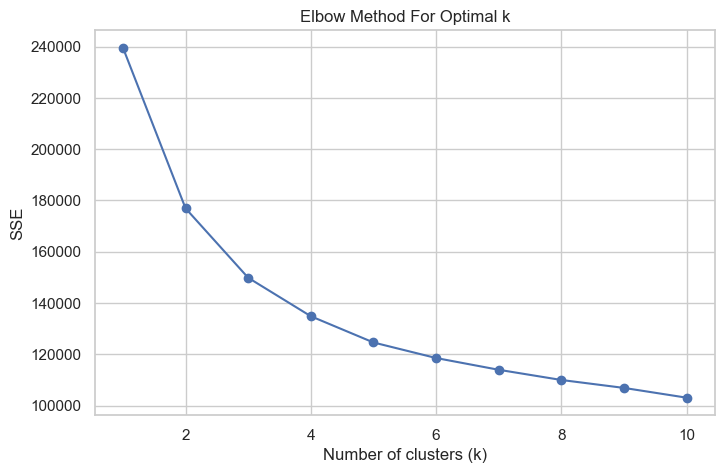

short_name  cluster
4         K. De Bruyne        2
6            L. Modrić        2
11            N. Kanté        2
17     Sergio Busquets        2
20            P. Pogba        2
...                ...      ...
16235         M. Sagaf        0
16236         E. Tweed        0
16239        Zhang Wei        0
16240     Wang Haijian        0
16241       Pan Ximing        0

[6845 rows x 2 columns]

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_midfield_players_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

# Choose the number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
midfield_players['cluster'] = kmeans.fit_predict(df_midfield_players_scaled)

# View the clusters assigned to each player
midfield_players[['short_name', 'cluster']]

In [80]:
midfield_players['cluster'].value_counts()

2    2696
0    2262
1    1887
Name: cluster, dtype: int64

In [81]:
# mapping 
cluster_rename_map = {
    0: 'Midfielder - Level 1',
    1: 'Midfielder - Level 2',
    2: 'Midfielder - Level 3'
}

# Apply the mapping 
midfield_players['cluster'] = midfield_players['cluster'].replace(cluster_rename_map)

print(midfield_players['cluster'].value_counts())

Midfielder - Level 3    2696
Midfielder - Level 1    2262
Midfielder - Level 2    1887
Name: cluster, dtype: int64


In [82]:
# Show the players grouped by cluster
for cluster_label, cluster_data in midfield_players.groupby('cluster'):
    print(f"Cluster {cluster_label}:")
    display(cluster_data)
    print("\n")  

Cluster Midfielder - Level 1:


age  height_cm  weight_kg    short_name                           club  \
443     30        186         81     S. Bender            Bayer 04 Leverkusen   
666     20        185         80       D. Rice                West Ham United   
701     25        179         71    W. Barrios                       Colombia   
978     25        191         91  C. Luyindama                 Galatasaray SK   
1105    29        188         87     T. Strobl       Borussia Mönchengladbach   
...    ...        ...        ...           ...                            ...   
16235   21        177         70      M. Sagaf                Carlisle United   
16236   20        180         72      E. Tweed                     Derry City   
16239   19        186         75     Zhang Wei         Hebei China Fortune FC   
16240   18        185         74  Wang Haijian  Shanghai Greenland Shenhua FC   
16241   26        182         78    Pan Ximing         Hebei China Fortune FC   

               nationality player_positions  overall  potential  value_eur  \
443                Germany          CB, CDM       80         80   12000000   
666                England      CDM, CB, CM       78         87   15000000   
701               Colombia          CDM, CM       78         83          0   
978               DR Congo          CB, CDM       77         80   10000000   
1105               Germany          CDM, CB       77         77    7500000   
...                    ...              ...      ...        ...        ...   
16235              England               CM       48         60      50000   
16236  Republic of Ireland               CM       48         59      50000   
16239             China PR               CM       48         56      40000   
16240             China PR               CM       48         54      40000   
16241             China PR               CM       48         51      40000   

       ...  left_wing  forward  attacking_midfield  midfield  wide_midfield  \
443    ...       60.0     63.0                64.0      70.0           63.0   
666    ...       62.0     63.0                67.0      73.0           65.0   
701    ...       65.0     64.0                67.0      71.0           69.0   
978    ...       49.0     51.0                53.0      60.0           53.0   
1105   ...       58.0     61.0                63.0      70.0           62.0   
...    ...        ...      ...                 ...       ...            ...   
16235  ...       47.0     48.0                48.0      48.0           49.0   
16236  ...       46.0     46.0                48.0      48.0           47.0   
16239  ...       45.0     45.0                46.0      48.0           47.0   
16240  ...       47.0     46.0                48.0      48.0           48.0   
16241  ...       46.0     45.0                48.0      48.0           48.0   

       defensive_midfield  full_back  defense  position_group  \
443                  78.0       74.0     81.0      Midfielder   
666                  78.0       72.5     78.0      Midfielder   
701                  79.0       77.5     79.0      Midfielder   
978                  72.0       68.0     78.0      Midfielder   
1105                 77.0       71.5     78.0      Midfielder   
...                   ...        ...      ...             ...   
16235                47.0       47.0     45.0      Midfielder   
16236                48.0       48.0     47.0      Midfielder   
16239                51.0       49.0     51.0      Midfielder   
16240                50.0       50.0     51.0      Midfielder   
16241                51.0       50.0     52.0      Midfielder   

                    cluster  
443    Midfielder - Level 1  
666    Midfielder - Level 1  
701    Midfielder - Level 1  
978    Midfielder - Level 1  
1105   Midfielder - Level 1  
...                     ...  
16235  Midfielder - Level 1  
16236  Midfielder - Level 1  
16239  Midfielder - Level 1  
16240  Midfielder - Level 1  
16241  Midfielder - Level 1  

[2262 



Cluster Midfielder - Level 2:


age  height_cm  weight_kg      short_name                    club  \
665     21        185         76         I. Sarr                 Watford   
687     23        163         65  Daniel Podence          Olympiacos CFP   
796     30        179         73    M. Sulejmani          BSC Young Boys   
966     25        175         67       S. Boufal             Southampton   
1133    21        174         78      A. Lookman              RB Leipzig   
...    ...        ...        ...             ...                     ...   
16172   17        165         63    D. Collander               Örebro SK   
16176   18        180         75    O. Bundgaard              Randers FC   
16189   20        174         65      R. Miranda    Atlético de San Luis   
16203   17        172         65   Tao Qianglong  Hebei China Fortune FC   
16204   17        178         75    B. McPherson            Grimsby Town   

      nationality player_positions  overall  potential  value_eur  ...  \
665       Senegal           RM, LM       78         88   17000000  ...   
687      Portugal      LM, RM, CAM       78         84   14000000  ...   
796        Serbia               LM       78         78   10000000  ...   
966       Morocco               LM       77         80   11000000  ...   
1133      England           RM, LM       76         86   12500000  ...   
...           ...              ...      ...        ...        ...  ...   
16172      Sweden               CM       49         66      60000  ...   
16176     Denmark               RM       49         65      60000  ...   
16189      Mexico               CM       49         61      50000  ...   
16203    China PR           RM, LM       48         73      60000  ...   
16204     England               RM       48         73      60000  ...   

       left_wing  forward  attacking_midfield  midfield  wide_midfield  \
665         80.0     80.0                78.0      68.0           78.0   
687         79.0     78.0                79.0      71.0           79.0   
796         79.0     78.0                78.0      71.0           78.0   
966         78.0     76.0                78.0      70.0           77.0   
1133        79.0     78.0                77.0      68.0           77.0   
...          ...      ...                 ...       ...            ...   
16172       52.0     52.0                54.0      49.0           52.0   
16176       50.0     49.0                48.0      43.0           50.0   
16189       51.0     50.0                52.0      50.0           51.0   
16203       50.0     51.0                49.0      43.0           49.0   
16204       48.0     47.0                47.0      43.0           49.0   

       defensive_midfield  full_back  defense  position_group  \
665                  50.0       54.0     40.0      Midfielder   
687                  56.0       58.0     45.0      Midfielder   
796                  54.0       57.0     44.0      Midfielder   
966                  53.0       54.5     41.0      Midfielder   
1133                 53.0       55.5     44.0      Midfielder   
...                   ...        ...      ...             ...   
16172                43.0       42.5     38.0      Midfielder   
16176                37.0       40.0     35.0      Midfielder   
16189                45.0       43.5     41.0      Midfielder   
16203                32.0       35.0     31.0      Midfielder   
16204                37.0       40.5     34.0      Midfielder   

                    cluster  
665    Midfielder - Level 2  
687    Midfielder - Level 2  
796    Midfielder - Level 2  
966    Midfielder - Level 2  
1133   Midfielder - Level 2  
...                     ...  
16172  Midfielder - Level 2  
16176  Midfielder - Level 2  
16189  Midfielder - Level 2  
16203  Midfielder - Level 2  
16204  Midfielder - Level 2  

[1887 rows x 59 columns]



Cluster Midfielder - Level 3:


age  height_cm  weight_kg       short_name               club  \
4       28        181         70     K. De Bruyne    Manchester City   
6       33        172         66        L. Modrić        Real Madrid   
11      28        168         72         N. Kanté            Chelsea   
17      30        189         76  Sergio Busquets       FC Barcelona   
20      26        191         84         P. Pogba  Manchester United   
...    ...        ...        ...              ...                ...   
12466   34        182         75      Ha Dae Sung           FC Seoul   
12477   32        184         78         J. Smith       Crawley Town   
12486   29        191         86          B. Shea     Atlanta United   
12507   33        178         64     Jo Jae Cheol       Gyeongnam FC   
13128   31        179         75    Choi Hyun Tae     Jeju United FC   

          nationality player_positions  overall  potential  value_eur  ...  \
4             Belgium          CAM, CM       91         91   90000000  ...   
6             Croatia               CM       90         90   45000000  ...   
11             France          CDM, CM       89         90   66000000  ...   
17              Spain          CDM, CM       89         89   55000000  ...   
20             France          CM, CDM       88         91   72500000  ...   
...               ...              ...      ...        ...        ...  ...   
12466  Korea Republic          CM, CAM       62         62     150000  ...   
12477         England          CM, CDM       62         62     230000  ...   
12486   United States           LB, LM       62         62     250000  ...   
12507  Korea Republic     CM, CAM, CDM       62         62     180000  ...   
13128  Korea Republic          CM, CDM       61         61     220000  ...   

       left_wing  forward  attacking_midfield  midfield  wide_midfield  \
4           90.0     90.0                91.0      90.0           91.0   
6           87.0     86.0                89.0      90.0           88.0   
11          80.0     79.0                81.0      85.0           82.0   
17          76.0     78.0                81.0      86.0           78.0   
20          85.0     86.0                87.0      87.0           86.0   
...          ...      ...                 ...       ...            ...   
12466       60.0     62.0                63.0      63.0           59.0   
12477       63.0     63.0                63.0      63.0           63.0   
12486       63.0     63.0                62.0      62.0           63.0   
12507       64.0     64.0                64.0      63.0           63.0   
13128       62.0     62.0                62.0      62.0           62.0   

       defensive_midfield  full_back  defense  position_group  \
4                    80.0       78.0     69.0      Midfielder   
6                    84.0       83.0     75.0      Midfielder   
11                   90.0       87.5     86.0      Midfielder   
17                   89.0       81.0     85.0      Midfielder   
20                   80.0       78.0     75.0      Midfielder   
...                   ...        ...      ...             ...   
12466                62.0       58.0     64.0      Midfielder   
12477                61.0       61.0     60.0      Midfielder   
12486                63.0       63.0     64.0      Midfielder   
12507                61.0       60.5     60.0      Midfielder   
13128                63.0       63.0     64.0      Midfielder   

                    cluster  
4      Midfielder - Level 3  
6      Midfielder - Level 3  
11     Midfielder - Level 3  
17     Midfielder - Level 3  
20     Midfielder - Level 3  
...                     ...  
12466  Midfielder - Level 3  
12477  Midfielder - Level 3  
12486  Midfielder - Level 3  
12507  Midfielder - Level 3  
13128  Midfielder - Level 3  

[2696 rows x 59 columns]

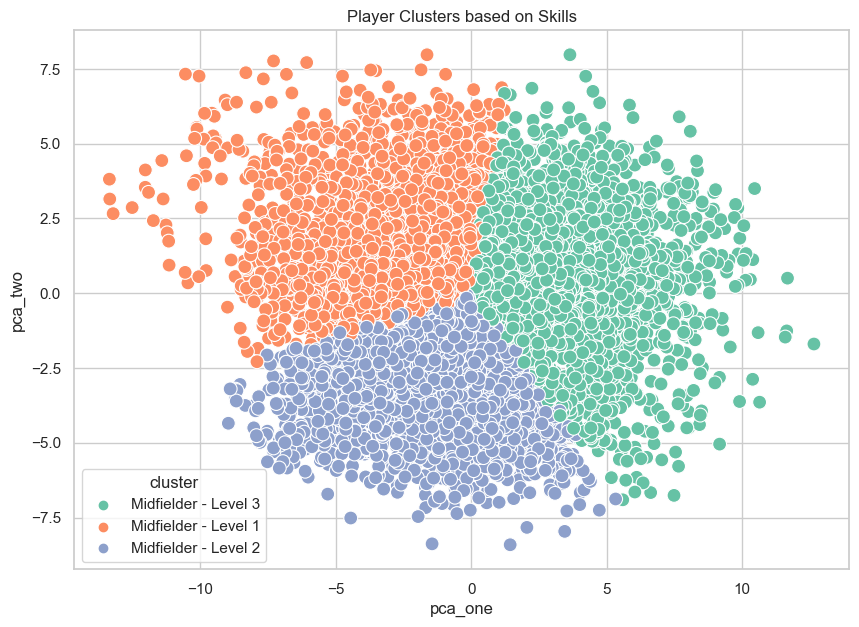

In [83]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_midfield_players_scaled)
midfield_players['pca_one'] = pca_result[:, 0]
midfield_players['pca_two'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=midfield_players, palette='Set2', s=100)
plt.title('Player Clusters based on Skills')
plt.show()

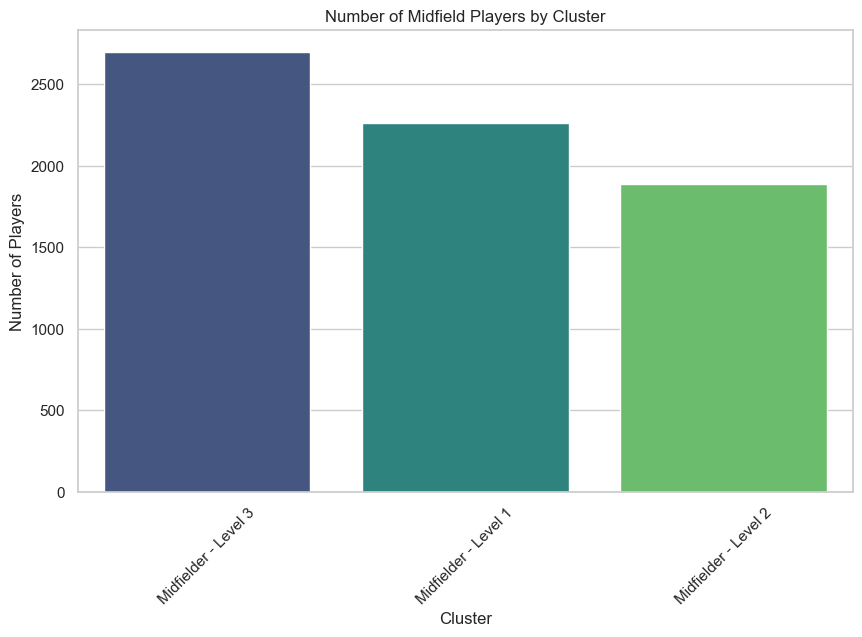

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players in each cluster
cluster_counts = midfield_players['cluster'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.title('Number of Midfield Players by Cluster')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary for readability
plt.show()


## Analysis: with this results, the fifa20 list have more number of midfield players in amateur group (2262) when compared to other groups

## C) Clustering foot ball players based on player skills - defence players

In [85]:
defensive_players = df2[df2['position_group']=='Defender']
defensive_players

age  height_cm  weight_kg    short_name              club  \
5       27        193         92   V. van Dijk         Liverpool   
9       28        187         89  K. Koulibaly            Napoli   
12      34        187         85  G. Chiellini          Juventus   
14      33        184         82  Sergio Ramos       Real Madrid   
23      32        194         85         Piqué      FC Barcelona   
...    ...        ...        ...           ...               ...   
16227   19        182         80     S. Callan   Shamrock Rovers   
16228   18        178         69    F. Nevarez         FC Juárez   
16234   18        183         74  Huang Jiahui  Dalian YiFang FC   
16237   22        186         79    Shao Shuai  Beijing Renhe FC   
16238   22        177         66  Xiao Mingjie  Shanghai SIPG FC   

               nationality player_positions  overall  potential  value_eur  \
5              Netherlands               CB       90         91   78000000   
9                  Senegal               CB       89         91   67500000   
12                   Italy               CB       89         89   24500000   
14                   Spain               CB       89         89   31500000   
23                   Spain               CB       88         88   38000000   
...                    ...              ...      ...        ...        ...   
16227  Republic of Ireland           CB, RB       48         61      50000   
16228               Mexico               RB       48         61      50000   
16234             China PR               CB       48         60      40000   
16237             China PR               CB       48         56      40000   
16238             China PR               CB       48         56      40000   

       ...  right_wing  left_wing  forward  attacking_midfield  midfield  \
5      ...        70.0       70.0     72.0                72.0      77.0   
9      ...        58.0       58.0     60.0                61.0      68.0   
12     ...        58.0       58.0     59.0                59.0      65.0   
14     ...        75.0       75.0     76.0                77.0      81.0   
23     ...        70.0       70.0     72.0                74.0      79.0   
...    ...         ...        ...      ...                 ...       ...   
16227  ...        32.0       32.0     32.0                31.0      33.0   
16228  ...        41.0       41.0     40.0                39.0      38.0   
16234  ...        38.0       38.0     38.0                36.0      36.0   
16237  ...        33.0       33.0     33.0                33.0      35.0   
16238  ...        35.0       35.0     34.0                35.0      38.0   

       wide_midfield  defensive_midfield  full_back  defense  position_group  
5               72.0                86.0       83.0     90.0        Defender  
9               63.0                82.0       78.5     89.0        Defender  
12              60.0                80.0       77.5     89.0        Defender  
14              76.0                87.0       84.0     90.0        Defender  
23              72.0                86.0       80.5     88.0        Defender  
...              ...                 ...        ...      ...             ...  
16227           34.0                42.0       46.0     49.0        Defender  
16228           42.0                43.0       48.5     48.0        Defender  
16234           39.0                42.0       47.0     48.0        Defender  
16237           35.0                44.0       46.0     48.0        Defender  
16238           37.0                45.0       47.0     49.0        Defender  

[4910 rows x 58 columns]

In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select relevant attributes for clustering
skills_attributes = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
                     'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 
                     'attacking_short_passing', 'attacking_volleys', 
                     'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                     'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                     'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                     'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 
                     'mentality_penalties', 'mentality_composure', 
                     'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']

df_defensive_players = defensive_players.dropna(subset = skills_attributes)
df_defensive_players[skills_attributes]

pace  shooting  passing  dribbling  defending  physic  \
5      77.0      60.0     70.0       71.0       90.0    86.0   
9      71.0      28.0     54.0       67.0       89.0    87.0   
12     68.0      46.0     58.0       60.0       90.0    82.0   
14     72.0      68.0     75.0       73.0       87.0    85.0   
23     56.0      61.0     72.0       68.0       88.0    80.0   
...     ...       ...      ...        ...        ...     ...   
16227  56.0      26.0     25.0       30.0       48.0    53.0   
16228  56.0      26.0     29.0       48.0       47.0    50.0   
16234  70.0      29.0     29.0       35.0       46.0    53.0   
16237  57.0      23.0     28.0       33.0       47.0    51.0   
16238  58.0      24.0     33.0       35.0       48.0    48.0   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
5                      53                   52                          86   
9                      30                   22                          83   
12                     54                   33                          83   
14                     66                   63                          92   
23                     57                   65                          85   
...                   ...                  ...                         ...   
16227                  23                   23                          40   
16228                  33                   28                          41   
16234                  28                   30                          46   
16237                  21                   17                          40   
16238                  24                   20                          42   

       attacking_short_passing  ...  power_long_shots  mentality_aggression  \
5                           78  ...                64                    82   
9                           71  ...                15                    87   
12                          65  ...                49                    91   
14                          80  ...                62                    90   
23                          83  ...                51                    76   
...                        ...  ...               ...                   ...   
16227                       27  ...                17                    46   
16228                       26  ...                20                    47   
16234                       31  ...                15                    41   
16237                       35  ...                16                    46   
16238                       43  ...                20                    42   

       mentality_interceptions  mentality_positioning  mentality_vision  \
5                           89                     47                65   
9                           88                     35                52   
12                          88                     28                50   
14                          88                     67                71   
23                          89                     64                72   
...                        ...                    ...               ...   
16227                       50                     22                27   
16228                       52                     38                35   
16234                       49                     30                33   
16237                       48                     28                25   
16238                       49                     23                25   

       mentality_penalties  mentality_composure  defending_marking  \
5                       62                   89                 91   
9                       33                   82                 91   
12                      50                   84                 94   
14                      86                   84                 85   
23                      69                   87                 89   
...                    ...     

In [87]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_defensive_players[skills_attributes])

# Create a DataFrame with scaled data
df_defensive_players_scaled = pd.DataFrame(scaled_data, columns=skills_attributes)
df_defensive_players_scaled

pace  shooting   passing  dribbling  defending    physic  \
0     1.112786  1.979769  1.786163   1.489508   3.494564  2.319486   
1     0.617841 -0.984216  0.257512   1.123820   3.356821  2.454847   
2     0.370368  0.683026  0.639675   0.483866   3.494564  1.778045   
3     0.700332  2.720765  2.263866   1.672352   3.081333  2.184126   
4    -0.619521  2.072393  1.977244   1.215242   3.219077  1.507324   
...        ...       ...       ...        ...        ...       ...   
4905 -0.619521 -1.169465 -2.513167  -2.258794  -2.290668 -2.147405   
4906 -0.619521 -1.169465 -2.131004  -0.613198  -2.428412 -2.553486   
4907  0.535350 -0.891591 -2.131004  -1.801684  -2.566155 -2.147405   
4908 -0.537030 -1.447338 -2.226545  -1.984528  -2.428412 -2.418126   
4909 -0.454539 -1.354714 -1.748842  -1.801684  -2.290668 -2.824207   

      attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0               0.212935             1.626977                    2.427894   
1              -1.207177            -1.028260                    2.129888   
2               0.274679            -0.054673                    2.129888   
3               1.015607             2.600564                    3.023907   
4               0.459911             2.777579                    2.328559   
...                  ...                  ...                         ...   
4905           -1.639385            -0.939752                   -2.141541   
4906           -1.021945            -0.497212                   -2.042205   
4907           -1.330665            -0.320197                   -1.545527   
4908           -1.762873            -1.470799                   -2.141541   
4909           -1.577641            -1.205276                   -1.942870   

      attacking_short_passing  ...  power_long_shots  mentality_aggression  \
0                    1.881459  ...          1.840178              1.581973   
1                    1.198935  ...         -1.555969              2.060520   
2                    0.613914  ...          0.800542              2.443357   
3                    2.076466  ...          1.701560              2.347648   
4                    2.368976  ...          0.939160              1.007717   
...                       ...  ...               ...                   ...   
4905                -3.091217  ...         -1.417350             -1.863565   
4906                -3.188720  ...         -1.209423             -1.767856   
4907                -2.701203  ...         -1.555969             -2.342112   
4908                -2.311189  ...         -1.486660             -1.863565   
4909                -1.531161  ...         -1.209423             -2.246403   

      mentality_interceptions  mentality_positioning  mentality_vision  \
0                    3.147989               0.327604          1.696114   
1                    3.023047              -0.512435          0.605193   
2                    3.023047              -1.002458          0.437359   
3                    3.023047               1.727670          2.199615   
4                    3.147989               1.517660          2.283532   
...                       ...                    ...               ...   
4905                -1.724725              -1.422478         -1.492730   
4906                -1.474843              -0.302426         -0.821395   
4907                -1.849667              -0.862452         -0.989229   
4908                -1.974608              -1.002458         -1.660564   
4909                -1.849667              -1.352475         -1.660564   

      mentality_penalties  mentality_composure  defending_marking  \
0                1.949596             3.030373           3.302864   
1               -0.950015             2.343356           3.302864   
2                0.749757             2.539646           3.667782   
3                4.349275             2.539646           2.573029   
4                2.649503             2.834082           3.059586   
... 

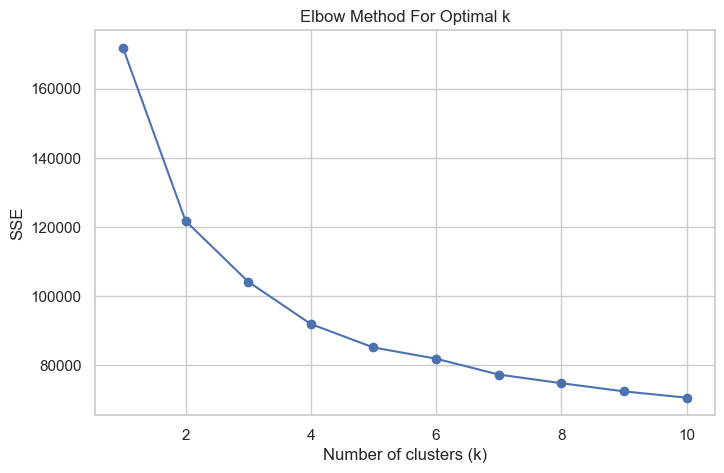

short_name  cluster
5       V. van Dijk        2
9      K. Koulibaly        0
12     G. Chiellini        0
14     Sergio Ramos        2
23            Piqué        2
...             ...      ...
16227     S. Callan        1
16228    F. Nevarez        1
16234  Huang Jiahui        1
16237    Shao Shuai        1
16238  Xiao Mingjie        1

[4910 rows x 2 columns]

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_defensive_players_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

# Choose the number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
defensive_players['cluster'] = kmeans.fit_predict(df_defensive_players_scaled)

defensive_players[['short_name', 'cluster']]

In [89]:
defensive_players['cluster'].value_counts()

1    1699
2    1677
0    1534
Name: cluster, dtype: int64

In [90]:
# mapping 
cluster_rename_map = {
    0: 'Defender - Level 1',
    1: 'Defender - Level 2',
    2: 'Defender - Level 3'
}

# Apply the mapping
defensive_players['cluster'] = defensive_players['cluster'].replace(cluster_rename_map)

print(defensive_players['cluster'].value_counts())

Defender - Level 2    1699
Defender - Level 3    1677
Defender - Level 1    1534
Name: cluster, dtype: int64


In [91]:
# Show the players grouped by cluster
for cluster_label, cluster_data in defensive_players.groupby('cluster'):
    print(f"Cluster {cluster_label}:")
    display(cluster_data)
    print("\n") 

Cluster Defender - Level 1:


age  height_cm  weight_kg    short_name               club  \
9       28        187         89  K. Koulibaly             Napoli   
12      34        187         85  G. Chiellini           Juventus   
26      33        187         78      D. Godín              Inter   
47      24        187         80   M. Škriniar              Inter   
65      23        195         97       N. Süle  FC Bayern München   
...    ...        ...        ...           ...                ...   
12955   25        188         81      L. López          FC Juárez   
13104   35        184         83     D. Flinta       Silkeborg IF   
13108   33        180         70    J. O'Brien    Shamrock Rovers   
14647   34        177         75     D. Pender        Bohemian FC   
15504   35        185         86       N. Hunt    Crewe Alexandra   

               nationality player_positions  overall  potential  value_eur  \
9                  Senegal               CB       89         91   67500000   
12                   Italy               CB       89         89   24500000   
26                 Uruguay               CB       88         88   28000000   
47                Slovakia               CB       86         90   52000000   
65                 Germany               CB       85         90   46500000   
...                    ...              ...      ...        ...        ...   
12955               Mexico               CB       61         67     300000   
13104              Denmark               CB       61         61      80000   
13108  Republic of Ireland       RB, CB, LB       61         61     110000   
14647  Republic of Ireland           RB, LB       58         58      40000   
15504              England       RB, CB, LB       55         55      20000   

       ...  left_wing  forward  attacking_midfield  midfield  wide_midfield  \
9      ...       58.0     60.0                61.0      68.0           63.0   
12     ...       58.0     59.0                59.0      65.0           60.0   
26     ...       62.0     63.0                64.0      70.0           64.0   
47     ...       60.0     61.0                62.0      68.0           64.0   
65     ...       52.0     55.0                56.0      64.0           56.0   
...    ...        ...      ...                 ...       ...            ...   
12955  ...       46.0     46.0                47.0      52.0           48.0   
13104  ...       49.0     51.0                52.0      55.0           51.0   
13108  ...       56.0     56.0                57.0      60.0           58.0   
14647  ...       56.0     56.0                57.0      59.0           57.0   
15504  ...       49.0     49.0                49.0      52.0           51.0   

       defensive_midfield  full_back  defense  position_group  \
9                    82.0       78.5     89.0        Defender   
12                   80.0       77.5     89.0        Defender   
26                   83.0       78.5     89.0        Defender   
47                   81.0       77.0     86.0        Defender   
65                   79.0       75.0     85.0        Defender   
...                   ...        ...      ...             ...   
12955                60.0       55.5     61.0        Defender   
13104                60.0       54.5     61.0        Defender   
13108                64.0       61.0     65.0        Defender   
14647                61.0       59.0     62.0        Defender   
15504                57.0       55.5     60.0        Defender   

                  cluster  
9      Defender - Level 1  
12     Defender - Level 1  
26     Defender - Level 1  
47     Defender - Level 1  
65     Defender - Level 1  
...                   ...  
12955  Defender - Level 1  
13104  Defender - Level 1  
13108  Defender - Level 1  
14647  Defender - Level 1  
15504  Defender - Level 1  

[1534 rows x 59 columns]



Cluster Defender - Level 2:


age  height_cm  weight_kg     short_name                    club  \
5379    24        176         66      L. Venuti              Fiorentina   
5407    25        175         65        G. Soto            CD Palestino   
6107    23        185         78  E. Capradossi                  Spezia   
6422    27        187         73  Kim Min Hyeok  Jeonbuk Hyundai Motors   
6555    27        182         75   R. Radunović           Astra Giurgiu   
...    ...        ...        ...            ...                     ...   
16227   19        182         80      S. Callan         Shamrock Rovers   
16228   18        178         69     F. Nevarez               FC Juárez   
16234   18        183         74   Huang Jiahui        Dalian YiFang FC   
16237   22        186         79     Shao Shuai        Beijing Renhe FC   
16238   22        177         66   Xiao Mingjie        Shanghai SIPG FC   

               nationality player_positions  overall  potential  value_eur  \
5379                 Italy           RB, LB       69         74    1200000   
5407                 Chile           RB, CB       69         74    1200000   
6107                 Italy               CB       68         77    1300000   
6422        Korea Republic               CB       68         71     975000   
6555            Montenegro               LB       68         69     900000   
...                    ...              ...      ...        ...        ...   
16227  Republic of Ireland           CB, RB       48         61      50000   
16228               Mexico               RB       48         61      50000   
16234             China PR               CB       48         60      40000   
16237             China PR               CB       48         56      40000   
16238             China PR               CB       48         56      40000   

       ...  left_wing  forward  attacking_midfield  midfield  wide_midfield  \
5379   ...       56.0     51.0                52.0      55.0           59.0   
5407   ...       59.0     56.0                57.0      61.0           63.0   
6107   ...       37.0     37.0                37.0      43.0           39.0   
6422   ...       43.0     44.0                42.0      45.0           45.0   
6555   ...       54.0     50.0                49.0      50.0           55.0   
...    ...        ...      ...                 ...       ...            ...   
16227  ...       32.0     32.0                31.0      33.0           34.0   
16228  ...       41.0     40.0                39.0      38.0           42.0   
16234  ...       38.0     38.0                36.0      36.0           39.0   
16237  ...       33.0     33.0                33.0      35.0           35.0   
16238  ...       35.0     34.0                35.0      38.0           37.0   

       defensive_midfield  full_back  defense  position_group  \
5379                 64.0       70.0     65.0        Defender   
5407                 65.0       69.0     65.0        Defender   
6107                 60.0       59.0     68.0        Defender   
6422                 59.0       60.0     69.0        Defender   
6555                 60.0       67.5     67.0        Defender   
...                   ...        ...      ...             ...   
16227                42.0       46.0     49.0        Defender   
16228                43.0       48.5     48.0        Defender   
16234                42.0       47.0     48.0        Defender   
16237                44.0       46.0     48.0        Defender   
16238                45.0       47.0     49.0        Defender   

                  cluster  
5379   Defender - Level 2  
5407   Defender - Level 2  
6107   Defender - Level 2  
6422   Defender - Level 2  
6555   Defender - Level 2  
...                   ...  
16227  Defender - Level 2  
16228  Defender - Level 2  
16234  Defender - Level 2  
16237  Defender - Level 2  
16238  Defender - Level 2  

[1699 rows x 59 columns]



Cluster Defender - Level 3:


age  height_cm  weight_kg     short_name                 club  \
5       27        193         92    V. van Dijk            Liverpool   
14      33        184         82   Sergio Ramos          Real Madrid   
23      32        194         85          Piqué         FC Barcelona   
31      25        189         85     A. Laporte      Manchester City   
36      34        183         82   Thiago Silva  Paris Saint-Germain   
...    ...        ...        ...            ...                  ...   
13738   28        181         75    A. Blackman      Southend United   
14224   33        180         70   Tan Wangsong      Tianjin TEDA FC   
14560   24        186         75     K. Wallace        Burton Albion   
14656   27        179         66  Lee Kwang Jin         Gyeongnam FC   
14662   29        182         75     Du Wenyang     Beijing Renhe FC   

          nationality player_positions  overall  potential  value_eur  ...  \
5         Netherlands               CB       90         91   78000000  ...   
14              Spain               CB       89         89   31500000  ...   
23              Spain               CB       88         88   38000000  ...   
31             France           CB, LB       87         90   56500000  ...   
36             Brazil               CB       87         87   18500000  ...   
...               ...              ...      ...        ...        ...  ...   
13738         England               LB       60         60     180000  ...   
14224        China PR           RB, LB       59         59      70000  ...   
14560         England           LB, CB       58         65     160000  ...   
14656  Korea Republic           RB, CB       58         58     110000  ...   
14662        China PR               RB       58         58     100000  ...   

       left_wing  forward  attacking_midfield  midfield  wide_midfield  \
5           70.0     72.0                72.0      77.0           72.0   
14          75.0     76.0                77.0      81.0           76.0   
23          70.0     72.0                74.0      79.0           72.0   
31          66.0     68.0                69.0      76.0           69.0   
36          69.0     70.0                72.0      78.0           71.0   
...          ...      ...                 ...       ...            ...   
13738       58.0     57.0                57.0      57.0           59.0   
14224       56.0     56.0                57.0      59.0           57.0   
14560       58.0     57.0                58.0      57.0           58.0   
14656       62.0     61.0                61.0      58.0           62.0   
14662       59.0     57.0                58.0      58.0           59.0   

       defensive_midfield  full_back  defense  position_group  \
5                    86.0       83.0     90.0        Defender   
14                   87.0       84.0     90.0        Defender   
23                   86.0       80.5     88.0        Defender   
31                   84.0       81.0     87.0        Defender   
36                   85.0       80.5     87.0        Defender   
...                   ...        ...      ...             ...   
13738                60.0       61.0     61.0        Defender   
14224                62.0       59.0     63.0        Defender   
14560                58.0       58.5     58.0        Defender   
14656                56.0       59.0     55.0        Defender   
14662                58.0       59.0     57.0        Defender   

                  cluster  
5      Defender - Level 3  
14     Defender - Level 3  
23     Defender - Level 3  
31     Defender - Level 3  
36     Defender - Level 3  
...                   ...  
13738  Defender - Level 3  
14224  Defender - Level 3  
14560  Defender - Level 3  
14656  Defender - Level 3  
14662  Defender - Level 3  

[1677 rows x 59 columns]

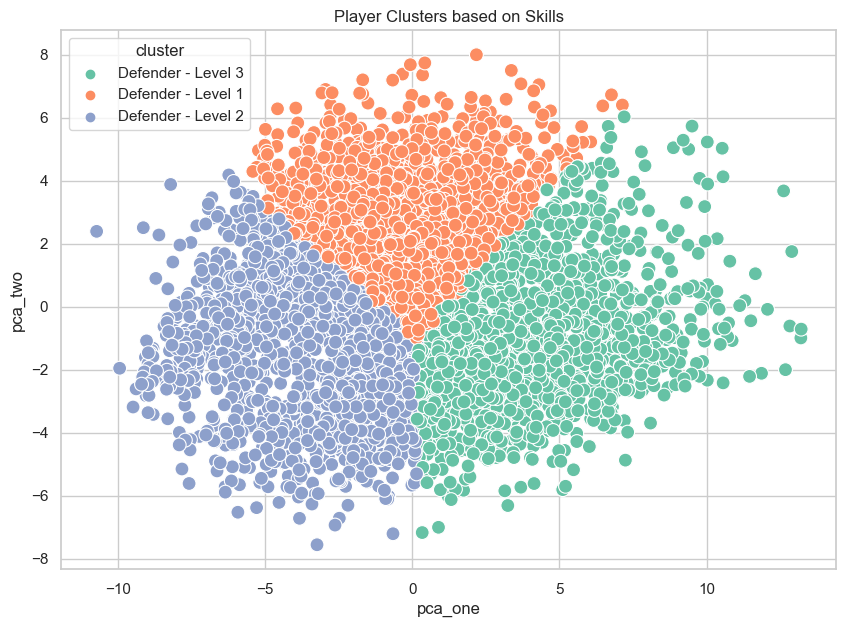

In [93]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_defensive_players_scaled)
defensive_players['pca_one'] = pca_result[:, 0]
defensive_players['pca_two'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=defensive_players, palette='Set2', s=100)
plt.title('Player Clusters based on Skills')
plt.show()

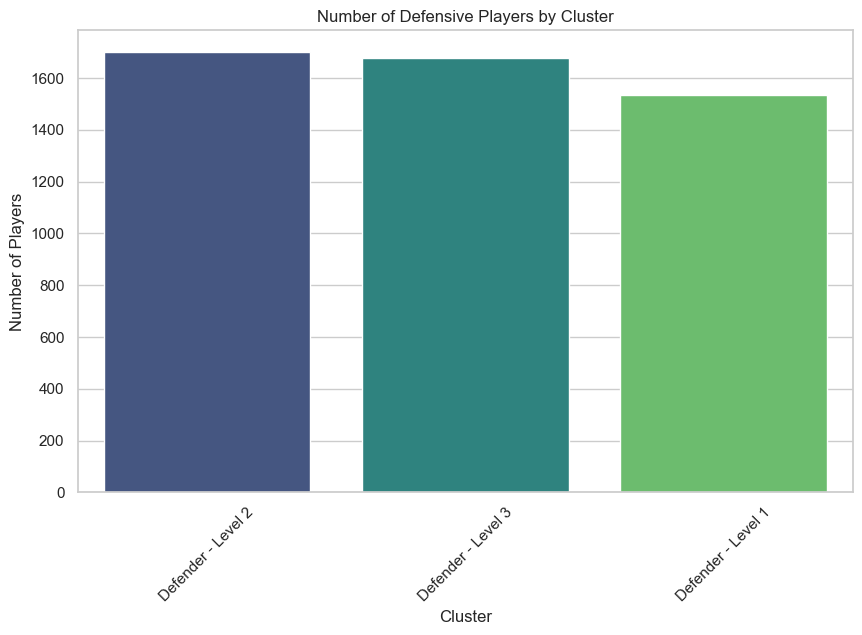

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players in each cluster
cluster_counts = defensive_players['cluster'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.title('Number of Defensive Players by Cluster')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary for readability
plt.show()

## Analysis: When it comes to Defensive players Elite group players are less in number (1534) when compared to other group of players

## D) Clustering foot ball players based on player skills - gk players

In [94]:
goalkeepers = pd.read_csv("update_fifa20_gk.csv")
goalkeepers

Unnamed: 0  age  height_cm  weight_kg          short_name  \
0              3   26        188         87            J. Oblak   
1              6   27        187         85       M. ter Stegen   
2             13   26        191         91             Alisson   
3             14   28        192         82              De Gea   
4             25   25        188         86             Ederson   
...          ...  ...        ...        ...                 ...   
2031       18231   25        188         81         P. Królczyk   
2032       18239   17        185         65          V. Storsve   
2033       18251   19        182         78  G. Sykes-Kenworthy   
2034       18259   17        185         71          H. Sveijer   
2035       18272   20        188         84           P. Martin   

                   club          nationality player_positions  overall  \
0       Atlético Madrid             Slovenia               GK       91   
1          FC Barcelona              Germany               GK       90   
2             Liverpool               Brazil               GK       89   
3     Manchester United                Spain               GK       89   
4       Manchester City               Brazil               GK       88   
...                 ...                  ...              ...      ...   
2031      Piast Gliwice               Poland               GK       49   
2032      Lillestrøm SK               Norway               GK       48   
2033      Bradford City              England               GK       48   
2034          IK Sirius               Sweden               GK       48   
2035       Waterford FC  Republic of Ireland               GK       48   

      potential  value_eur  wage_eur  goalkeeping_diving  \
0            93   77500000    125000                  87   
1            93   67500000    250000                  88   
2            91   58000000    155000                  85   
3            90   56000000    205000                  90   
4            91   54500000    185000                  86   
...         ...        ...       ...                 ...   
2031         54      30000      1000                  53   
2032         70      50000      1000                  50   
2033         65      50000      1000                  44   
2034         63      50000      1000                  50   
2035         58      40000      1000                  54   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0                       92                   78                       90   
1                       85                   88                       88   
2                       84                   85                       90   
3                       84                   81                       85   
4                       82                   93                       86   
...                    ...                  ...                      ...   
2031                    47                   55                       48   
2032                    50                   48                       49   
2033                    46                   45                       48   
2034                    49                   48                       47   
2035                    51                   46                       43   

      goalkeeping_reflexes  
0                       89  
1                       90  
2                       89  
3                       92  
4                       88  
...                    ...  
2031                    53  
2032                    51  
2033                    51  
2034                    51  
2035                    45  

[2036 rows x 17 columns]

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select relevant attributes for clustering
skills_attributes = ['goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes']

df_goalkeeper_players = goalkeepers.dropna(subset = skills_attributes)
df_goalkeeper_players[skills_attributes]

goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                     87                    92                   78   
1                     88                    85                   88   
2                     85                    84                   85   
3                     90                    84                   81   
4                     86                    82                   93   
...                  ...                   ...                  ...   
2031                  53                    47                   55   
2032                  50                    50                   48   
2033                  44                    46                   45   
2034                  50                    49                   48   
2035                  54                    51                   46   

      goalkeeping_positioning  goalkeeping_reflexes  
0                          90                    89  
1                          88                    90  
2                          90                    89  
3                          85                    92  
4                          86                    88  
...                       ...                   ...  
2031                       48                    53  
2032                       49                    51  
2033                       48                    51  
2034                       47                    51  
2035                       43                    45  

[2036 rows x 5 columns]

In [96]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_goalkeeper_players[skills_attributes])

df_goalkeeper_players_scaled = pd.DataFrame(scaled_data, columns=skills_attributes)
df_goalkeeper_players_scaled

goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0               2.789831              3.984074             2.153120   
1               2.919123              3.017523             3.484879   
2               2.531245              2.879444             3.085351   
3               3.177709              2.879444             2.552648   
4               2.660538              2.603287             4.150759   
...                  ...                   ...                  ...   
2031           -1.606128             -2.229470            -0.909926   
2032           -1.994006             -1.815234            -1.842158   
2033           -2.769763             -2.367549            -2.241686   
2034           -1.994006             -1.953313            -1.842158   
2035           -1.476835             -1.677155            -2.108510   

      goalkeeping_positioning  goalkeeping_reflexes  
0                    3.152483              2.773474  
1                    2.915679              2.896143  
2                    3.152483              2.773474  
3                    2.560473              3.141479  
4                    2.678875              2.650806  
...                       ...                   ...  
2031                -1.820402             -1.642588  
2032                -1.702000             -1.887924  
2033                -1.820402             -1.887924  
2034                -1.938804             -1.887924  
2035                -2.412412             -2.623935  

[2036 rows x 5 columns]

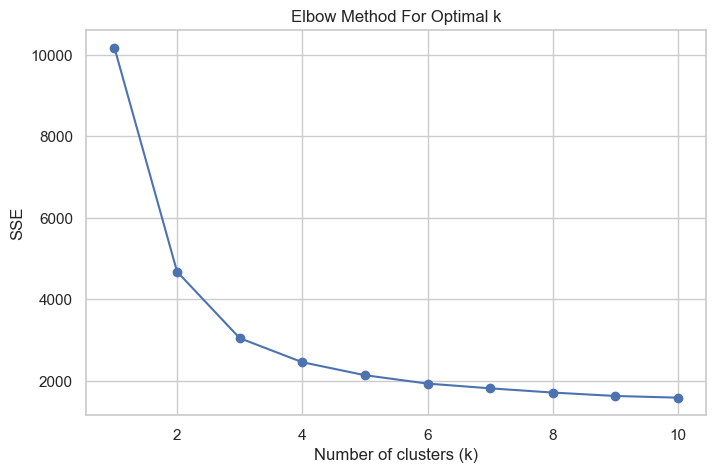

short_name  cluster
0               J. Oblak        2
1          M. ter Stegen        2
2                Alisson        2
3                 De Gea        2
4                Ederson        2
...                  ...      ...
2031         P. Królczyk        1
2032          V. Storsve        1
2033  G. Sykes-Kenworthy        1
2034          H. Sveijer        1
2035           P. Martin        1

[2036 rows x 2 columns]

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_goalkeeper_players_scaled)
    sse.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

# Choose the number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
goalkeepers['cluster'] = kmeans.fit_predict(df_goalkeeper_players_scaled)

# View the clusters assigned to each player
goalkeepers[['short_name', 'cluster']]

In [98]:
goalkeepers['cluster'].value_counts()

0    967
1    602
2    467
Name: cluster, dtype: int64

In [99]:
# Sample mapping of clusters to new names
cluster_rename_map = {
    0: 'Goal keeper - Level 1',
    1: 'Goal keeper - Level 2',
    2: 'Goal keeper - Level 3'
}

# Apply the mapping to rename clusters
goalkeepers['cluster'] = goalkeepers['cluster'].replace(cluster_rename_map)

# Now check the value counts of the renamed clusters
print(goalkeepers['cluster'].value_counts())

Goal keeper - Level 1    967
Goal keeper - Level 2    602
Goal keeper - Level 3    467
Name: cluster, dtype: int64


In [100]:
# Show the players grouped by cluster
for cluster_label, cluster_data in goalkeepers.groupby('cluster'):
    print(f"Cluster {cluster_label}:")
    display(cluster_data)
    print("\n")  # Add a newline for better readability

Cluster Goal keeper - Level 1:


Unnamed: 0  age  height_cm  weight_kg    short_name             club  \
327         3450   24        195         83    E. Horvath   Club Brugge KV   
362         3769   30        193         84   M. Langerak   Nagoya Grampus   
377         4123   23        183         75    David Raya        Brentford   
379         4145   25        191         91     Rui Silva       Granada CF   
382         4189   26        185         83    J. Ledesma  Rosario Central   
...          ...  ...        ...        ...           ...              ...   
1529       15295   33        184         75      K. Tanno     Cerezo Osaka   
1544       15495   20        187         78      B. Scott       1. FC Köln   
1554       15563   23        190         80      S. Mbaye  Kristiansund BK   
1588       15789   28        190         83  I. Levchenko   AFC Eskilstuna   
1590       15791   29        185         75     M. Ivanov   AFC Eskilstuna   

        nationality player_positions  overall  potential  value_eur  wage_eur  \
327   United States               GK       72         77    3100000     10000   
362       Australia               GK       72         72    2100000      5000   
377           Spain               GK       71         78    2500000     16000   
379        Portugal               GK       71         77    2400000      9000   
382       Argentina               GK       71         76    2300000      8000   
...             ...              ...      ...        ...        ...       ...   
1529          Japan               GK       60         60     110000      1000   
1544  United States               GK       59         71     230000      2000   
1554        Senegal               GK       59         69     200000      1000   
1588        Ukraine               GK       59         61     140000      1000   
1590       Bulgaria               GK       59         60     130000      1000   

      goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
327                   79                    67                   57   
362                   73                    71                   52   
377                   71                    72                   63   
379                   73                    65                   63   
382                   71                    67                   64   
...                  ...                   ...                  ...   
1529                  63                    67                   58   
1544                  64                    59                   60   
1554                  61                    58                   66   
1588                  62                    59                   61   
1590                  61                    62                   65   

      goalkeeping_positioning  goalkeeping_reflexes                cluster  
327                        62                    77  Goal keeper - Level 1  
362                        68                    76  Goal keeper - Level 1  
377                        67                    71  Goal keeper - Level 1  
379                        69                    75  Goal keeper - Level 1  
382                        70                    74  Goal keeper - Level 1  
...                       ...                   ...                    ...  
1529                       56                    58  Goal keeper - Level 1  
1544                       59                    59  Goal keeper - Level 1  
1554                       57                    61  Goal keeper - Level 1  
1588                       61                    60  Goal keeper - Level 1  
1590                       60                    59  Goal keeper - Level 1  

[967 rows x 18 columns]



Cluster Goal keeper - Level 2:


Unnamed: 0  age  height_cm  weight_kg          short_name  \
1232       12877   37        189         85        M. Ratajczak   
1257       13067   35        187         80      Sander Asevedo   
1274       13256   20        196         85             M. Woud   
1291       13450   23        186         79         A. D'Egidio   
1301       13541   25        188         84            M. Reule   
...          ...  ...        ...        ...                 ...   
2031       18231   25        188         81         P. Królczyk   
2032       18239   17        185         65          V. Storsve   
2033       18251   19        182         78  G. Sykes-Kenworthy   
2034       18259   17        185         71          H. Sveijer   
2035       18272   20        188         84           P. Martin   

                         club          nationality player_positions  overall  \
1232          SC Paderborn 07              Germany               GK       63   
1257                Fortaleza               Brazil               GK       63   
1274                Willem II          New Zealand               GK       62   
1291                     Pisa                Italy               GK       62   
1301  SG Sonnenhof Großaspach              Germany               GK       62   
...                       ...                  ...              ...      ...   
2031            Piast Gliwice               Poland               GK       49   
2032            Lillestrøm SK               Norway               GK       48   
2033            Bradford City              England               GK       48   
2034                IK Sirius               Sweden               GK       48   
2035             Waterford FC  Republic of Ireland               GK       48   

      potential  value_eur  wage_eur  goalkeeping_diving  \
1232         63      40000      2000                  62   
1257         63     100000      1000                  68   
1274         74     450000      1000                  62   
1291         70     350000      1000                  62   
1301         68     300000      1000                  64   
...         ...        ...       ...                 ...   
2031         54      30000      1000                  53   
2032         70      50000      1000                  50   
2033         65      50000      1000                  44   
2034         63      50000      1000                  50   
2035         58      40000      1000                  54   

      goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
1232                    64                   35                       64   
1257                    59                   47                       60   
1274                    55                   57                       59   
1291                    60                   50                       62   
1301                    60                   54                       55   
...                    ...                  ...                      ...   
2031                    47                   55                       48   
2032                    50                   48                       49   
2033                    46                   45                       48   
2034                    49                   48                       47   
2035                    51                   46                       43   

      goalkeeping_reflexes                cluster  
1232                    64  Goal keeper - Level 2  
1257                    58  Goal keeper - Level 2  
1274                    65  Goal keeper - Level 2  
1291                    64  Goal keeper - Level 2  
1301                    64  Goal keeper - Level 2  
...                    ...                    ...  
2031                    53  Goal keeper - Level 2  
2032                    51  Goal keeper - Level 2  
2033                    51  Goal keeper - Level 2  
2034                    51  Goal keeper - Level 2  
2035                    45  Goal k



Cluster Goal keeper - Level 3:


Unnamed: 0  age  height_cm  weight_kg        short_name  \
0             3   26        188         87          J. Oblak   
1             6   27        187         85     M. ter Stegen   
2            13   26        191         91           Alisson   
3            14   28        192         82            De Gea   
4            25   25        188         86           Ederson   
..          ...  ...        ...        ...               ...   
547        5945   25        185         80           J. Huth   
569        6235   40        181         78         J. Gillet   
596        6517   37        185         85         N. Ibáñez   
602        6566   35        181         75  Luciano Cacheira   
604        6575   31        193         84  Ailton Cardenhas   

                  club nationality player_positions  overall  potential  \
0      Atlético Madrid    Slovenia               GK       91         93   
1         FC Barcelona     Germany               GK       90         93   
2            Liverpool      Brazil               GK       89         91   
3    Manchester United       Spain               GK       89         90   
4      Manchester City      Brazil               GK       88         91   
..                 ...         ...              ...      ...        ...   
547    SC Paderborn 07     Germany               GK       69         74   
569  Standard de Liège     Belgium               GK       69         69   
596  Newell's Old Boys   Argentina               GK       69         69   
602          Fortaleza      Brazil               GK       69         69   
604             Santos      Brazil               GK       69         69   

     value_eur  wage_eur  goalkeeping_diving  goalkeeping_handling  \
0     77500000    125000                  87                    92   
1     67500000    250000                  88                    85   
2     58000000    155000                  85                    84   
3     56000000    205000                  90                    84   
4     54500000    185000                  86                    82   
..         ...       ...                 ...                   ...   
547    1000000      8000                  70                    65   
569     110000      3000                  65                    72   
596     110000      4000                  74                    65   
602     280000      3000                  76                    62   
604     675000     12000                  68                    70   

     goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                     78                       90                    89   
1                     88                       88                    90   
2                     85                       90                    89   
3                     81                       85                    92   
4                     93                       86                    88   
..                   ...                      ...                   ...   
547                   74                       66                    72   
569                   69                       75                    67   
596                   75                       68                    71   
602                   77                       55                    76   
604                   70                       76                    69   

                   cluster  
0    Goal keeper - Level 3  
1    Goal keeper - Level 3  
2    Goal keeper - Level 3  
3    Goal keeper - Level 3  
4    Goal keeper - Level 3  
..                     ...  
547  Goal keeper - Level 3  
569  Goal keeper - Level 3  
596  Goal keeper - Level 3  
602  Goal keeper - Level 3  
604  Goal keeper - Level 3  

[467 rows x 18 columns]

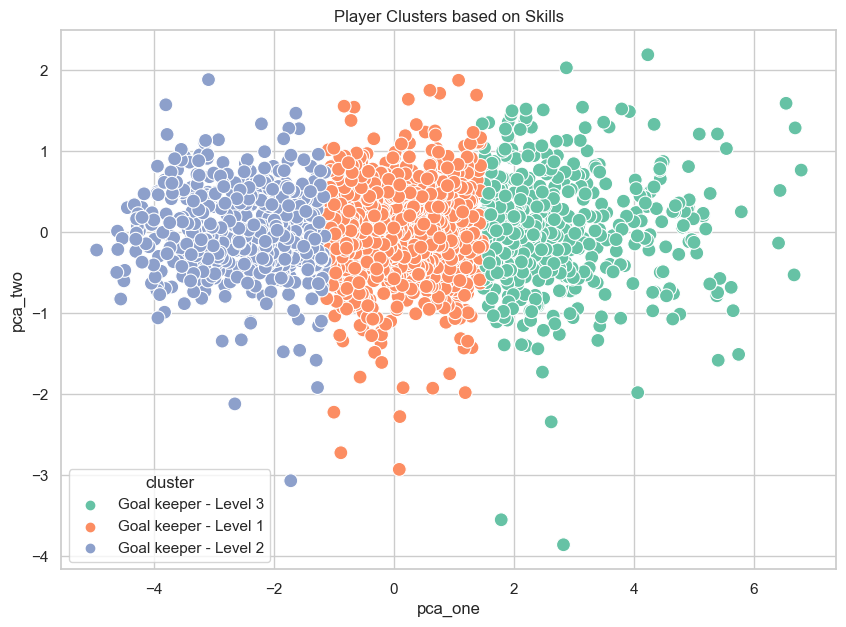

In [102]:
from sklearn.decomposition import PCA
import seaborn as sns

# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_goalkeeper_players_scaled)
goalkeepers['pca_one'] = pca_result[:, 0]
goalkeepers['pca_two'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca_one', y='pca_two', hue='cluster', data=goalkeepers, palette='Set2', s=100)
plt.title('Player Clusters based on Skills')
plt.show()

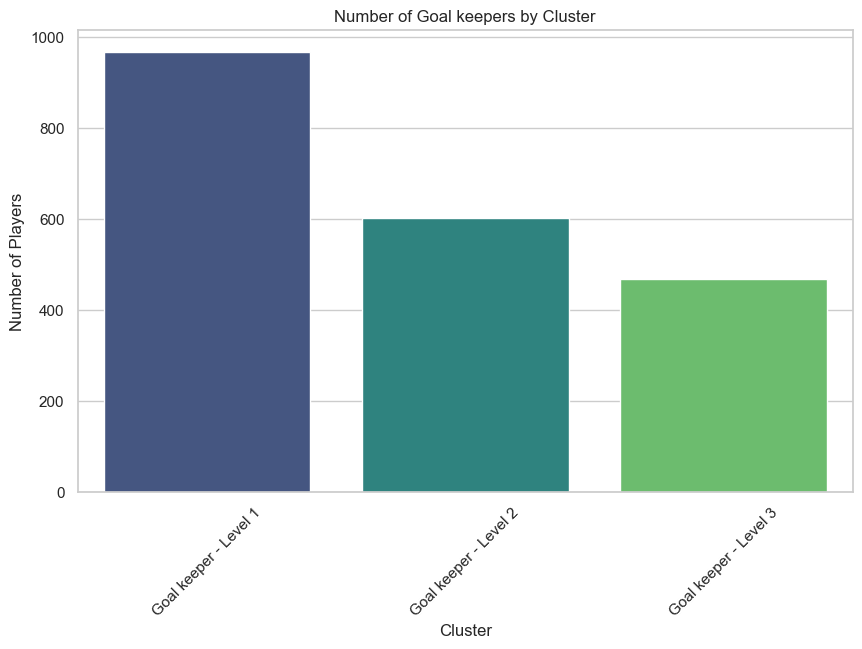

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of players in each cluster
cluster_counts = goalkeepers['cluster'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Cluster')
plt.ylabel('Number of Players')
plt.title('Number of Goal keepers by Cluster')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary for readability
plt.show()

## Analysis: When it comes to Goal Keepers Elite group players are large in numbers (967) when compared to other group of players

## Task 3:

## A) Listing out top 10 countries who producing the most players

In [103]:
df = pd.read_csv("update_fifa20_all_players.csv")
df

Unnamed: 0  age  height_cm  weight_kg         short_name  \
0               0   32        170         72           L. Messi   
1               1   34        187         83  Cristiano Ronaldo   
2               2   27        175         68          Neymar Jr   
3               3   26        188         87           J. Oblak   
4               4   28        175         74          E. Hazard   
...           ...  ...        ...        ...                ...   
18273       18273   22        186         79         Shao Shuai   
18274       18274   22        177         66       Xiao Mingjie   
18275       18275   19        186         75          Zhang Wei   
18276       18276   18        185         74       Wang Haijian   
18277       18277   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                    Atlético Madrid    Slovenia               GK       91   
4                        Real Madrid     Belgium           LW, CF       91   
...                              ...         ...              ...      ...   
18273               Beijing Renhe FC    China PR               CB       48   
18274               Shanghai SIPG FC    China PR               CB       48   
18275         Hebei China Fortune FC    China PR               CM       48   
18276  Shanghai Greenland Shenhua FC    China PR               CM       48   
18277         Hebei China Fortune FC    China PR               CM       48   

       potential  ...  striker  right_wing  left_wing  forward  \
0             94  ...     91.0        95.0       95.0     95.0   
1             93  ...     94.0        92.0       92.0     93.0   
2             92  ...     87.0        93.0       93.0     92.0   
3             93  ...      NaN         NaN        NaN      NaN   
4             91  ...     86.0        92.0       92.0     91.0   
...          ...  ...      ...         ...        ...      ...   
18273         56  ...     34.0        33.0       33.0     33.0   
18274         56  ...     35.0        35.0       35.0     34.0   
18275         56  ...     45.0        45.0       45.0     45.0   
18276         54  ...     45.0        47.0       47.0     46.0   
18277         51  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                     NaN       NaN            NaN                 NaN   
4                    92.0      86.0           92.0                66.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3            NaN      NaN  
4           66.5     52.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[18278 rows x 63 columns]

In [104]:
top_countries = df.groupby('nationality').size().sort_values(ascending=False).head(10)
top_countries

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
dtype: int64

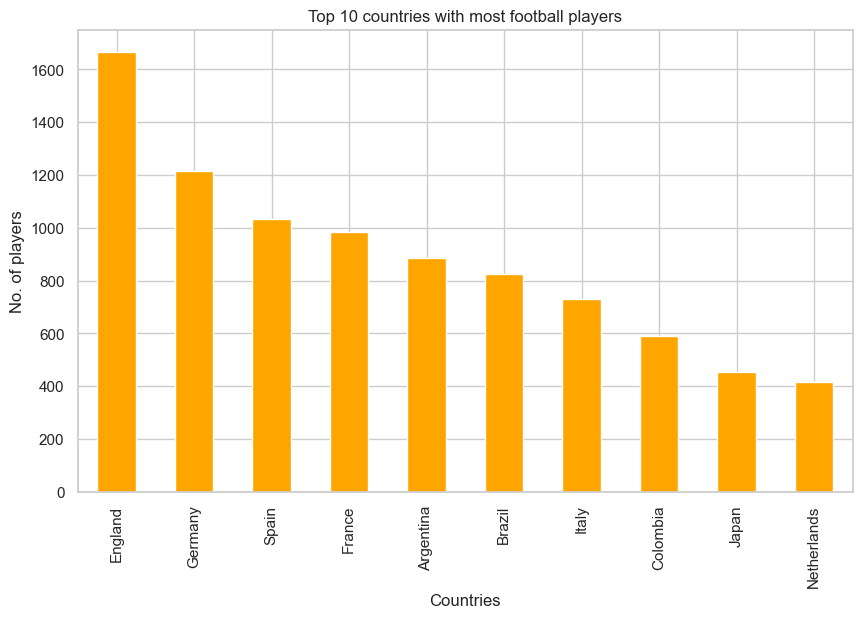

In [105]:
top_countries.plot(kind = 'bar', figsize=(10,6), color='orange')

plt.title("Top 10 countries with most football players")
plt.xlabel('Countries')
plt.ylabel('No. of players')
plt.show()

## Analysis : England produces more than 1600 players which is highest, whereas netherland produces around 400 which is least

## B) Distribution of overall rating vs players age

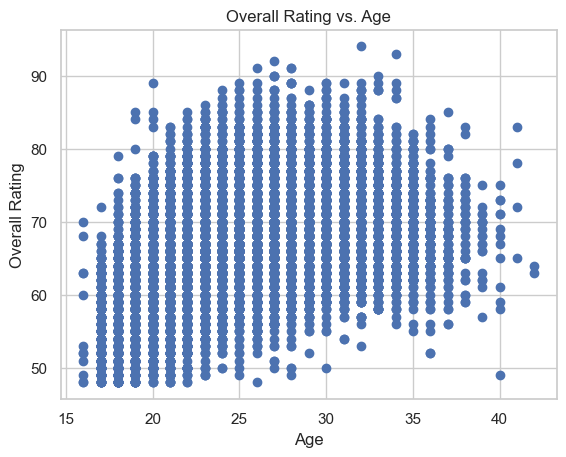

In [106]:
plt.scatter(df['age'], df['overall'])
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Overall Rating vs. Age')
plt.show()


## Analysis : After the age of 35, the overall rating tends to decrease, the players does not improve much after 35 years

## C) Fetching out which type of Forward players paid the most

In [107]:
df2['player_positions'].value_counts()

CB              2322
ST              1809
CM               786
CDM, CM          731
CM, CDM          682
                ... 
LM, LWB, CM        1
CAM, CDM, CB       1
RM, LB             1
LB, CDM, LWB       1
RM, ST, CM         1
Name: player_positions, Length: 642, dtype: int64

In [108]:
# Define a mapping of positions 
position_map = {
    'ST': 'Striker',
    'RW': 'Right_wing',
    'LW': 'Left_wing'
}

def map_positions_to_group(positions):
    # splitting the positions
    pos_list = positions.split(', ')
    
    # Map each position 
    mapped_positions = set([position_map.get(pos, 'Other') for pos in pos_list])
    
    if 'Striker' in mapped_positions:
        return 'Striker'
    elif 'Right_wing' in mapped_positions:
        return 'Right_wing'
    elif 'Left_wing' in mapped_positions:
        return 'Left_wing'
    else:
        return 'Other'

# Apply the mapping function 
df2['scorers'] = df2['player_positions'].apply(map_positions_to_group)

# result
print(df2[['short_name', 'player_positions', 'scorers']])

              short_name player_positions    scorers
0               L. Messi       RW, CF, ST    Striker
1      Cristiano Ronaldo           ST, LW    Striker
2              Neymar Jr          LW, CAM  Left_wing
3              E. Hazard           LW, CF  Left_wing
4           K. De Bruyne          CAM, CM      Other
...                  ...              ...        ...
16237         Shao Shuai               CB      Other
16238       Xiao Mingjie               CB      Other
16239          Zhang Wei               CM      Other
16240       Wang Haijian               CM      Other
16241         Pan Ximing               CM      Other

[16242 rows x 3 columns]


## Analysis: Based on the above condition, group of Forward players are again groupped into 3 category Striker, Left_wing and Right_wing

In [109]:
# Filter the DataFrame to keep only rows where 'scorers' is Striker, Right_wing, or Left_wing
offensive_players = df2[df2['scorers'].isin(['Striker', 'Right_wing', 'Left_wing'])]

# calculate the maximum wage for each position
avg_wages = offensive_players.groupby('scorers')['wage_eur'].max()

# Identify which group of players gets paid the most
highest_paid_position = avg_wages.idxmax()  # Position with the highest wage
highest_wage = avg_wages.max()  # Maximum wage value

# player(s) who hold the highest wage for each position
highest_paid_players = offensive_players[offensive_players['wage_eur'] == highest_wage]

# Output
print(f"The group of offensive players paid the most is: {highest_paid_position} with a maximum wage of {highest_wage} EUR.")
print(" ")
print("The player(s) with the highest wage:")
print(" ")
print(highest_paid_players[['short_name', 'player_positions', 'wage_eur']])
print("\nWages for each position:")
print(avg_wages)

The group of offensive players paid the most is: Striker with a maximum wage of 565000 EUR.
 
The player(s) with the highest wage:
 
  short_name player_positions  wage_eur
0   L. Messi       RW, CF, ST    565000

Wages for each position:
scorers
Left_wing     470000
Right_wing    255000
Striker       565000
Name: wage_eur, dtype: int64


## Analysis: When it comes to wages of the players, L.Messi = 'Striker' payed the most

In [110]:
# Filter the DataFrame to keep only rows where 'scorers' is Striker, Right_wing, or Left_wing
offensive_players = df2[df2['scorers'].isin(['Striker', 'Right_wing', 'Left_wing'])]

# Group by player positions and calculate the maximum wage for each position
avg_wages = offensive_players.groupby('scorers')['value_eur'].max()

# Identify which group of players gets paid the most
highest_paid_position = avg_wages.idxmax()  # Position with the highest wage
highest_value = avg_wages.max()  # Maximum wage value

# Find the player(s) who hold the highest wage for each position
highest_valued_players = offensive_players[offensive_players['value_eur'] == highest_value]

# Output the result with player names
print(f"The most valuable player in the group of offensive players is: {highest_paid_position}er with {highest_value} EUR.")
print(" ")
print("The player(s) with the highest value:")
print(" ")
print(highest_valued_players[['short_name', 'player_positions', 'value_eur']])

# Optionally, you can display the wages for all positions
print("\nvalues for each position:")
print(avg_wages)

The most valuable player in the group of offensive players is: Left_winger with 105500000 EUR.
 
The player(s) with the highest value:
 
  short_name player_positions  value_eur
2  Neymar Jr          LW, CAM  105500000

values for each position:
scorers
Left_wing     105500000
Right_wing     76500000
Striker        95500000
Name: value_eur, dtype: int64


## Analysis: When it comes to Value of the player, Neymar Jr = 'Left_wing' valued the most

# Fetching out top 11 players to build the new team

In [111]:
# fetching out unique clubs in the dataset
df['club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Atlético Madrid', 'Real Madrid', 'Manchester City', 'Liverpool',
       'Napoli', 'Tottenham Hotspur', 'Manchester United', 'Chelsea',
       'FC Bayern München', 'Inter', 'Borussia Dortmund', 'Arsenal',
       'Valencia CF', 'Lazio', 'Milan', 'Sporting CP',
       'Olympique Lyonnais', 'RB Leipzig', 'Ajax', 'LA Galaxy',
       'Atalanta', 'RC Celta', 'Bayer 04 Leverkusen', 'Real Betis',
       'FC Porto', 'SV Werder Bremen', 'West Ham United',
       'Wolverhampton Wanderers', 'AS Saint-Étienne', 'Torino',
       'Dalian YiFang FC', 'Borussia Mönchengladbach', 'Roma',
       'Guangzhou Evergrande Taobao FC', 'SL Benfica',
       'Medipol Başakşehir FK', 'Everton', 'VfL Wolfsburg',
       'Crystal Palace', 'Getafe CF', 'Shanghai SIPG FC',
       'Eintracht Frankfurt', 'Olympique de Marseille', 'Hertha BSC',
       'RSC Anderlecht', 'Villarreal CF', 'Sampdoria', 'Leicester City',
       'AS Monaco', 'Jiangsu Suning FC', '

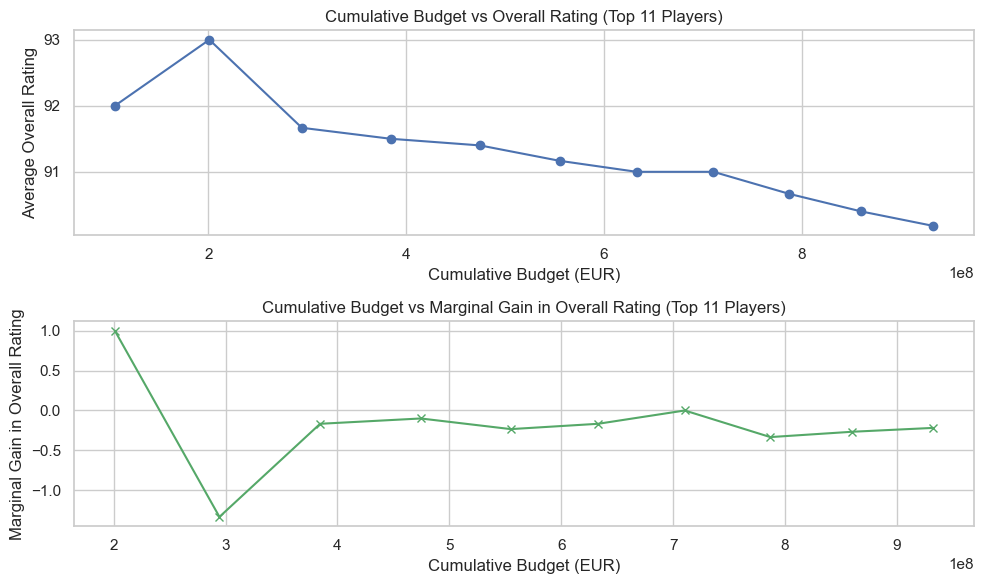

Ideal budget to avoid diminishing returns: 294500000 EUR
At this budget, the team's average overall rating is: 91.66666666666667

Top 11 Players:


short_name  age                 club player_positions  overall  \
2      Neymar Jr   27  Paris Saint-Germain          LW, CAM       92   
0       L. Messi   32         FC Barcelona       RW, CF, ST       94   
10     K. Mbappé   20  Paris Saint-Germain           ST, RW       89   
5   K. De Bruyne   28      Manchester City          CAM, CM       91   
4      E. Hazard   28          Real Madrid           LW, CF       91   
9       M. Salah   27            Liverpool           RW, ST       90   
7    V. van Dijk   27            Liverpool               CB       90   
3       J. Oblak   26      Atlético Madrid               GK       91   
23     P. Dybala   25             Juventus          CAM, RW       88   
26   R. Sterling   24      Manchester City           RW, LW       88   
24      P. Pogba   26    Manchester United          CM, CDM       88   

    value_eur  cumulative_budget  
2   105500000          105500000  
0    95500000          201000000  
10   93500000          294500000  
5    90000000          384500000  
4    90000000          474500000  
9    80500000          555000000  
7    78000000          633000000  
3    77500000          710500000  
23   76500000          787000000  
26   73000000          860000000  
24   72500000          932500000

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter players from top mentioned clubs
top_clubs = ['FC Barcelona', 'Real Madrid', 'Paris Saint-Germain', 'Liverpool', 'Manchester City','Juventus','Atlético Madrid','Manchester United', 'Chelsea']  # Example clubs
top_players = df[df['club'].isin(top_clubs)]

# Sort players by value_eur in descending order (most expensive first)
top_players_sorted = top_players.sort_values(by='value_eur', ascending=False)

# Select top 11 players
top_11_players = top_players_sorted.head(11)

# Calculate cumulative budget and average overall rating for top 11 players
top_11_players['cumulative_budget'] = top_11_players['value_eur'].cumsum()
top_11_players['cumulative_overall'] = top_11_players['overall'].expanding().mean()

# Calculate the marginal gain in overall rating
top_11_players['marginal_gain'] = top_11_players['cumulative_overall'].diff()

# Plot the cumulative budget against overall rating and marginal gain
plt.figure(figsize=(10, 6))

# Plot cumulative budget vs overall rating
plt.subplot(2, 1, 1)
plt.plot(top_11_players['cumulative_budget'], top_11_players['cumulative_overall'], label='Overall Rating', color='b', marker='o')
plt.title('Cumulative Budget vs Overall Rating (Top 11 Players)')
plt.xlabel('Cumulative Budget (EUR)')
plt.ylabel('Average Overall Rating')
plt.grid(True)

# Plot cumulative budget vs marginal gain
plt.subplot(2, 1, 2)
plt.plot(top_11_players['cumulative_budget'], top_11_players['marginal_gain'], label='Marginal Gain in Rating', color='g', marker='x')
plt.title('Cumulative Budget vs Marginal Gain in Overall Rating (Top 11 Players)')
plt.xlabel('Cumulative Budget (EUR)')
plt.ylabel('Marginal Gain in Overall Rating')
plt.grid(True)

plt.tight_layout()
plt.show()

# Identify the point of diminishing returns
threshold = 0.05  # Set a threshold for minimal improvement
diminishing_returns = top_11_players[top_11_players['marginal_gain'] < threshold].iloc[0]

print(f"Ideal budget to avoid diminishing returns: {diminishing_returns['cumulative_budget']} EUR")
print(f"At this budget, the team's average overall rating is: {diminishing_returns['cumulative_overall']}")

# Display the top 11 players
print("\nTop 11 Players:")
display(top_11_players[['short_name', 'age','club', 'player_positions','overall', 'value_eur', 'cumulative_budget']])


## Analysis: From the listed Clubs, the above are the most valued and rated players which have balanced team with overall rating of 92.

## Exploratory Data Analysis

In [113]:
df = pd.read_csv("update_fifa20_all_players.csv")
df

Unnamed: 0  age  height_cm  weight_kg         short_name  \
0               0   32        170         72           L. Messi   
1               1   34        187         83  Cristiano Ronaldo   
2               2   27        175         68          Neymar Jr   
3               3   26        188         87           J. Oblak   
4               4   28        175         74          E. Hazard   
...           ...  ...        ...        ...                ...   
18273       18273   22        186         79         Shao Shuai   
18274       18274   22        177         66       Xiao Mingjie   
18275       18275   19        186         75          Zhang Wei   
18276       18276   18        185         74       Wang Haijian   
18277       18277   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                    Atlético Madrid    Slovenia               GK       91   
4                        Real Madrid     Belgium           LW, CF       91   
...                              ...         ...              ...      ...   
18273               Beijing Renhe FC    China PR               CB       48   
18274               Shanghai SIPG FC    China PR               CB       48   
18275         Hebei China Fortune FC    China PR               CM       48   
18276  Shanghai Greenland Shenhua FC    China PR               CM       48   
18277         Hebei China Fortune FC    China PR               CM       48   

       potential  ...  striker  right_wing  left_wing  forward  \
0             94  ...     91.0        95.0       95.0     95.0   
1             93  ...     94.0        92.0       92.0     93.0   
2             92  ...     87.0        93.0       93.0     92.0   
3             93  ...      NaN         NaN        NaN      NaN   
4             91  ...     86.0        92.0       92.0     91.0   
...          ...  ...      ...         ...        ...      ...   
18273         56  ...     34.0        33.0       33.0     33.0   
18274         56  ...     35.0        35.0       35.0     34.0   
18275         56  ...     45.0        45.0       45.0     45.0   
18276         54  ...     45.0        47.0       47.0     46.0   
18277         51  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                     NaN       NaN            NaN                 NaN   
4                    92.0      86.0           92.0                66.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3            NaN      NaN  
4           66.5     52.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[18278 rows x 63 columns]

In [114]:
df.columns

Index(['Unnamed: 0', 'age', 'height_cm', 'weight_kg', 'short_name', 'club',
       'nationality', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'work_rate', 'goalkeeping_diving',
 

In [115]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       26        188         87           J. Oblak   
4       28        175         74          E. Hazard   
...    ...        ...        ...                ...   
18273   22        186         79         Shao Shuai   
18274   22        177         66       Xiao Mingjie   
18275   19        186         75          Zhang Wei   
18276   18        185         74       Wang Haijian   
18277   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                    Atlético Madrid    Slovenia               GK       91   
4                        Real Madrid     Belgium           LW, CF       91   
...                              ...         ...              ...      ...   
18273               Beijing Renhe FC    China PR               CB       48   
18274               Shanghai SIPG FC    China PR               CB       48   
18275         Hebei China Fortune FC    China PR               CM       48   
18276  Shanghai Greenland Shenhua FC    China PR               CM       48   
18277         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  striker  right_wing  left_wing  forward  \
0             94   95500000  ...     91.0        95.0       95.0     95.0   
1             93   58500000  ...     94.0        92.0       92.0     93.0   
2             92  105500000  ...     87.0        93.0       93.0     92.0   
3             93   77500000  ...      NaN         NaN        NaN      NaN   
4             91   90000000  ...     86.0        92.0       92.0     91.0   
...          ...        ...  ...      ...         ...        ...      ...   
18273         56      40000  ...     34.0        33.0       33.0     33.0   
18274         56      40000  ...     35.0        35.0       35.0     34.0   
18275         56      40000  ...     45.0        45.0       45.0     45.0   
18276         54      40000  ...     45.0        47.0       47.0     46.0   
18277         51      40000  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                     NaN       NaN            NaN                 NaN   
4                    92.0      86.0           92.0                66.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3            NaN      NaN  
4           66.5     52.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[18278 rows x 62 columns]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   short_name                  18278 non-null  object 
 4   club                        18278 non-null  object 
 5   nationality                 18278 non-null  object 
 6   player_positions            18278 non-null  object 
 7   overall                     18278 non-null  int64  
 8   potential                   18278 non-null  int64  
 9   value_eur                   18278 non-null  int64  
 10  wage_eur                    18278 non-null  int64  
 11  pace                        16242 non-null  float64
 12  shooting                    16242 non-null  float64
 13  passing                     162

In [117]:
# Checking of null values
df.isnull().sum()

age                      0
height_cm                0
weight_kg                0
short_name               0
club                     0
                      ... 
midfield              2036
wide_midfield         2036
defensive_midfield    2036
full_back             2036
defense               2036
Length: 62, dtype: int64

In [118]:
# Fill null values with zero
df = df.fillna(0)
df

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       26        188         87           J. Oblak   
4       28        175         74          E. Hazard   
...    ...        ...        ...                ...   
18273   22        186         79         Shao Shuai   
18274   22        177         66       Xiao Mingjie   
18275   19        186         75          Zhang Wei   
18276   18        185         74       Wang Haijian   
18277   26        182         78         Pan Ximing   

                                club nationality player_positions  overall  \
0                       FC Barcelona   Argentina       RW, CF, ST       94   
1                           Juventus    Portugal           ST, LW       93   
2                Paris Saint-Germain      Brazil          LW, CAM       92   
3                    Atlético Madrid    Slovenia               GK       91   
4                        Real Madrid     Belgium           LW, CF       91   
...                              ...         ...              ...      ...   
18273               Beijing Renhe FC    China PR               CB       48   
18274               Shanghai SIPG FC    China PR               CB       48   
18275         Hebei China Fortune FC    China PR               CM       48   
18276  Shanghai Greenland Shenhua FC    China PR               CM       48   
18277         Hebei China Fortune FC    China PR               CM       48   

       potential  value_eur  ...  striker  right_wing  left_wing  forward  \
0             94   95500000  ...     91.0        95.0       95.0     95.0   
1             93   58500000  ...     94.0        92.0       92.0     93.0   
2             92  105500000  ...     87.0        93.0       93.0     92.0   
3             93   77500000  ...      0.0         0.0        0.0      0.0   
4             91   90000000  ...     86.0        92.0       92.0     91.0   
...          ...        ...  ...      ...         ...        ...      ...   
18273         56      40000  ...     34.0        33.0       33.0     33.0   
18274         56      40000  ...     35.0        35.0       35.0     34.0   
18275         56      40000  ...     45.0        45.0       45.0     45.0   
18276         54      40000  ...     45.0        47.0       47.0     46.0   
18277         51      40000  ...     44.0        46.0       46.0     45.0   

       attacking_midfield  midfield  wide_midfield  defensive_midfield  \
0                    95.0      89.0           94.0                68.0   
1                    91.0      84.0           91.0                64.0   
2                    93.0      85.0           92.0                64.0   
3                     0.0       0.0            0.0                 0.0   
4                    92.0      86.0           92.0                66.0   
...                   ...       ...            ...                 ...   
18273                33.0      35.0           35.0                44.0   
18274                35.0      38.0           37.0                45.0   
18275                46.0      48.0           47.0                51.0   
18276                48.0      48.0           48.0                50.0   
18277                48.0      48.0           48.0                51.0   

       full_back  defense  
0           67.5     54.0  
1           66.0     56.0  
2           66.5     49.0  
3            0.0      0.0  
4           66.5     52.0  
...          ...      ...  
18273       46.0     48.0  
18274       47.0     49.0  
18275       49.0     51.0  
18276       50.0     51.0  
18277       50.0     52.0  

[18278 rows x 62 columns]

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   short_name                  18278 non-null  object 
 4   club                        18278 non-null  object 
 5   nationality                 18278 non-null  object 
 6   player_positions            18278 non-null  object 
 7   overall                     18278 non-null  int64  
 8   potential                   18278 non-null  int64  
 9   value_eur                   18278 non-null  int64  
 10  wage_eur                    18278 non-null  int64  
 11  pace                        18278 non-null  float64
 12  shooting                    18278 non-null  float64
 13  passing                     182

In [120]:
#statistical distribution 
df.describe()

age     height_cm     weight_kg       overall     potential  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      25.283291    181.362184     75.276343     66.244994     71.546887   
std        4.656964      6.756961      7.047744      6.949953      6.139669   
min       16.000000    156.000000     50.000000     48.000000     49.000000   
25%       22.000000    177.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     71.000000     75.000000   
max       42.000000    205.000000    110.000000     94.000000     95.000000   

          value_eur       wage_eur          pace      shooting       passing  \
count  1.827800e+04   18278.000000  18278.000000  18278.000000  18278.000000   
mean   2.484038e+06    9456.942773     60.159645     46.472754     50.858464   
std    5.585481e+06   21351.714095     23.814336     21.110257     20.506407   
min    0.000000e+00       0.000000      0.000000      0.000000      0.000000   
25%    3.250000e+05    1000.000000     57.000000     35.000000     46.000000   
50%    7.000000e+05    3000.000000     67.000000     52.000000     56.000000   
75%    2.100000e+06    8000.000000     74.000000     62.000000     63.000000   
max    1.055000e+08  565000.000000     96.000000     93.000000     92.000000   

       ...       striker    right_wing     left_wing       forward  \
count  ...  18278.000000  18278.000000  18278.000000  18278.000000   
mean   ...     53.192034     54.298501     54.298501     54.023416   
std    ...     20.733829     21.363255     21.363255     21.267185   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     50.000000     51.000000     51.000000     51.000000   
50%    ...     59.000000     61.000000     61.000000     60.000000   
75%    ...     66.000000     67.000000     67.000000     67.000000   
max    ...     94.000000     95.000000     95.000000     95.000000   

       attacking_midfield      midfield  wide_midfield  defensive_midfield  \
count        18278.000000  18278.000000   18278.000000        18278.000000   
mean            54.266824     53.549240      54.902451           52.208064   
std             21.305434     20.707756      21.306409           20.827602   
min              0.000000      0.000000       0.000000            0.000000   
25%             51.000000     51.000000      52.000000           48.000000   
50%             60.000000     59.000000      61.000000           58.000000   
75%             67.000000     65.000000      67.000000           65.000000   
max             95.000000     90.000000      94.000000           90.000000   

          full_back       defense  
count  18278.000000  18278.000000  
mean      52.475435     51.090382  
std       20.541133     21.232318  
min        0.000000      0.000000  
25%       49.000000     44.000000  
50%       58.000000     57.000000  
75%       65.000000     66.000000  
max       87.500000     90.000000  

[8 rows x 57 columns]

In [121]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'short_name', 'club', 'nationality',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'work_rate', 'goalkeeping_diving',
       'goalkee

## Pre-processing

In [122]:
relevant_features = [
    # Basic Player Information
    'age', 'height_cm', 'weight_kg', 'short_name', 'club','work_rate',
    
    
    # Skill Ratings
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
    'goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking','goalkeeping_positioning',
    'goalkeeping_reflexes'  
]

df2 = df[relevant_features]
df2

age  height_cm  weight_kg         short_name  \
0       32        170         72           L. Messi   
1       34        187         83  Cristiano Ronaldo   
2       27        175         68          Neymar Jr   
3       26        188         87           J. Oblak   
4       28        175         74          E. Hazard   
...    ...        ...        ...                ...   
18273   22        186         79         Shao Shuai   
18274   22        177         66       Xiao Mingjie   
18275   19        186         75          Zhang Wei   
18276   18        185         74       Wang Haijian   
18277   26        182         78         Pan Ximing   

                                club      work_rate  pace  shooting  passing  \
0                       FC Barcelona     Medium/Low  87.0      92.0     92.0   
1                           Juventus       High/Low  90.0      93.0     82.0   
2                Paris Saint-Germain    High/Medium  91.0      85.0     87.0   
3                    Atlético Madrid  Medium/Medium   0.0       0.0      0.0   
4                        Real Madrid    High/Medium  91.0      83.0     86.0   
...                              ...            ...   ...       ...      ...   
18273               Beijing Renhe FC    Medium/High  57.0      23.0     28.0   
18274               Shanghai SIPG FC  Medium/Medium  58.0      24.0     33.0   
18275         Hebei China Fortune FC     Low/Medium  54.0      35.0     44.0   
18276  Shanghai Greenland Shenhua FC        Low/Low  59.0      35.0     47.0   
18277         Hebei China Fortune FC  Medium/Medium  60.0      32.0     51.0   

       dribbling  defending  physic  defending_marking  \
0           96.0       39.0    66.0                 33   
1           89.0       35.0    78.0                 28   
2           95.0       32.0    58.0                 27   
3            0.0        0.0     0.0                 27   
4           94.0       35.0    66.0                 34   
...          ...        ...     ...                ...   
18273       33.0       47.0    51.0                 45   
18274       35.0       48.0    48.0                 42   
18275       45.0       48.0    51.0                 46   
18276       47.0       45.0    52.0                 39   
18277       45.0       47.0    55.0                 52   

       defending_standing_tackle  defending_sliding_tackle  \
0                             37                        26   
1                             32                        24   
2                             26                        29   
3                             12                        18   
4                             27                        22   
...                          ...                       ...   
18273                         50                        52   
18274                         53                        57   
18275                         52                        46   
18276                         44                        54   
18277                         42                        48   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                       7                    11                   15   
2                       9                     9                   15   
3                      87                    92                   78   
4                      11                    12                    6   
...                   ...                   ...                  ...   
18273                   5                     5                   13   
18274                  13                     6                   14   
18275                   7                     8                   10   
18276                  14                     9                   13   
18277                   8                    12                   14   

       goalkeeping_positioning  goalkeeping_reflexes  
0                      

## Taken out the most relavent features for players and goal keepers to build the model

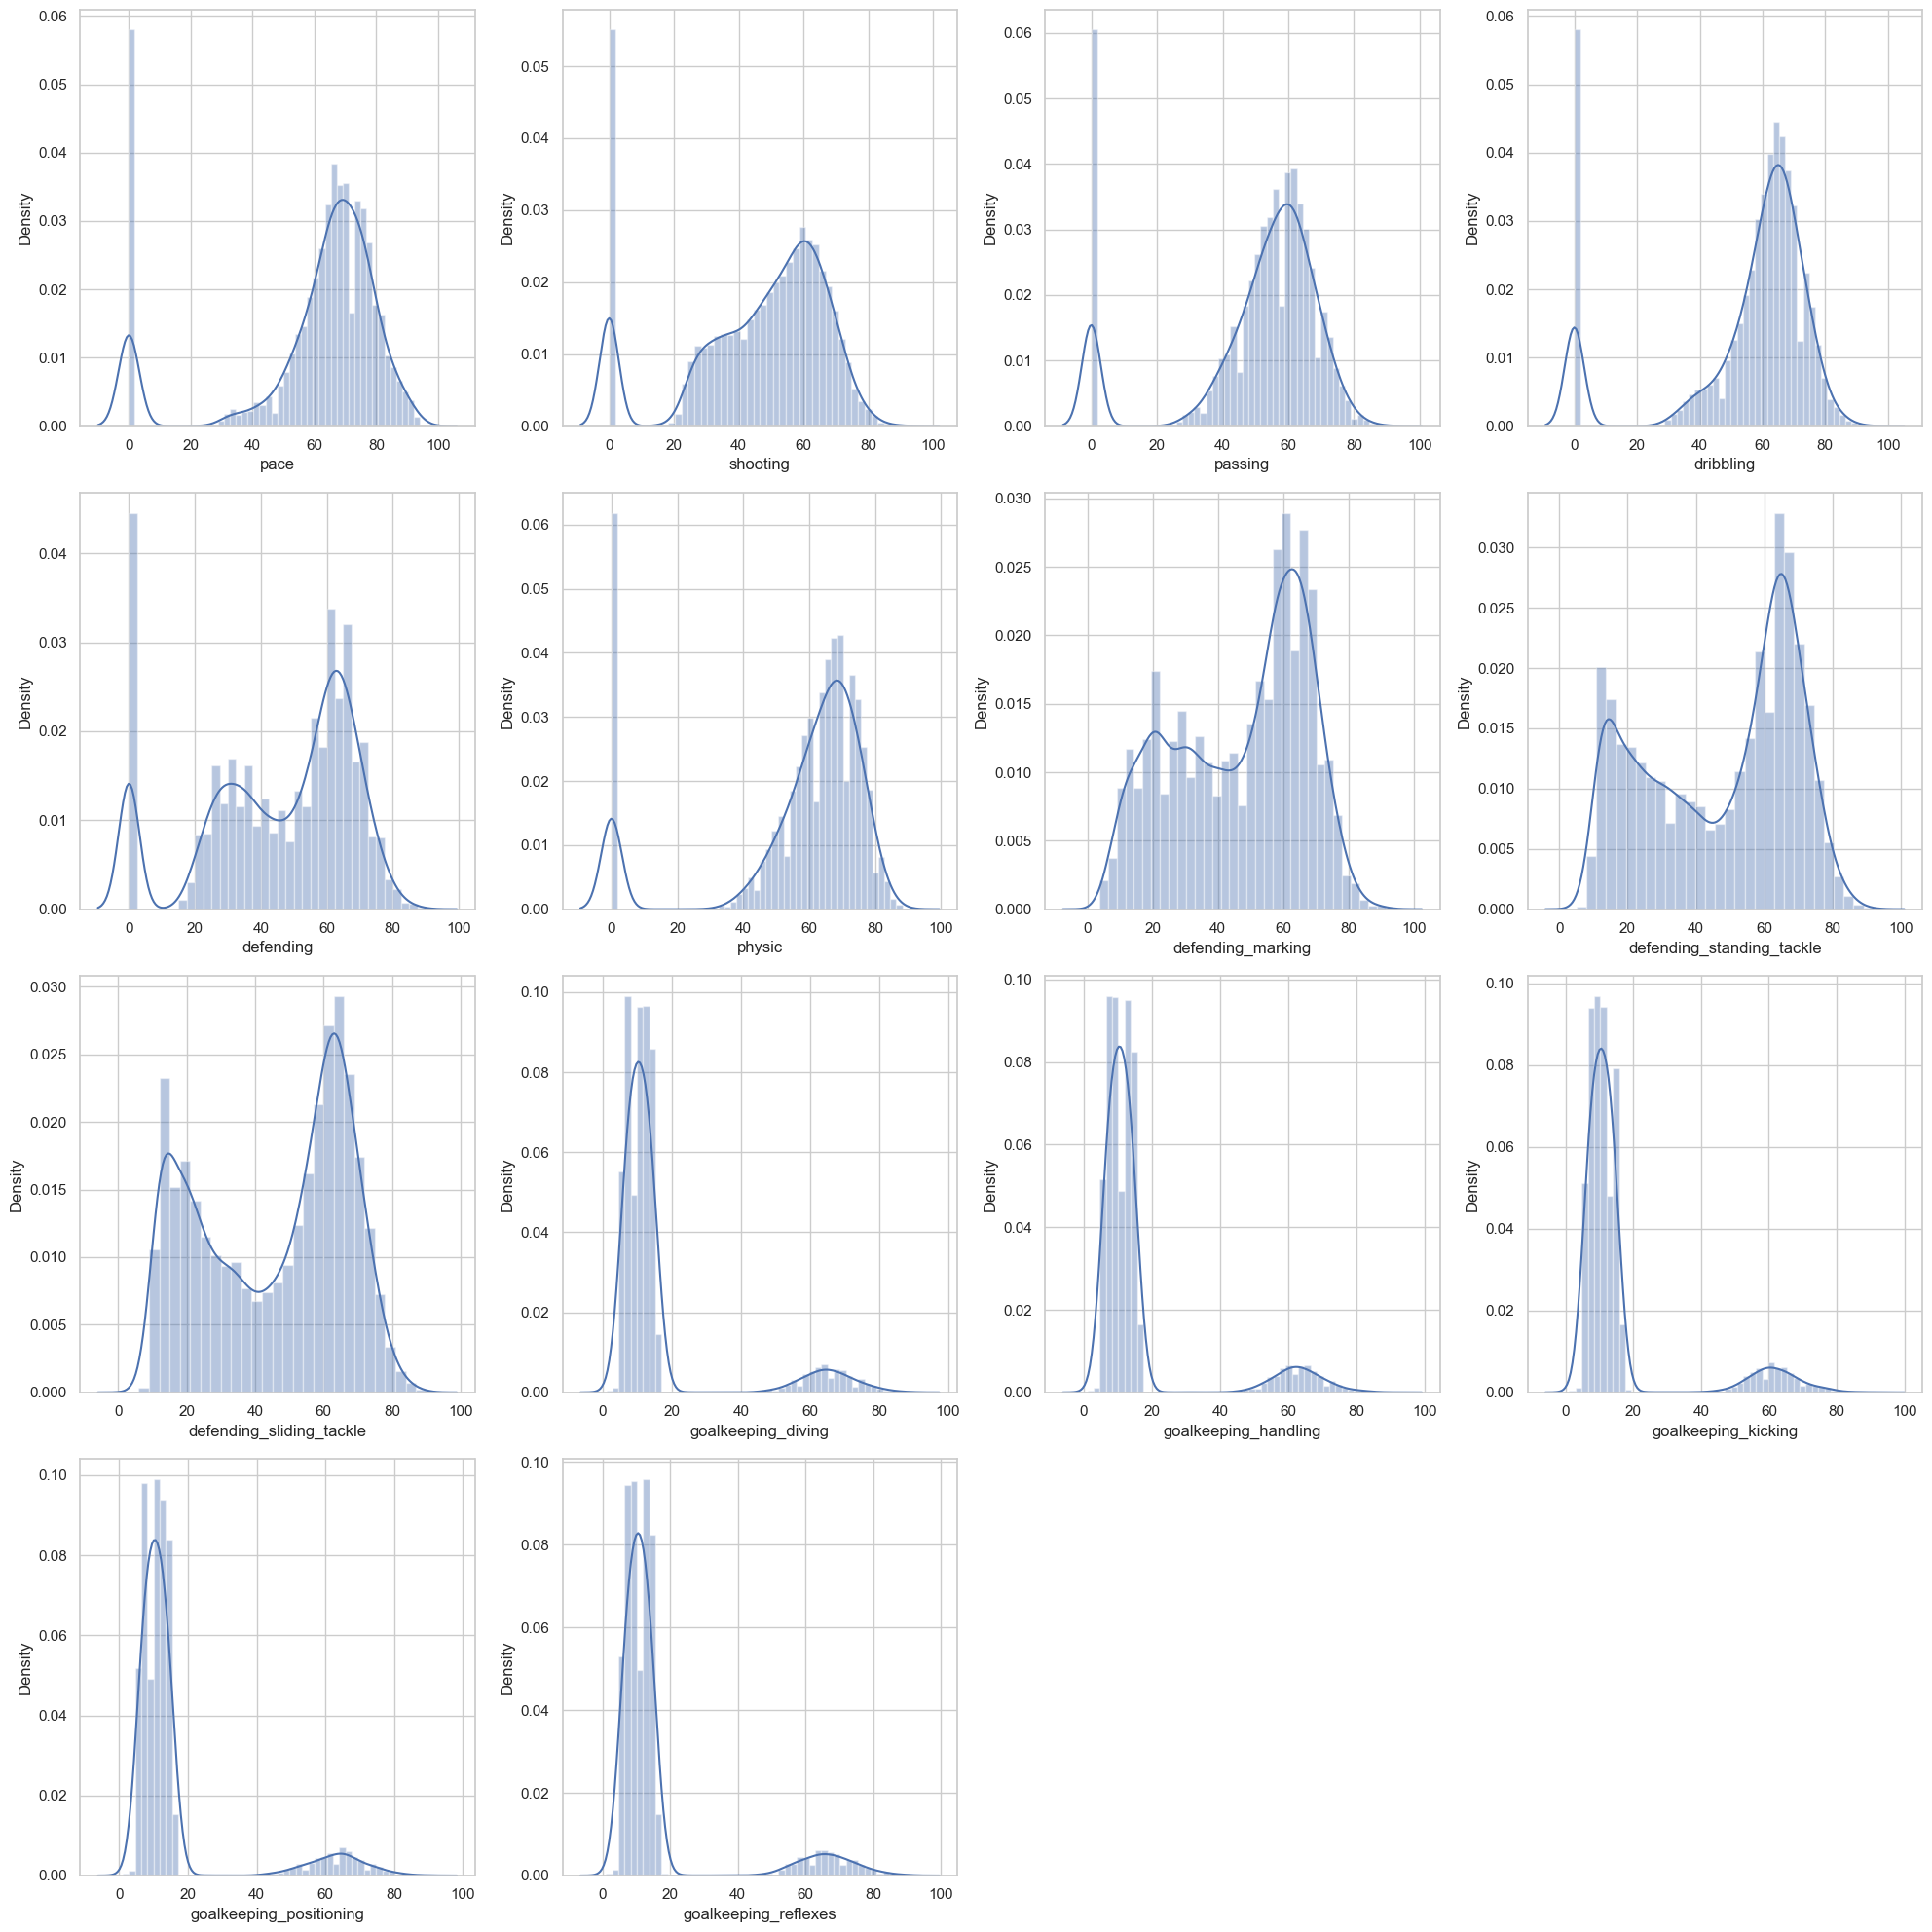

In [123]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df2.columns[6:21]:
    if plotnumber <= 14:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column], kde=True)
        plt.tight_layout()

    plotnumber += 1

In [124]:
# converting categorical columns into numerical columns using label encoder
from sklearn.preprocessing import LabelEncoder
import joblib
le_short_name = LabelEncoder()
le_club = LabelEncoder()
le_nationality = LabelEncoder()
le_player_positions = LabelEncoder()
le_work_rate = LabelEncoder()

df2['short_name'] = le_short_name.fit_transform(df2['short_name'])
joblib.dump(le_short_name,"short_name.pkl")
df2['club'] = le_club.fit_transform(df2['club'])
joblib.dump(le_club,"club.pkl")
df2['work_rate'] = le_work_rate.fit_transform(df2['work_rate'])
joblib.dump(le_work_rate,"work_rate.pkl")

df2

age  height_cm  weight_kg  short_name  club  work_rate  pace  shooting  \
0       32        170         72        9723   224          7  87.0      92.0   
1       34        187         83        3164   350          1  90.0      93.0   
2       27        175         68       12658   462          2  91.0      85.0   
3       26        188         87        7851    63          8   0.0       0.0   
4       28        175         74        4459   505          2  91.0      83.0   
...    ...        ...        ...         ...   ...        ...   ...       ...   
18273   22        186         79       15580    79          6  57.0      23.0   
18274   22        177         66       16833   574          8  58.0      24.0   
18275   19        186         75       17252   317          5  54.0      35.0   
18276   18        185         74       16760   573          4  59.0      35.0   
18277   26        182         78       13452   317          8  60.0      32.0   

       passing  dribbling  defending  physic  defending_marking  \
0         92.0       96.0       39.0    66.0                 33   
1         82.0       89.0       35.0    78.0                 28   
2         87.0       95.0       32.0    58.0                 27   
3          0.0        0.0        0.0     0.0                 27   
4         86.0       94.0       35.0    66.0                 34   
...        ...        ...        ...     ...                ...   
18273     28.0       33.0       47.0    51.0                 45   
18274     33.0       35.0       48.0    48.0                 42   
18275     44.0       45.0       48.0    51.0                 46   
18276     47.0       47.0       45.0    52.0                 39   
18277     51.0       45.0       47.0    55.0                 52   

       defending_standing_tackle  defending_sliding_tackle  \
0                             37                        26   
1                             32                        24   
2                             26                        29   
3                             12                        18   
4                             27                        22   
...                          ...                       ...   
18273                         50                        52   
18274                         53                        57   
18275                         52                        46   
18276                         44                        54   
18277                         42                        48   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                       7                    11                   15   
2                       9                     9                   15   
3                      87                    92                   78   
4                      11                    12                    6   
...                   ...                   ...                  ...   
18273                   5                     5                   13   
18274                  13                     6                   14   
18275                   7                     8                   10   
18276                  14                     9                   13   
18277                   8                    12                   14   

       goalkeeping_positioning  goalkeeping_reflexes  
0                           14                     8  
1                           14                    11  
2                           15                    11  
3                           90                    89  
4                            8                     8  
...                        ...                   ...  
18273                        5                    14  
18274                       11                     9  
18275                        6                    14  
18276                       13                    13  
18277         

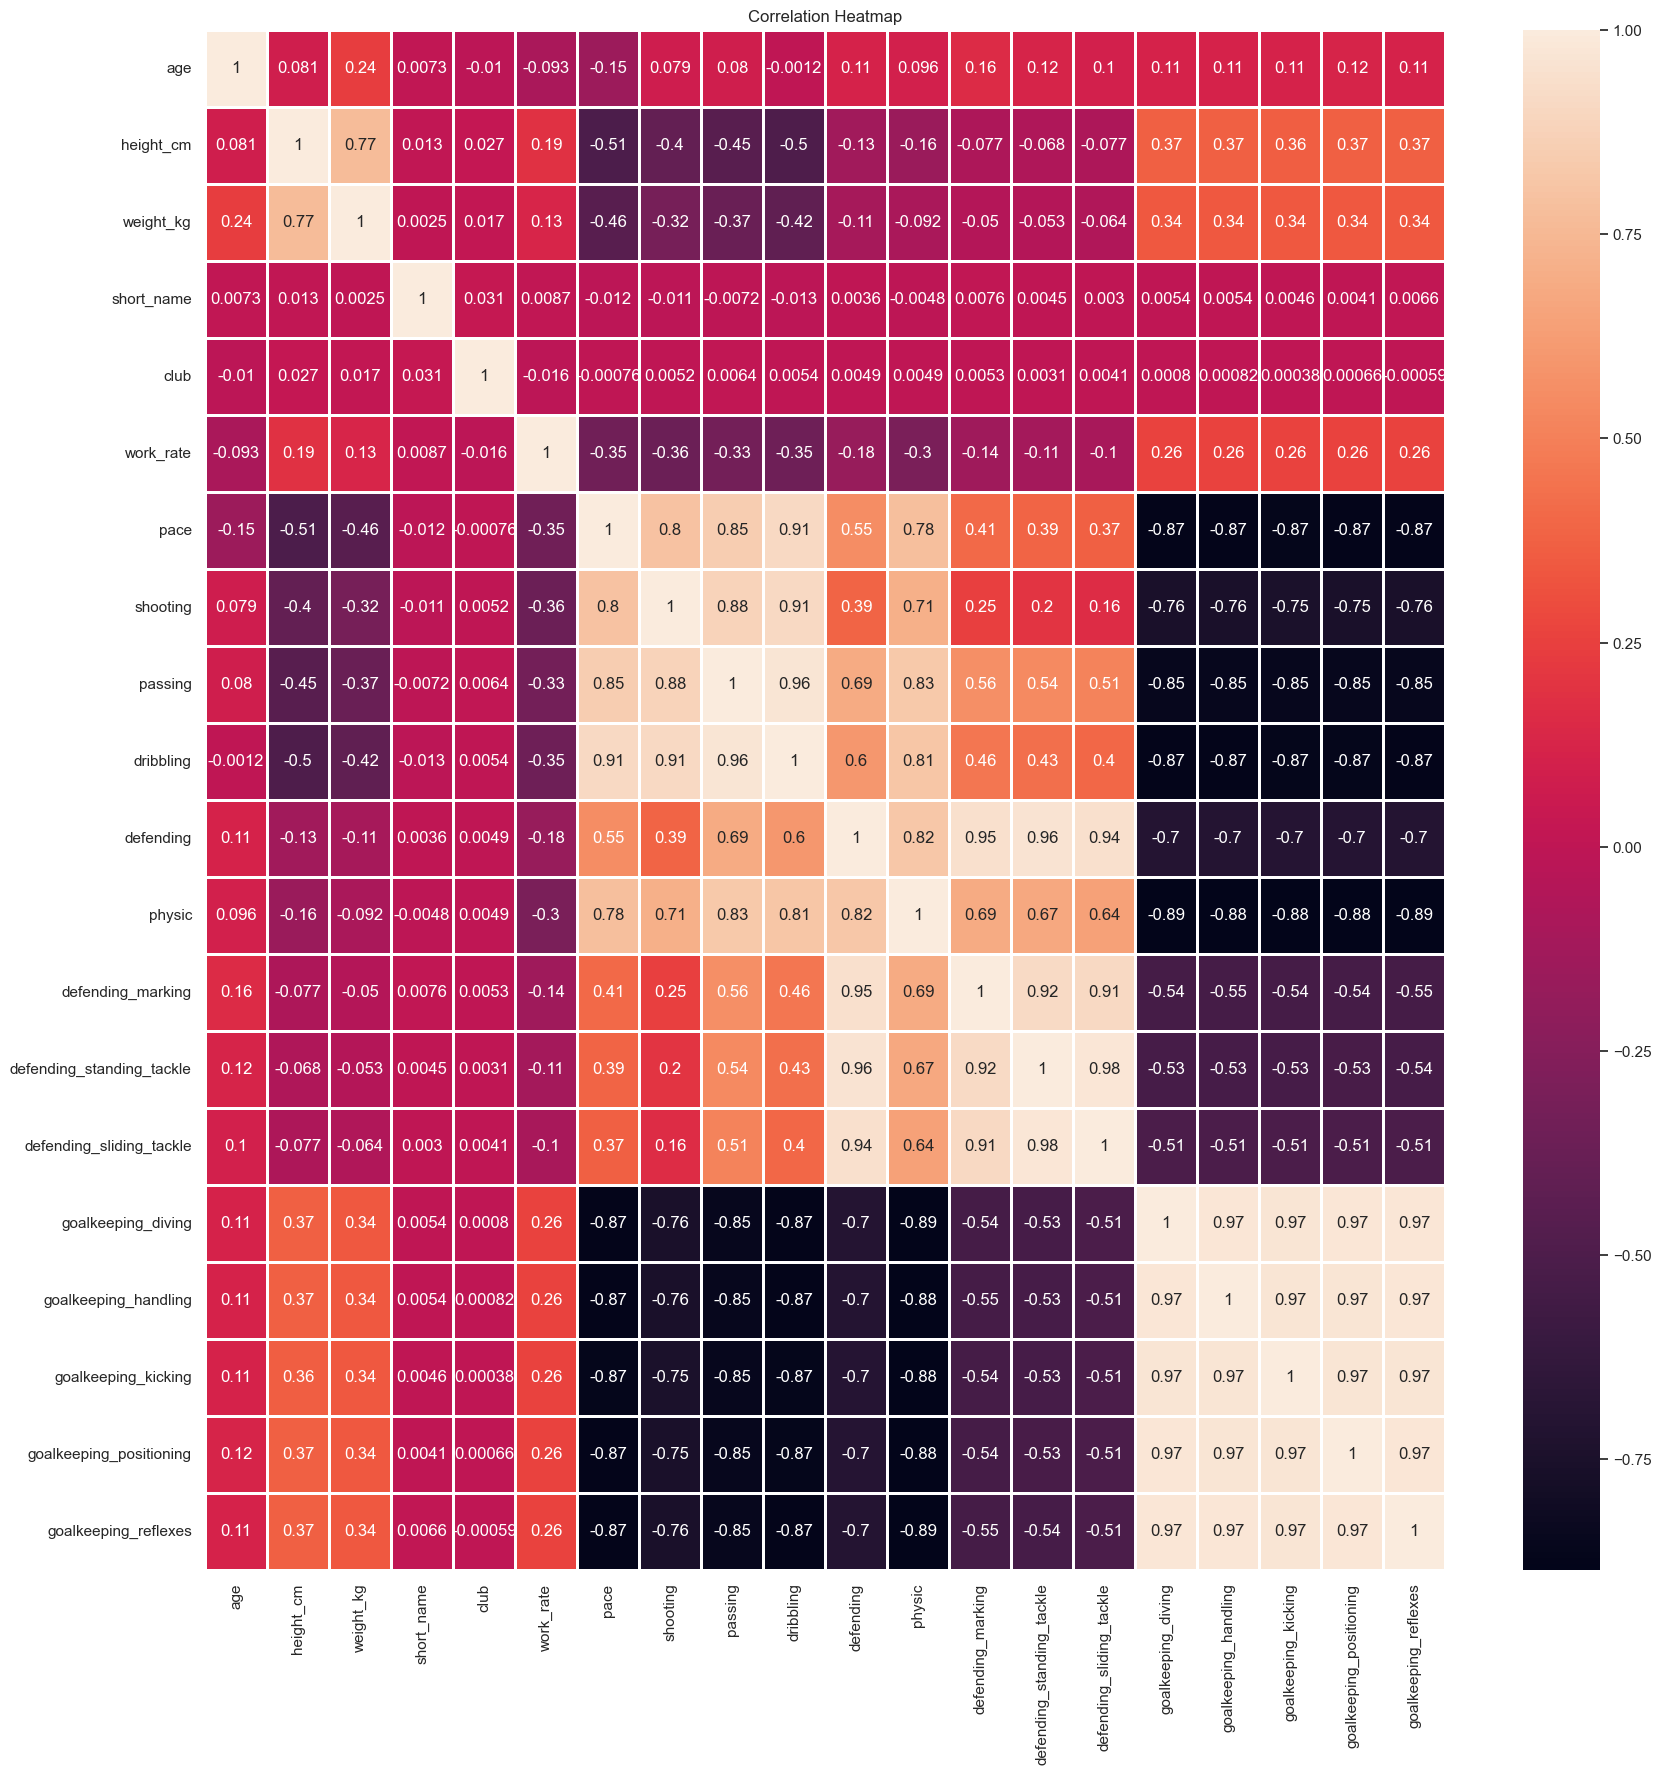

In [125]:
#checking of highly correlated features
heatmap_data = df2[df2.columns.values]

correlation_matrix = heatmap_data.corr()

plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True, linewidths=1)

plt.title('Correlation Heatmap')
plt.show()

## Model Building - Random forest

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error

X = df2  # Independent features
y = pd.DataFrame({'overall': df['overall'], 
                  'potential': df['potential'], 
                  'value_eur': df['value_eur'], 
                  'wage_eur': df['wage_eur']})  # Dependent features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Initialize base model 
base_model = RandomForestRegressor(n_estimators=100, random_state=42)
# Multi-output regression using RandomForest
multi_output_model = MultiOutputRegressor(base_model)
# Fit the model
multi_output_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [128]:
# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Reset index to align with test data index
y_pred_df = y_pred_df.reset_index(drop=True)

print("_____PREDICTION____")
display(y_pred_df)
print("_____TRUTH______")
display(y_test)

_____PREDICTION____


overall  potential  value_eur  wage_eur
0       63.54      64.44   298000.0    1760.0
1       73.64      73.68  5114000.0   17660.0
2       68.60      72.91  1113250.0    4740.0
3       68.29      77.32  1299750.0    5270.0
4       61.62      62.46   332450.0    2220.0
...       ...        ...        ...       ...
3651    62.07      66.40   356350.0    2030.0
3652    67.98      68.46   864750.0    5480.0
3653    60.14      67.90   288850.0    1290.0
3654    52.74      66.75   109800.0    1000.0
3655    67.50      80.61  1386750.0    5370.0

[3656 rows x 4 columns]

_____TRUTH______


overall  potential  value_eur  wage_eur
11854       64         64     270000      1000
2647        74         74    5000000      1000
5945        69         74    1000000      8000
6798        68         76    1300000      5000
12985       63         63     350000      2000
...        ...        ...        ...       ...
13684       62         65     280000      1000
7453        68         68     775000      4000
15695       59         65     210000      1000
17583       53         77     120000      1000
6649        68         82    1800000      6000

[3656 rows x 4 columns]

In [129]:
# Calculate the metrics for each target
mse_rf = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae_rf = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2_rf = r2_score(y_test, y_pred, multioutput='raw_values')
rmse_rf = np.sqrt(mse_rf)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'MSE': mse_rf,
    'MAE': mae_rf,
    'R2': r2_rf,
    'RMSE': rmse_rf
}, index=['Overall', 'Potential', 'Value EUR', 'Wage EUR'])

# Round values to 4 decimal places
metrics_df_rf = metrics_df.round(4)

# Display the DataFrame with rounded values
display(metrics_df_rf)

MSE          MAE      R2          RMSE
Overall    1.491300e+00       0.9360  0.9684  1.221200e+00
Potential  4.713900e+00       1.6220  0.8753  2.171200e+00
Value EUR  3.001369e+12  603010.7221  0.8978  1.732446e+06
Wage EUR   1.515212e+08    4677.5957  0.6965  1.230940e+04

## Hyper parameter tuning on RANDOM FOREST

In [150]:
from sklearn.ensemble import RandomForestRegressor

# Hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

base_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

multi_output_model = MultiOutputRegressor(grid_search)

multi_output_model.fit(X_train, y_train)

# Retrieve the best hyperparameters
for i, estimator in enumerate(multi_output_model.estimators_):
    print(f"Best hyperparameters for target {i + 1}: {estimator.best_params_}")

# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Display predictions DataFrame
print("_____________Tuned Random Forest Regressor Predictions:____________________")
display(y_pred_df)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters for target 1: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for target 2: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for target 3: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for target 4: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
_____________Tuned Random Forest Regressor Predictions:____________________


overall  potential     value_eur      wage_eur
0     63.767485  64.883915  3.497179e+05   2018.212653
1     73.815956  74.572894  5.295247e+06  16319.505823
2     68.777812  73.160149  1.040966e+06   5386.694518
3     68.070811  76.074840  1.320669e+06   5402.449662
4     62.941259  63.962643  4.091770e+05   2574.155511
...         ...        ...           ...           ...
3651  61.823691  66.298341  3.644867e+05   2091.290201
3652  67.807063  68.188134  9.979834e+05   5357.381052
3653  59.938314  67.783031  3.392477e+05   1810.411292
3654  53.235805  69.569516  1.822462e+05   1191.841611
3655  67.537130  79.112256  1.321644e+06   5042.436249

[3656 rows x 4 columns]

## Model Building - Linear Regression (Ridge)

In [154]:
from sklearn.linear_model import Ridge

# Initialize base model
base_model = Ridge()

# Multi-output regression
multi_output_model = MultiOutputRegressor(base_model)

# Fit the model
multi_output_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=Ridge())

In [155]:
# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Reset index to align with test data index
y_pred_df = y_pred_df.reset_index(drop=True)

# output
print("_____PREDICTION____")
display(y_pred_df)
print("_____TRUTH______")
display(y_test)

_____PREDICTION____


overall  potential     value_eur      wage_eur
0     63.055975  62.832923 -1.310967e+06  -1193.136080
1     77.885209  76.607280  7.500640e+06  27018.822953
2     67.849889  73.457737  3.714262e+06  10746.865332
3     68.011164  75.750396  4.985920e+06  16570.017869
4     66.143647  66.705526  1.073575e+06   7298.332811
...         ...        ...           ...           ...
3651  61.820081  69.270488  6.558664e+04   2584.905643
3652  72.313573  72.820547  4.598958e+06  15801.441343
3653  62.172464  69.868472  1.134543e+06   4161.290008
3654  58.574030  72.214542 -1.533190e+05  -2461.872942
3655  64.487296  76.299057  3.314711e+06  10356.166041

[3656 rows x 4 columns]

_____TRUTH______


overall  potential  value_eur  wage_eur
11854       64         64     270000      1000
2647        74         74    5000000      1000
5945        69         74    1000000      8000
6798        68         76    1300000      5000
12985       63         63     350000      2000
...        ...        ...        ...       ...
13684       62         65     280000      1000
7453        68         68     775000      4000
15695       59         65     210000      1000
17583       53         77     120000      1000
6649        68         82    1800000      6000

[3656 rows x 4 columns]

In [156]:
# Calculate the Metrics for each target
mse_lr = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae_lr = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2_lr = r2_score(y_test, y_pred, multioutput='raw_values')
rmse_lr = np.sqrt(mse_lr)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'MSE': mse_lr,
    'MAE': mae_lr,
    'R2': r2_lr,
    'RMSE': rmse_lr
}, index=['Overall', 'Potential', 'Value EUR', 'Wage EUR'])

# Round values to 4 decimal places
metrics_df_lr = metrics_df.round(4)

# Display the DataFrame with rounded values
display(metrics_df_lr)

MSE           MAE      R2          RMSE
Overall    1.274600e+01  2.814100e+00  0.7302  3.570200e+00
Potential  1.792790e+01  3.371100e+00  0.5259  4.234100e+00
Value EUR  2.064536e+13  2.468617e+06  0.2971  4.543716e+06
Wage EUR   3.874002e+08  9.132839e+03  0.2240  1.968249e+04

## Hyper parameter tuning on Linear regression - Ridge

In [157]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

# Hyperparameter grid for Ridge Regression
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

base_model = Ridge()

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

multi_output_model = MultiOutputRegressor(grid_search)

# Fit the model
multi_output_model.fit(X_train, y_train)

# Retrieve the best hyperparameters for each target (overall, potential, etc.)
for i, estimator in enumerate(multi_output_model.estimators_):
    print(f"Best hyperparameters for target {i + 1}: {estimator.best_params_}")

# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Display predictions DataFrame
print("____________Tuned Ridge Regression Predictions:_________________")
display(y_pred_df)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters for target 1: {'alpha': 100}
Best hyperparameters for target 2: {'alpha': 100}
Best hyperparameters for target 3: {'alpha': 100}
Best hyperparameters for target 4: {'alpha': 100}
____________Tuned Ridge Regression Predictions:_________________


overall  potential     value_eur      wage_eur
0     63.059208  62.839608 -1.308060e+06  -1184.368095
1     77.884439  76.607511  7.500615e+06  27018.504544
2     67.850933  73.457726  3.714411e+06  10748.625120
3     68.011550  75.749288  4.985414e+06  16569.070563
4     66.141738  66.705402  1.073070e+06   7295.262271
...         ...        ...           ...           ...
3651  61.819107  69.269348  6.504986e+04   2582.231007
3652  72.315428  72.822870  4.600335e+06  15806.908920
3653  62.170638  69.866902  1.133277e+06   4156.461993
3654  58.575179  72.213960 -1.529929e+05  -2459.860580
3655  64.486235  76.294490  3.312942e+06  10351.412068

[3656 rows x 4 columns]

## Model Building - Gradient Boost

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize base model
base_model = GradientBoostingRegressor(random_state=42)

# Multi-output regression
multi_output_model = MultiOutputRegressor(base_model)

# Fit the model
multi_output_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [135]:
# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Reset index to align with test data index
y_pred_df = y_pred_df.reset_index(drop=True)

# output
print("_____PREDICTION____")
display(y_pred_df)
print("_____TRUTH______")
display(y_test)

_____PREDICTION____


overall  potential     value_eur      wage_eur
0     63.182110  64.146163  2.296601e+05   1689.177931
1     72.845291  73.557095  4.439727e+06  19639.648632
2     68.754801  73.104643  8.691383e+05   3626.445485
3     68.617066  77.583800  1.336883e+06   5108.646493
4     62.973204  63.634436  3.717231e+05   2414.379933
...         ...        ...           ...           ...
3651  62.154693  67.086642  4.127392e+05   2736.679914
3652  68.055725  67.711602  5.913771e+05   4419.963452
3653  59.380178  67.608042  3.310634e+05   1943.817905
3654  55.065806  71.125108  3.344910e+05   1718.638682
3655  67.196221  78.972788  1.354286e+06   4686.331635

[3656 rows x 4 columns]

_____TRUTH______


overall  potential  value_eur  wage_eur
11854       64         64     270000      1000
2647        74         74    5000000      1000
5945        69         74    1000000      8000
6798        68         76    1300000      5000
12985       63         63     350000      2000
...        ...        ...        ...       ...
13684       62         65     280000      1000
7453        68         68     775000      4000
15695       59         65     210000      1000
17583       53         77     120000      1000
6649        68         82    1800000      6000

[3656 rows x 4 columns]

In [136]:
# Calculate the Metrics for each target
mse_gb = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae_gb = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2_gb = r2_score(y_test, y_pred, multioutput='raw_values')
rmse_gb = np.sqrt(mse_gb)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'MSE': mse_gb,
    'MAE': mae_gb,
    'R2': r2_gb,
    'RMSE': rmse_gb
}, index=['Overall', 'Potential', 'Value EUR', 'Wage EUR'])

# Round values to 4 decimal places
metrics_df_gb = metrics_df.round(4)

# Display the DataFrame with rounded values
display(metrics_df_gb)

MSE          MAE      R2          RMSE
Overall    2.093700e+00       1.1105  0.9557  1.447000e+00
Potential  5.501200e+00       1.7576  0.8545  2.345500e+00
Value EUR  2.768128e+12  666926.3678  0.9058  1.663769e+06
Wage EUR   1.480412e+08    4740.6789  0.7034  1.216722e+04

## Hyper parameter tuning on GRADIENTBOOST

In [151]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

base_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

multi_output_model = MultiOutputRegressor(grid_search)

multi_output_model.fit(X_train, y_train)

# Retrieve the best hyperparameters for each target (overall, potential, etc.)
for i, estimator in enumerate(multi_output_model.estimators_):
    print(f"Best hyperparameters for target {i + 1}: {estimator.best_params_}")

# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Display predictions DataFrame
print("_______________Tuned Gradient Boosting Regressor Predictions:_______________")
print(y_pred_df)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters for target 1: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best hyperparameters for target 2: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for target 3: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best hyperparameters for target 4: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
_______________Tuned Gradient Boosting Regressor Predictions:_______________
        overall  potential     value_eur      wage_eur
0     63.157664  63.787260  1.548977e+05   1697.

## Model Building - KNN

In [137]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize base model
base_model = KNeighborsRegressor(n_neighbors=5)

# Multi-output regression
multi_output_model = MultiOutputRegressor(base_model)

# Fit the model
multi_output_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=KNeighborsRegressor())

In [138]:
# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Reset index to align with test data index 
y_pred_df = y_pred_df.reset_index(drop=True)

# output
print("_____PREDICTION____")
display(y_pred_df)
print("_____TRUTH______")
display(y_test)

_____PREDICTION____


overall  potential  value_eur  wage_eur
0        60.2       71.0   427000.0    1400.0
1        70.0       72.0  3365000.0    3800.0
2        57.2       69.2   218000.0    1400.0
3        62.4       70.6  1021000.0    3800.0
4        64.0       69.2   687000.0    2600.0
...       ...        ...        ...       ...
3651     66.2       67.8   600000.0    3200.0
3652     67.6       72.0  2839000.0   11000.0
3653     62.8       72.4   935000.0    4200.0
3654     66.8       72.6  1085000.0    3400.0
3655     65.0       69.2  1530000.0    5400.0

[3656 rows x 4 columns]

_____TRUTH______


overall  potential  value_eur  wage_eur
11854       64         64     270000      1000
2647        74         74    5000000      1000
5945        69         74    1000000      8000
6798        68         76    1300000      5000
12985       63         63     350000      2000
...        ...        ...        ...       ...
13684       62         65     280000      1000
7453        68         68     775000      4000
15695       59         65     210000      1000
17583       53         77     120000      1000
6649        68         82    1800000      6000

[3656 rows x 4 columns]

In [139]:
# Calculate the Metrics for each target
mse_knn = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae_knn = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2_knn = r2_score(y_test, y_pred, multioutput='raw_values')
rmse_knn = np.sqrt(mse_knn)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'MSE': mse_knn,
    'MAE': mae_knn,
    'R2': r2_knn,
    'RMSE': rmse_knn
}, index=['Overall', 'Potential', 'Value EUR', 'Wage EUR'])

# Round values to 4 decimal places
metrics_df_knn = metrics_df.round(4)

# Display the DataFrame with rounded values
display(metrics_df_knn)

MSE           MAE      R2          RMSE
Overall    3.959240e+01  4.905100e+00  0.1620  6.292200e+00
Potential  3.810690e+01  4.928100e+00 -0.0078  6.173100e+00
Value EUR  2.905517e+13  2.440253e+06  0.0108  5.390284e+06
Wage EUR   4.994152e+08  9.156565e+03 -0.0004  2.234760e+04

## Hyper parameter tuning on K-NEAREST NEIGHBORS

In [152]:
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean distance
}

base_model = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

multi_output_model = MultiOutputRegressor(grid_search)

multi_output_model.fit(X_train, y_train)

# Retrieve the best hyperparameters for each target (overall, potential, etc.)
for i, estimator in enumerate(multi_output_model.estimators_):
    print(f"Best hyperparameters for target {i + 1}: {estimator.best_params_}")

# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Display predictions DataFrame
print("________________Tuned KNN Regressor Predictions:_________________")
display(y_pred_df)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best hyperparameters for target 1: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best hyperparameters for target 2: {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best hyperparameters for target 3: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best hyperparameters for target 4: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
________________Tuned KNN Regressor Predictions:_________________


overall  potential     value_eur      wage_eur
0     60.912055  70.262935  5.184363e+05   1936.265347
1     72.360294  73.068163  3.423220e+06   5747.831175
2     61.446141  70.380773  5.544937e+05   3475.778467
3     68.088463  70.982276  1.384641e+06   5422.191895
4     67.849010  70.346322  1.023902e+06   3848.810350
...         ...        ...           ...           ...
3651  65.622574  68.118690  5.308192e+05   4821.185512
3652  70.879008  71.326521  2.862731e+06  10078.318809
3653  62.331937  73.595037  8.784542e+05   3635.159069
3654  60.952173  69.239391  3.978976e+05   1294.492769
3655  65.783903  70.772196  2.971441e+06   5553.889283

[3656 rows x 4 columns]

## Model Buiding - Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor

# Initialize base model
base_model = DecisionTreeRegressor(random_state=42)

# Multi-output regression using Decision Tree
multi_output_model = MultiOutputRegressor(base_model)

# Fit the model
multi_output_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=DecisionTreeRegressor(random_state=42))

In [141]:
# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Reset index to align with test data index
y_pred_df = y_pred_df.reset_index(drop=True)

# output
print("_____PREDICTION____")
display(y_pred_df)
print("_____TRUTH______")
display(y_test)

_____PREDICTION____


overall  potential  value_eur  wage_eur
0        64.0       64.0   290000.0    1000.0
1        75.0       70.0  2700000.0   32000.0
2        69.0       73.0  1100000.0    4000.0
3        69.0       76.0   875000.0    3000.0
4        62.0       60.0   400000.0    2000.0
...       ...        ...        ...       ...
3651     62.0       66.0   170000.0    2000.0
3652     70.0       69.0   550000.0    8000.0
3653     59.0       68.0   210000.0    1000.0
3654     52.0       67.0   100000.0    1000.0
3655     68.0       83.0  1800000.0    5000.0

[3656 rows x 4 columns]

_____TRUTH______


overall  potential  value_eur  wage_eur
11854       64         64     270000      1000
2647        74         74    5000000      1000
5945        69         74    1000000      8000
6798        68         76    1300000      5000
12985       63         63     350000      2000
...        ...        ...        ...       ...
13684       62         65     280000      1000
7453        68         68     775000      4000
15695       59         65     210000      1000
17583       53         77     120000      1000
6649        68         82    1800000      6000

[3656 rows x 4 columns]

In [142]:
# Calculate error metrics
mse_dt = mean_squared_error(y_test, y_pred, multioutput='raw_values')
mae_dt = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
r2_dt = r2_score(y_test, y_pred, multioutput='raw_values')
rmse_dt = np.sqrt(mse_dt)

# Create a DataFrame to store the results
metrics_df = pd.DataFrame({
    'MSE': mse_dt,
    'MAE': mae_dt,
    'R2': r2_dt,
    'RMSE': rmse_dt
}, index=['Overall', 'Potential', 'Value EUR', 'Wage EUR'])

# Round values to 4 decimal places
metrics_df_dt = metrics_df.round(4)

# Display the DataFrame with rounded values
display(metrics_df_dt)

MSE          MAE      R2          RMSE
Overall    3.703500e+00       1.4437  0.9216  1.924400e+00
Potential  1.020380e+01       2.3652  0.7301  3.194300e+00
Value EUR  8.354467e+12  960511.4880  0.7156  2.890409e+06
Wage EUR   3.198796e+08    6576.5864  0.3592  1.788518e+04

## Hyper parmeter tuning on DECISION TREE 

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor

# Hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3,5, 10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

base_model = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

multi_output_model = MultiOutputRegressor(grid_search)

# Fit the model
multi_output_model.fit(X_train, y_train)

# Retrieve the best hyperparameters for each target (overall, potential, etc.)
for i, estimator in enumerate(multi_output_model.estimators_):
    print(f"Best hyperparameters for target {i + 1}: {estimator.best_params_}")

# Predict on test data
y_pred = multi_output_model.predict(X_test)

# Convert predictions to DataFrame
y_pred_df = pd.DataFrame(y_pred, columns=['overall', 'potential', 'value_eur', 'wage_eur'])

# Display predictions DataFrame
print(" ")
print("_________________Tuned Decision Tree Regressor Predictions:_______________________")
display(y_pred_df)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for target 1: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best hyperparameters for target 2: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best hyperparameters for target 3: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best hyperparameters for target 4: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
 
_________________Tuned Decision Tree Regressor Predictions:_______________________


overall  potential     value_eur      wage_eur
0     65.000000  68.890052  5.343478e+05   2331.994298
1     74.600000  75.000000  6.200000e+06  40941.176471
2     69.000000  68.890052  9.233333e+05   2331.994298
3     68.571429  73.166667  1.856250e+06   5934.117647
4     63.000000  63.716553  4.948795e+05   2331.994298
...         ...        ...           ...           ...
3651  68.600000  68.890052  5.343478e+05   2331.994298
3652  72.571429  72.136364  7.158696e+05   4558.823529
3653  62.142857  68.276909  2.247667e+05   2331.994298
3654  55.000000  68.276909  1.771200e+05   2331.994298
3655  70.250000  72.284024  1.150000e+06   5681.233933

[3656 rows x 4 columns]

## Challenges Faced:
## 1) Converting the player postion into respective attributes, finding out the attributes of players and goal keepers is challenging.
## 2) Clustering the players into different groups like forward, midfielder, defence, goal keepers takes long process.
## 3) By using Kmeans clustering splitting out elite, professional, amateur groups takes much time.
## 4) Finding out most valuable players in the large data is challenging.
## 5) Checking of Youngest and eldest players makes understanding of grouping techniques.
## 6) Converting the 104 features into 20 features for model building is tedeous progress, because to find the best features where the model performs well is quite difficult.

# Conclusion and Results :
## A) Decision Tree model is not as robust for regression tasks. It performs well for Overall but poorly for Wage EUR and Potential, leads to overfitting.
## B) Gradient Boost outperforms the Decision Tree model significantly in all aspects. It shows a strong capability to model Overall, Potential, and Value EUR,with a considerable improvement in Wage EUR predictions as well. It indicates the model's ability to better capture complex patterns and generalize more effectively.
## C) Random Forest model performs the best overall, particularly in predicting Overall and Potential with the highest R² and lowest errors.  It slightly lags behind Gradient Boost for Value EUR, but the differences are marginal. Random Forest also performs very similarly to Gradient Boost for Wage EUR.

# As per the results. the best model for production will be either Gradient Boost or Random Forest, while for regression problem, Random Forest outperforms very well in all aspects. 